# 필요 라이브러리 호출

In [30]:
# 기폰 패키지
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 전처리 패키지
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# 모델 패키지
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import keras
from keras import models
from keras import layers

# 데이터 크롤링

In [2]:
from mlb_data_crawling import crawling

list_url = ["http://mlb.mlb.com/stats/sortable.jsp?c_id=mlb#elem=%5Bobject+Object%5D&tab_level=child&click_text=Sortable+Player+hitting&game_type='R'&season=2019&season_type=ANY&league_code='MLB'&sectionType=sp&statType=hitting&page=1&ts=1580532864437&playerType=ALL",
"http://mlb.mlb.com/stats/sortable.jsp?c_id=mlb#elem=%5Bobject+Object%5D&tab_level=child&click_text=Sortable+Player+fielding&game_type='R'&season=2019&season_type=ANY&league_code='MLB'&sectionType=sp&statType=fielding&page=1&ts=1580539033522&playerType=ALL"]

df_total_hit = crawling(list_url[0])
df_total_field = crawling(list_url[1])

hit_data = df_total_hit.to_excel("./backup/df_total_hit.xlsx")
field_data = df_total_field.to_excel("./backup/df_total_field.xlsx")

http://mlb.mlb.com/stats/sortable.jsp?c_id=mlb#elem=%5Bobject+Object%5D&tab_level=child&click_text=Sortable+Player+hitting&game_type='R'&season=2019&season_type=ANY&league_code='MLB'&sectionType=sp&statType=hitting&page=1&ts=1580532864437&playerType=ALL


# 데이터 전처리

In [8]:
from mlb_data_preprocessing import preprocessing

file = ["./backup/df_total_hit.xlsx", "./backup/df_total_field.xlsx"]
df_total_infld = preprocessing(*file)

# 데이터 분석하기

In [9]:
# 포지션 별로 각 수치 평균

df_total_infld.groupby('Pos').agg(['mean'])

,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,...,AO,NP,PA,TC,PO,A,E,DP,FPCT,RF
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Pos,,,,,,,,,,,,,,,,,,,,,
1B,48.534483,84.189655,17.620690,0.879310,16.655172,53.068966,41.103448,89.241379,1.482759,0.655172,...,86.103448,1564.258621,384.862069,591.517241,533.189655,53.586207,4.741379,52.982759,0.991207,5.598103
2B,40.985294,77.985294,14.882353,1.705882,9.970588,36.558824,25.426471,66.220588,5.000000,1.970588,...,79.411765,1284.088235,332.882353,299.455882,129.617647,163.676471,6.161765,39.602941,0.976176,3.037500
3B,46.895522,84.761194,17.746269,1.507463,14.268657,47.179104,32.208955,77.597015,2.970149,1.208955,...,85.880597,1427.611940,362.000000,246.567164,103.716418,135.462687,7.388060,19.776119,0.969716,2.613582
SS,51.921569,96.843137,20.117647,2.254902,13.235294,46.352941,28.098039,79.274510,7.607843,2.725490,...,93.176471,1513.470588,395.254902,350.078431,116.019608,225.058824,9.000000,47.470588,0.975039,3.280784


In [10]:
df_total_infld.describe()

,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,...,AO,NP,PA,TC,PO,A,E,DP,FPCT,RF
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,...,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,46.688525,85.262295,17.413934,1.569672,13.422131,45.446721,31.573770,77.545082,4.151639,1.606557,...,85.655738,1438.040984,366.270492,364.938525,215.594262,142.590164,6.754098,38.983607,0.977738,3.580615
std,31.251688,53.335309,11.646931,1.977045,11.319076,31.514208,23.825987,43.462699,6.459557,2.125903,...,53.572960,805.259173,204.318119,280.713260,261.610105,115.275177,5.141314,30.966325,0.015712,1.678170
min,3.000000,7.000000,0.000000,0.000000,0.000000,3.000000,1.000000,11.000000,0.000000,0.000000,...,6.000000,218.000000,56.000000,21.000000,8.000000,1.000000,0.000000,1.000000,0.929000,1.220000
25%,19.750000,36.000000,7.000000,0.000000,4.000000,17.750000,13.000000,40.000000,0.000000,0.000000,...,36.750000,706.250000,173.000000,155.500000,65.500000,48.000000,3.000000,14.000000,0.970000,2.405000
50%,41.500000,78.000000,17.000000,1.000000,11.000000,40.000000,25.000000,71.500000,2.000000,1.000000,...,77.500000,1379.000000,354.000000,296.500000,131.500000,111.500000,5.500000,29.000000,0.980000,3.150000
75%,69.250000,129.000000,25.000000,2.000000,20.000000,67.500000,44.250000,109.500000,5.000000,2.000000,...,127.250000,2091.750000,546.250000,494.000000,208.750000,231.250000,10.000000,60.250000,0.990000,3.972500
max,129.000000,206.000000,54.000000,10.000000,53.000000,126.000000,119.000000,189.000000,43.000000,10.000000,...,221.000000,3223.000000,747.000000,1372.000000,1296.000000,436.000000,26.000000,145.000000,1.000000,8.800000


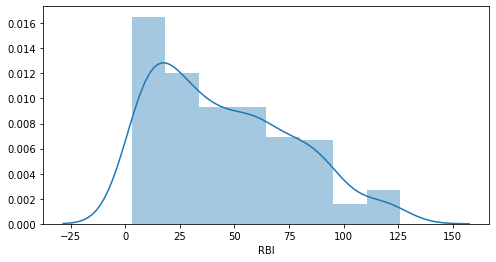

In [11]:
import seaborn as sns
plt.figure(figsize=(8,4))
# plt.xticks(range(0,60,5), rotation=60)
sns.distplot(df_total_infld['RBI'])

### 피쳐간에 상관도 분석

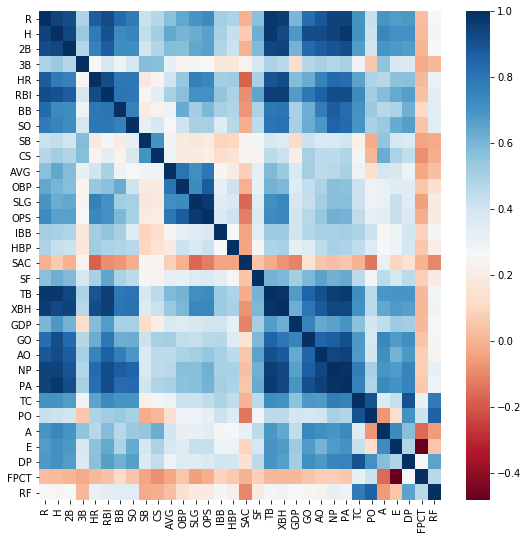

In [12]:
# 이상치 찾아내는 방법
# DataFrame의 corr()를 이용해 피처별로 상관도 구하고 heatmap 시각화
import seaborn as sns

plt.figure(figsize=(9,9))
corr = df_total_infld.corr()
sns.heatmap(corr, cmap="RdBu")

In [ ]:
- cmap-"RdBu" 
- 양의 상관관계가 높을 수록 - 진한 파란색
- 음의 상관관계가 높을 수록 - 진한 빨간색

# 데이터 레이블 및 데이터 세트 분리

In [13]:
# label 데이터 레이블 인코딩
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df_total_infld['Pos'])
df_total_infld['Pos'] = encoder.transform(df_total_infld['Pos'])
#labels = labels.reshape(-1, 1)
print(df_total_infld[:5])

    Pos    R    H  2B  3B  HR  RBI  BB   SO  SB  ...   AO    NP   PA   TC  \
22    2   61  115  23   1  17   62  27   49   2  ...   82  1397  370  401   
23    3   81  167  32   0  18   56  15  109  17  ...   93  1765  518  532   
24    1   54  109  20   1   4   28  36   29   2  ...  105  1486  366  227   
37    3   27   71  13   1   4   23  10   49   0  ...   54   903  228  199   
40    1  109  197  33   2  26  102  46   90   5  ...  136  2463  655  620   

     PO    A   E  DP   FPCT    RF  
22  308   91   2  35  0.995  4.29  
23  182  324  26  75  0.951  4.11  
24  101  121   5  31  0.978  2.22  
37   84  113   2  27  0.990  3.46  
40  351  261   8  63  0.987  3.64  

[5 rows x 33 columns]


In [135]:
# 데이터 세트 분리 (피처 데이터 and 라벨 데이터)

y_infield_df = df_total_infld['Pos']
x_infield_df = df_total_infld.drop('Pos', axis=1)
df_total_infld.to_excel("./backup/knn_dataset.xlsx")

In [130]:
# train_test_split()를 통해 train과 test 데이터 분리
# from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_infield_df, y_infield_df, test_size=0.2, random_state=11)

# ML 모델로 학습하기
- Machine Learning 모델 생성

In [131]:
def ml_models(*data):
    # 개별 ML 모델 생성
    knn_clf = KNeighborsClassifier(n_neighbors=4)
    rf_clf = RandomForestClassifier(n_estimators=100)
    dt_clf = DecisionTreeClassifier()
    ada_clf = AdaBoostClassifier(n_estimators=100)
    gb_clf = GradientBoostingClassifier(random_state=0)
    xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.03, max_depth=3)
    lgbm_clf = LGBMClassifier(n_estimators=100)

    # 스태킹으로 만들어진 데이터 세트 예측
    lr_final = LogisticRegression(C=10)
    
    # 개별 ML 모델 학습 : fit
    knn_clf.fit(data[0], data[1])
    rf_clf.fit(data[0], data[1])
    dt_clf.fit(data[0], data[1])
    ada_clf.fit(data[0], data[1])
    gb_clf.fit(data[0], data[1])
    xgb_clf.fit(data[0], data[1])
    lgbm_clf.fit(data[0], data[1])
    
    # 학습된 개별 모델들 예측 데이터 생성 후 test 데이터로 정확도 측정
    knn_pred = knn_clf.predict(data[2])
    rf_pred = rf_clf.predict(data[2])
    dt_pred = dt_clf.predict(data[2])
    ada_pred = ada_clf.predict(data[2])
    gb_pred = gb_clf.predict(data[2])
    xgb_pred = xgb_clf.predict(data[2])
    lgbm_pred = lgbm_clf.predict(data[2])
    
    print('KNN 정확도: {0:.4f}'.format(accuracy_score(data[3], knn_pred)))
    print('RF 정확도: {0:.4f}'.format(accuracy_score(data[3], rf_pred)))
    print('DT 정확도: {0:.4f}'.format(accuracy_score(data[3], dt_pred)))
    print('ADA 정확도: {0:.4f}'.format(accuracy_score(data[3], ada_pred)))
    print('GB 정확도: {0:.4f}'.format(accuracy_score(data[3], gb_pred)))
    print('XGB 정확도: {0:.4f}'.format(accuracy_score(data[3], xgb_pred)))
    print('LGBM 정확도: {0:.4f}'.format(accuracy_score(data[3], lgbm_pred)))
    
    return knn_pred, rf_pred, dt_pred, ada_pred, gb_pred, xgb_pred, lgbm_pred, lr_final, knn_clf, rf_clf, dt_clf, ada_clf, gb_clf, xgb_clf, lgbm_clf

In [132]:
def stacking():
    pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred, gb_pred, xgb_pred, lgbm_pred])
    print(pred.shape)

    pred = np.transpose(pred)
    print(pred.shape)

    lr_final.fit(pred, y_test)
    final = lr_final.predict(pred)

    print('최종 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

## (1)기본 ml 모델로 학습 후 예측

In [54]:
data = [x_train, y_train, x_test, y_test]

model = ml_models(*data)

KNN 정확도: 0.6122
RF 정확도: 0.6531
DT 정확도: 0.6327
ADA 정확도: 0.5102
GB 정확도: 0.6735
XGB 정확도: 0.7755
LGBM 정확도: 0.6735


(array([3, 3, 0, 0, 0, 2, 2, 3, 2, 1, 2, 2, 3, 1, 0, 1, 0, 2, 1, 3, 3, 0,
        1, 1, 1, 1, 3, 1, 2, 1, 3, 1, 1, 3, 1, 1, 3, 1, 0, 3, 1, 2, 0, 0,
        1, 0, 3, 3, 0]),
 array([3, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 3, 2, 0, 1, 0, 2, 1, 2, 1, 2,
        1, 2, 1, 3, 3, 2, 2, 2, 2, 1, 2, 3, 1, 1, 3, 1, 2, 2, 3, 2, 0, 0,
        2, 2, 2, 3, 0]),
 array([3, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 3, 3, 1, 0, 1, 0, 2, 2, 1, 1, 0,
        3, 2, 3, 3, 3, 3, 1, 2, 1, 1, 2, 1, 1, 1, 3, 3, 0, 3, 1, 2, 0, 0,
        1, 2, 1, 3, 0]),
 array([3, 1, 0, 0, 0, 2, 1, 3, 1, 2, 2, 1, 3, 3, 0, 1, 0, 1, 2, 2, 1, 1,
        1, 1, 3, 3, 3, 3, 1, 2, 1, 3, 1, 3, 3, 1, 1, 1, 0, 2, 1, 2, 0, 0,
        3, 0, 2, 3, 0]),
 array([3, 1, 0, 0, 0, 2, 1, 1, 2, 2, 2, 1, 3, 3, 0, 1, 0, 2, 1, 2, 1, 1,
        1, 2, 3, 3, 3, 3, 1, 2, 3, 1, 2, 1, 2, 1, 3, 1, 1, 2, 1, 1, 0, 0,
        1, 0, 1, 3, 0]),
 array([3, 1, 0, 0, 0, 2, 1, 1, 2, 2, 2, 1, 3, 1, 0, 1, 0, 2, 3, 3, 1, 2,
        1, 2, 1, 3, 3, 2, 1, 2, 3, 3, 2, 1, 1, 1, 3, 1, 0, 2,

## 스태킹 모델로 예측

In [64]:
knn_pred, rf_pred, dt_pred, ada_pred, gb_pred, xgb_pred, lgbm_pred = model[0], model[1], model[2], model[3], model[4], model[5], model[6]
lr_final = model[7]

In [65]:
stacking()

(7, 49)
(49, 7)
최종 모델의 예측 정확도: 0.7143


## (2)Scaling 후 기본 ml 모델로 학습 후 예측
- minmaxscaler 사용

In [66]:
scaler = MinMaxScaler()
scaler.fit(x_test)
scaler.fit(x_train)
x_test = scaler.transform(x_test)
x_train = scaler.transform(x_train)
print(x_test.shape, x_train.shape)

(49, 32) (195, 32)


In [69]:
data = [x_train, y_train, x_test, y_test]

model = ml_models(*data)

KNN 정확도: 0.5510
RF 정확도: 0.6735
DT 정확도: 0.6122
ADA 정확도: 0.5102
GB 정확도: 0.6531
XGB 정확도: 0.7755
LGBM 정확도: 0.6939


## 스태킹 모델로 예측

In [70]:
knn_pred, rf_pred, dt_pred, ada_pred, gb_pred, xgb_pred, lgbm_pred = model[0], model[1], model[2], model[3], model[4], model[5], model[6]
lr_final = model[7]

In [71]:
stacking()

(7, 49)
(49, 7)
최종 모델의 예측 정확도: 0.7551


- var, avg로 정규화

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x_infield_df, y_infield_df, test_size=0.2, random_state=11)

mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

mean = x_test.mean(axis=0)
x_test -= mean
std = x_test.std(axis=0)
x_test /= std

In [73]:
data = [x_train, y_train, x_test, y_test]

model = ml_models(*data)

KNN 정확도: 0.5102
RF 정확도: 0.5714
DT 정확도: 0.5918
ADA 정확도: 0.4286
GB 정확도: 0.5918
XGB 정확도: 0.6327
LGBM 정확도: 0.5918


## 스태킹 모델로 예측

In [74]:
knn_pred, rf_pred, dt_pred, ada_pred, gb_pred, xgb_pred, lgbm_pred = model[0], model[1], model[2], model[3], model[4], model[5], model[6]
lr_final = model[7]

In [75]:
stacking()

(7, 49)
(49, 7)
최종 모델의 예측 정확도: 0.6939


C:\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 교차검증 해보자

In [76]:
def cross_val(model):
    scores = cross_val_score(model, x_infield_df, y_infield_df, cv=4)
    for iter, accuracy in enumerate(scores):
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter, accuracy))

    print('교차 검증 평균 정확도 : {0:.4f}'.format(np.mean(scores)))

In [87]:
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)
gb_clf = GradientBoostingClassifier(random_state=0)
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.03, max_depth=3)
lgbm_clf = LGBMClassifier(n_estimators=100)

In [88]:
cross_val(knn_clf)

교차 검증 0 정확도: 0.5574
교차 검증 1 정확도: 0.5246
교차 검증 2 정확도: 0.5246
교차 검증 3 정확도: 0.3770
교차 검증 평균 정확도 : 0.4959


In [90]:
cross_val(rf_clf)

교차 검증 0 정확도: 0.6066
교차 검증 1 정확도: 0.6721
교차 검증 2 정확도: 0.5574
교차 검증 3 정확도: 0.5410
교차 검증 평균 정확도 : 0.5943


In [91]:
cross_val(dt_clf)

교차 검증 0 정확도: 0.5574
교차 검증 1 정확도: 0.6066
교차 검증 2 정확도: 0.5410
교차 검증 3 정확도: 0.4918
교차 검증 평균 정확도 : 0.5492


In [92]:
cross_val(ada_clf)

교차 검증 0 정확도: 0.4918
교차 검증 1 정확도: 0.5902
교차 검증 2 정확도: 0.4918
교차 검증 3 정확도: 0.3770
교차 검증 평균 정확도 : 0.4877


In [93]:
cross_val(gb_clf)

교차 검증 0 정확도: 0.5738
교차 검증 1 정확도: 0.6557
교차 검증 2 정확도: 0.5246
교차 검증 3 정확도: 0.5082
교차 검증 평균 정확도 : 0.5656


In [94]:
cross_val(xgb_clf)

교차 검증 0 정확도: 0.7049
교차 검증 1 정확도: 0.6885
교차 검증 2 정확도: 0.5738
교차 검증 3 정확도: 0.5246
교차 검증 평균 정확도 : 0.6230


In [95]:
cross_val(lgbm_clf)

교차 검증 0 정확도: 0.6230
교차 검증 1 정확도: 0.6393
교차 검증 2 정확도: 0.6393
교차 검증 3 정확도: 0.4590
교차 검증 평균 정확도 : 0.5902


## GridSearchCV를 통해 최고의 파라미터를 찾아보자
- xgb모델

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x_infield_df, y_infield_df, test_size=0.2, random_state=11)
# from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [4, 6, 8, 10, 12],
    'min_samples_split': [2,4,6,8,10,12]
}

grid_cv = GridSearchCV(xgb_clf, param_grid=params, scoring='accuracy', cv=3, verbose=1)
grid_cv.fit(x_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

xgb_clf()

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   35.8s finished


GridSearchCV 최고 평균 정확도 수치:0.5795
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 2}


# 딥러닝 모델로 학습하기

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x_infield_df, y_infield_df, test_size=0.2, random_state=11)

In [100]:
import keras
from keras import models
from keras import layers

In [111]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(4, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    
    return model

def build_model_deep():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(layers.Dense(4, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    return model

def build_model_deep2():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(layers.Dense(256, activation='relu', kernel_initializer='he_normal'))
    model.add(layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
    model.add(layers.Dense(4, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    
    return model

def build_model_deep3():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(layers.Dense(256, activation='relu', kernel_initializer='he_normal'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    
    return model

In [101]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

mean = x_test.mean(axis=0)
x_test -= mean
std = x_test.std(axis=0)
x_test /= std

In [102]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Single hidden layer

In [110]:
optimizers = ["Adam", "RMSProp","SGD"]
acc = []
batch_size = 16
for optimizer in optimizers:
    model = build_model()
    model.fit(x_train, y_train, batch_size=batch_size, epochs=1000, shuffle=True)
    score = model.evaluate(x_test, y_test, verbose=0)
    # print('1-hidden layer 예측 정확도:{0:.4f}'.format(score[1]))
    acc.append(score[1])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 260       
Total params: 2,372
Trainable params: 2,372
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
195/195 [==============================] - 0s 959us/step - loss: 1.4725 - accuracy: 0.2462
Epoch 2/1000
195/195 [==============================] - 0s 323us/step - loss: 1.2353 - accuracy: 0.4308
Epoch 3/1000
195/195 [==============================] - 0s 359us/step - loss: 1.1083 - accuracy: 0.5128
Epoch 4/1000
195/195 [==============================] - 0s 421us/step - loss: 1.0336 - accuracy: 0.5641
Epoch 5/1000
195/195 [==============================] - 0s 215us/step - loss: 0.9739 - accuracy: 0

195/195 [==============================] - 0s 169us/step - loss: 0.2876 - accuracy: 0.9282
Epoch 74/1000
195/195 [==============================] - 0s 174us/step - loss: 0.2747 - accuracy: 0.9385
Epoch 75/1000
195/195 [==============================] - 0s 169us/step - loss: 0.2684 - accuracy: 0.9385
Epoch 76/1000
195/195 [==============================] - 0s 179us/step - loss: 0.2789 - accuracy: 0.9231
Epoch 77/1000
195/195 [==============================] - 0s 164us/step - loss: 0.2664 - accuracy: 0.9282
Epoch 78/1000
195/195 [==============================] - 0s 164us/step - loss: 0.2567 - accuracy: 0.9385
Epoch 79/1000
195/195 [==============================] - 0s 164us/step - loss: 0.2562 - accuracy: 0.9487
Epoch 80/1000
195/195 [==============================] - 0s 164us/step - loss: 0.2548 - accuracy: 0.9385
Epoch 81/1000
195/195 [==============================] - 0s 164us/step - loss: 0.2478 - accuracy: 0.9385
Epoch 82/1000
195/195 [==============================] - 0s 164us/ste

195/195 [==============================] - 0s 200us/step - loss: 0.1043 - accuracy: 0.9897
Epoch 151/1000
195/195 [==============================] - 0s 205us/step - loss: 0.1001 - accuracy: 0.9949
Epoch 152/1000
195/195 [==============================] - 0s 215us/step - loss: 0.0987 - accuracy: 0.9846
Epoch 153/1000
195/195 [==============================] - 0s 195us/step - loss: 0.1001 - accuracy: 0.9795
Epoch 154/1000
195/195 [==============================] - 0s 200us/step - loss: 0.1156 - accuracy: 0.9692
Epoch 155/1000
195/195 [==============================] - 0s 190us/step - loss: 0.0935 - accuracy: 0.9846
Epoch 156/1000
195/195 [==============================] - 0s 190us/step - loss: 0.0927 - accuracy: 0.9795
Epoch 157/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0918 - accuracy: 0.9897
Epoch 158/1000
195/195 [==============================] - 0s 174us/step - loss: 0.0879 - accuracy: 0.9949
Epoch 159/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 200us/step - loss: 0.0376 - accuracy: 1.0000
Epoch 228/1000
195/195 [==============================] - 0s 210us/step - loss: 0.0350 - accuracy: 1.0000
Epoch 229/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0346 - accuracy: 0.9949
Epoch 230/1000
195/195 [==============================] - 0s 200us/step - loss: 0.0360 - accuracy: 1.0000
Epoch 231/1000
195/195 [==============================] - 0s 185us/step - loss: 0.0355 - accuracy: 1.0000
Epoch 232/1000
195/195 [==============================] - 0s 179us/step - loss: 0.0317 - accuracy: 1.0000
Epoch 233/1000
195/195 [==============================] - 0s 185us/step - loss: 0.0322 - accuracy: 1.0000
Epoch 234/1000
195/195 [==============================] - 0s 231us/step - loss: 0.0310 - accuracy: 1.0000
Epoch 235/1000
195/195 [==============================] - 0s 251us/step - loss: 0.0313 - accuracy: 1.0000
Epoch 236/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 215us/step - loss: 0.0113 - accuracy: 1.0000
Epoch 305/1000
195/195 [==============================] - 0s 272us/step - loss: 0.0123 - accuracy: 1.0000
Epoch 306/1000
195/195 [==============================] - 0s 236us/step - loss: 0.0119 - accuracy: 1.0000
Epoch 307/1000
195/195 [==============================] - 0s 251us/step - loss: 0.0111 - accuracy: 1.0000
Epoch 308/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0123 - accuracy: 1.0000
Epoch 309/1000
195/195 [==============================] - 0s 215us/step - loss: 0.0109 - accuracy: 1.0000
Epoch 310/1000
195/195 [==============================] - 0s 226us/step - loss: 0.0101 - accuracy: 1.0000
Epoch 311/1000
195/195 [==============================] - 0s 256us/step - loss: 0.0104 - accuracy: 1.0000
Epoch 312/1000
195/195 [==============================] - 0s 221us/step - loss: 0.0099 - accuracy: 1.0000
Epoch 313/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 246us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 382/1000
195/195 [==============================] - 0s 251us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 383/1000
195/195 [==============================] - 0s 226us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 384/1000
195/195 [==============================] - 0s 226us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 385/1000
195/195 [==============================] - 0s 262us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 386/1000
195/195 [==============================] - 0s 313us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 387/1000
195/195 [==============================] - 0s 241us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 388/1000
195/195 [==============================] - 0s 236us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 389/1000
195/195 [==============================] - 0s 231us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 390/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 215us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 459/1000
195/195 [==============================] - 0s 215us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 460/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 461/1000
195/195 [==============================] - 0s 236us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 462/1000
195/195 [==============================] - 0s 246us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 463/1000
195/195 [==============================] - 0s 251us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 464/1000
195/195 [==============================] - 0s 236us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 465/1000
195/195 [==============================] - 0s 190us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 466/1000
195/195 [==============================] - 0s 262us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 467/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 210us/step - loss: 4.8945e-04 - accuracy: 1.0000
Epoch 534/1000
195/195 [==============================] - 0s 231us/step - loss: 4.9426e-04 - accuracy: 1.0000
Epoch 535/1000
195/195 [==============================] - 0s 221us/step - loss: 4.8534e-04 - accuracy: 1.0000
Epoch 536/1000
195/195 [==============================] - 0s 226us/step - loss: 4.7833e-04 - accuracy: 1.0000
Epoch 537/1000
195/195 [==============================] - 0s 236us/step - loss: 4.8700e-04 - accuracy: 1.0000
Epoch 538/1000
195/195 [==============================] - 0s 221us/step - loss: 4.8846e-04 - accuracy: 1.0000
Epoch 539/1000
195/195 [==============================] - 0s 200us/step - loss: 4.6356e-04 - accuracy: 1.0000
Epoch 540/1000
195/195 [==============================] - 0s 226us/step - loss: 5.2213e-04 - accuracy: 1.0000
Epoch 541/1000
195/195 [==============================] - 0s 251us/step - loss: 4.7528e-04 - accuracy: 1.0000
Epoch 542/1000
195/195 [=

195/195 [==============================] - 0s 205us/step - loss: 1.8792e-04 - accuracy: 1.0000
Epoch 608/1000
195/195 [==============================] - 0s 221us/step - loss: 2.2586e-04 - accuracy: 1.0000
Epoch 609/1000
195/195 [==============================] - 0s 210us/step - loss: 2.1964e-04 - accuracy: 1.0000
Epoch 610/1000
195/195 [==============================] - 0s 195us/step - loss: 2.0456e-04 - accuracy: 1.0000
Epoch 611/1000
195/195 [==============================] - 0s 221us/step - loss: 1.9030e-04 - accuracy: 1.0000
Epoch 612/1000
195/195 [==============================] - 0s 200us/step - loss: 1.7125e-04 - accuracy: 1.0000
Epoch 613/1000
195/195 [==============================] - 0s 267us/step - loss: 1.7048e-04 - accuracy: 1.0000
Epoch 614/1000
195/195 [==============================] - 0s 313us/step - loss: 1.6731e-04 - accuracy: 1.0000
Epoch 615/1000
195/195 [==============================] - 0s 190us/step - loss: 1.6929e-04 - accuracy: 1.0000
Epoch 616/1000
195/195 [=

195/195 [==============================] - 0s 262us/step - loss: 7.3815e-05 - accuracy: 1.0000
Epoch 682/1000
195/195 [==============================] - 0s 236us/step - loss: 7.3130e-05 - accuracy: 1.0000
Epoch 683/1000
195/195 [==============================] - 0s 221us/step - loss: 8.3432e-05 - accuracy: 1.0000
Epoch 684/1000
195/195 [==============================] - 0s 231us/step - loss: 7.0897e-05 - accuracy: 1.0000
Epoch 685/1000
195/195 [==============================] - 0s 231us/step - loss: 7.0691e-05 - accuracy: 1.0000
Epoch 686/1000
195/195 [==============================] - 0s 231us/step - loss: 6.4688e-05 - accuracy: 1.0000
Epoch 687/1000
195/195 [==============================] - 0s 246us/step - loss: 6.4269e-05 - accuracy: 1.0000
Epoch 688/1000
195/195 [==============================] - 0s 256us/step - loss: 6.6606e-05 - accuracy: 1.0000
Epoch 689/1000
195/195 [==============================] - 0s 246us/step - loss: 6.7180e-05 - accuracy: 1.0000
Epoch 690/1000
195/195 [=

195/195 [==============================] - 0s 210us/step - loss: 2.8427e-05 - accuracy: 1.0000
Epoch 756/1000
195/195 [==============================] - 0s 190us/step - loss: 2.8187e-05 - accuracy: 1.0000
Epoch 757/1000
195/195 [==============================] - 0s 226us/step - loss: 2.7596e-05 - accuracy: 1.0000
Epoch 758/1000
195/195 [==============================] - ETA: 0s - loss: 2.4349e-05 - accuracy: 1.00 - 0s 241us/step - loss: 2.6558e-05 - accuracy: 1.0000
Epoch 759/1000
195/195 [==============================] - 0s 256us/step - loss: 2.6195e-05 - accuracy: 1.0000
Epoch 760/1000
195/195 [==============================] - 0s 236us/step - loss: 2.7578e-05 - accuracy: 1.0000
Epoch 761/1000
195/195 [==============================] - 0s 226us/step - loss: 2.7548e-05 - accuracy: 1.0000
Epoch 762/1000
195/195 [==============================] - 0s 226us/step - loss: 2.8425e-05 - accuracy: 1.0000
Epoch 763/1000
195/195 [==============================] - 0s 210us/step - loss: 3.0041e-0

195/195 [==============================] - 0s 210us/step - loss: 1.1257e-05 - accuracy: 1.0000
Epoch 829/1000
195/195 [==============================] - 0s 190us/step - loss: 1.0789e-05 - accuracy: 1.0000
Epoch 830/1000
195/195 [==============================] - 0s 205us/step - loss: 1.0297e-05 - accuracy: 1.0000
Epoch 831/1000
195/195 [==============================] - 0s 195us/step - loss: 1.0067e-05 - accuracy: 1.0000
Epoch 832/1000
195/195 [==============================] - 0s 195us/step - loss: 1.0137e-05 - accuracy: 1.0000
Epoch 833/1000
195/195 [==============================] - 0s 210us/step - loss: 9.6195e-06 - accuracy: 1.0000
Epoch 834/1000
195/195 [==============================] - 0s 210us/step - loss: 9.5911e-06 - accuracy: 1.0000
Epoch 835/1000
195/195 [==============================] - 0s 205us/step - loss: 1.0826e-05 - accuracy: 1.0000
Epoch 836/1000
195/195 [==============================] - 0s 210us/step - loss: 9.8922e-06 - accuracy: 1.0000
Epoch 837/1000
195/195 [=

195/195 [==============================] - 0s 190us/step - loss: 4.2283e-06 - accuracy: 1.0000
Epoch 903/1000
195/195 [==============================] - 0s 190us/step - loss: 4.1262e-06 - accuracy: 1.0000
Epoch 904/1000
195/195 [==============================] - 0s 226us/step - loss: 4.2574e-06 - accuracy: 1.0000
Epoch 905/1000
195/195 [==============================] - 0s 221us/step - loss: 4.1739e-06 - accuracy: 1.0000
Epoch 906/1000
195/195 [==============================] - 0s 200us/step - loss: 4.1415e-06 - accuracy: 1.0000
Epoch 907/1000
195/195 [==============================] - 0s 190us/step - loss: 4.3359e-06 - accuracy: 1.0000
Epoch 908/1000
195/195 [==============================] - 0s 195us/step - loss: 4.3680e-06 - accuracy: 1.0000
Epoch 909/1000
195/195 [==============================] - 0s 174us/step - loss: 4.2170e-06 - accuracy: 1.0000
Epoch 910/1000
195/195 [==============================] - 0s 180us/step - loss: 3.8395e-06 - accuracy: 1.0000
Epoch 911/1000
195/195 [=

195/195 [==============================] - 0s 174us/step - loss: 1.7191e-06 - accuracy: 1.0000
Epoch 977/1000
195/195 [==============================] - 0s 195us/step - loss: 1.6469e-06 - accuracy: 1.0000
Epoch 978/1000
195/195 [==============================] - 0s 236us/step - loss: 1.6564e-06 - accuracy: 1.0000
Epoch 979/1000
195/195 [==============================] - 0s 190us/step - loss: 1.6173e-06 - accuracy: 1.0000
Epoch 980/1000
195/195 [==============================] - 0s 174us/step - loss: 1.6038e-06 - accuracy: 1.0000
Epoch 981/1000
195/195 [==============================] - 0s 159us/step - loss: 1.6176e-06 - accuracy: 1.0000
Epoch 982/1000
195/195 [==============================] - 0s 159us/step - loss: 1.5873e-06 - accuracy: 1.0000
Epoch 983/1000
195/195 [==============================] - 0s 179us/step - loss: 1.5033e-06 - accuracy: 1.0000
Epoch 984/1000
195/195 [==============================] - 0s 174us/step - loss: 1.5173e-06 - accuracy: 1.0000
Epoch 985/1000
195/195 [=

195/195 [==============================] - 0s 149us/step - loss: 0.3852 - accuracy: 0.8872
Epoch 47/1000
195/195 [==============================] - 0s 154us/step - loss: 0.3825 - accuracy: 0.8821
Epoch 48/1000
195/195 [==============================] - 0s 144us/step - loss: 0.3705 - accuracy: 0.9128
Epoch 49/1000
195/195 [==============================] - 0s 144us/step - loss: 0.3708 - accuracy: 0.8923
Epoch 50/1000
195/195 [==============================] - 0s 149us/step - loss: 0.3547 - accuracy: 0.9128
Epoch 51/1000
195/195 [==============================] - 0s 154us/step - loss: 0.3595 - accuracy: 0.9128
Epoch 52/1000
195/195 [==============================] - 0s 154us/step - loss: 0.3505 - accuracy: 0.9282
Epoch 53/1000
195/195 [==============================] - 0s 154us/step - loss: 0.3438 - accuracy: 0.9179
Epoch 54/1000
195/195 [==============================] - 0s 169us/step - loss: 0.3345 - accuracy: 0.9179
Epoch 55/1000
195/195 [==============================] - 0s 154us/ste

195/195 [==============================] - 0s 169us/step - loss: 0.1182 - accuracy: 0.9692
Epoch 124/1000
195/195 [==============================] - 0s 164us/step - loss: 0.1161 - accuracy: 0.9744
Epoch 125/1000
195/195 [==============================] - 0s 164us/step - loss: 0.1082 - accuracy: 0.9744
Epoch 126/1000
195/195 [==============================] - 0s 159us/step - loss: 0.1136 - accuracy: 0.9692
Epoch 127/1000
195/195 [==============================] - 0s 179us/step - loss: 0.1084 - accuracy: 0.9692
Epoch 128/1000
195/195 [==============================] - 0s 159us/step - loss: 0.1104 - accuracy: 0.9846
Epoch 129/1000
195/195 [==============================] - 0s 169us/step - loss: 0.1072 - accuracy: 0.9795
Epoch 130/1000
195/195 [==============================] - 0s 154us/step - loss: 0.1097 - accuracy: 0.9795
Epoch 131/1000
195/195 [==============================] - 0s 159us/step - loss: 0.1014 - accuracy: 0.9846
Epoch 132/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 195us/step - loss: 0.0365 - accuracy: 1.0000
Epoch 201/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0337 - accuracy: 1.0000
Epoch 202/1000
195/195 [==============================] - 0s 200us/step - loss: 0.0315 - accuracy: 1.0000
Epoch 203/1000
195/195 [==============================] - 0s 190us/step - loss: 0.0346 - accuracy: 0.9949
Epoch 204/1000
195/195 [==============================] - 0s 169us/step - loss: 0.0296 - accuracy: 1.0000
Epoch 205/1000
195/195 [==============================] - 0s 169us/step - loss: 0.0330 - accuracy: 0.9949
Epoch 206/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0309 - accuracy: 1.0000
Epoch 207/1000
195/195 [==============================] - 0s 185us/step - loss: 0.0306 - accuracy: 1.0000
Epoch 208/1000
195/195 [==============================] - 0s 169us/step - loss: 0.0303 - accuracy: 1.0000
Epoch 209/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 205us/step - loss: 0.0067 - accuracy: 1.0000
Epoch 278/1000
195/195 [==============================] - 0s 210us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 279/1000
195/195 [==============================] - 0s 256us/step - loss: 0.0073 - accuracy: 1.0000
Epoch 280/1000
195/195 [==============================] - 0s 221us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 281/1000
195/195 [==============================] - 0s 200us/step - loss: 0.0076 - accuracy: 1.0000
Epoch 282/1000
195/195 [==============================] - 0s 200us/step - loss: 0.0073 - accuracy: 1.0000
Epoch 283/1000
195/195 [==============================] - 0s 185us/step - loss: 0.0060 - accuracy: 1.0000
Epoch 284/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 285/1000
195/195 [==============================] - 0s 174us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 286/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 159us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 355/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 356/1000
195/195 [==============================] - 0s 174us/step - loss: 9.3049e-04 - accuracy: 1.0000
Epoch 357/1000
195/195 [==============================] - 0s 180us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 358/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 359/1000
195/195 [==============================] - 0s 179us/step - loss: 9.2998e-04 - accuracy: 1.0000
Epoch 360/1000
195/195 [==============================] - 0s 185us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 361/1000
195/195 [==============================] - 0s 179us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 362/1000
195/195 [==============================] - 0s 200us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 363/1000
195/195 [=============================

195/195 [==============================] - 0s 205us/step - loss: 1.5260e-04 - accuracy: 1.0000
Epoch 429/1000
195/195 [==============================] - 0s 226us/step - loss: 1.7866e-04 - accuracy: 1.0000
Epoch 430/1000
195/195 [==============================] - 0s 210us/step - loss: 1.5144e-04 - accuracy: 1.0000
Epoch 431/1000
195/195 [==============================] - ETA: 0s - loss: 2.2005e-04 - accuracy: 1.00 - 0s 185us/step - loss: 1.4877e-04 - accuracy: 1.0000
Epoch 432/1000
195/195 [==============================] - 0s 200us/step - loss: 1.2341e-04 - accuracy: 1.0000
Epoch 433/1000
195/195 [==============================] - 0s 215us/step - loss: 2.5105e-04 - accuracy: 1.0000
Epoch 434/1000
195/195 [==============================] - 0s 185us/step - loss: 1.2216e-04 - accuracy: 1.0000
Epoch 435/1000
195/195 [==============================] - 0s 195us/step - loss: 1.3604e-04 - accuracy: 1.0000
Epoch 436/1000
195/195 [==============================] - 0s 185us/step - loss: 1.3041e-0

195/195 [==============================] - 0s 179us/step - loss: 2.6021e-05 - accuracy: 1.0000
Epoch 502/1000
195/195 [==============================] - 0s 195us/step - loss: 1.6139e-05 - accuracy: 1.0000
Epoch 503/1000
195/195 [==============================] - 0s 190us/step - loss: 1.8457e-05 - accuracy: 1.0000
Epoch 504/1000
195/195 [==============================] - 0s 179us/step - loss: 2.9914e-05 - accuracy: 1.0000
Epoch 505/1000
195/195 [==============================] - 0s 169us/step - loss: 1.5910e-05 - accuracy: 1.0000
Epoch 506/1000
195/195 [==============================] - 0s 185us/step - loss: 1.4358e-05 - accuracy: 1.0000
Epoch 507/1000
195/195 [==============================] - 0s 179us/step - loss: 1.3827e-05 - accuracy: 1.0000
Epoch 508/1000
195/195 [==============================] - 0s 180us/step - loss: 1.7463e-05 - accuracy: 1.0000
Epoch 509/1000
195/195 [==============================] - 0s 185us/step - loss: 1.5703e-05 - accuracy: 1.0000
Epoch 510/1000
195/195 [=

195/195 [==============================] - 0s 179us/step - loss: 3.2703e-06 - accuracy: 1.0000
Epoch 576/1000
195/195 [==============================] - 0s 179us/step - loss: 1.7558e-06 - accuracy: 1.0000
Epoch 577/1000
195/195 [==============================] - 0s 169us/step - loss: 1.8252e-06 - accuracy: 1.0000
Epoch 578/1000
195/195 [==============================] - 0s 190us/step - loss: 2.1287e-06 - accuracy: 1.0000
Epoch 579/1000
195/195 [==============================] - 0s 159us/step - loss: 1.6836e-06 - accuracy: 1.0000
Epoch 580/1000
195/195 [==============================] - 0s 164us/step - loss: 1.4700e-06 - accuracy: 1.0000
Epoch 581/1000
195/195 [==============================] - 0s 185us/step - loss: 2.3185e-06 - accuracy: 1.0000
Epoch 582/1000
195/195 [==============================] - 0s 185us/step - loss: 2.2220e-06 - accuracy: 1.0000
Epoch 583/1000
195/195 [==============================] - 0s 179us/step - loss: 1.4223e-06 - accuracy: 1.0000
Epoch 584/1000
195/195 [=

195/195 [==============================] - 0s 174us/step - loss: 2.4484e-07 - accuracy: 1.0000
Epoch 650/1000
195/195 [==============================] - 0s 251us/step - loss: 6.6483e-07 - accuracy: 1.0000
Epoch 651/1000
195/195 [==============================] - 0s 190us/step - loss: 2.8916e-07 - accuracy: 1.0000
Epoch 652/1000
195/195 [==============================] - 0s 164us/step - loss: 2.5492e-07 - accuracy: 1.0000
Epoch 653/1000
195/195 [==============================] - 0s 164us/step - loss: 2.8152e-07 - accuracy: 1.0000
Epoch 654/1000
195/195 [==============================] - 0s 174us/step - loss: 2.5401e-07 - accuracy: 1.0000
Epoch 655/1000
195/195 [==============================] - 0s 159us/step - loss: 2.6685e-07 - accuracy: 1.0000
Epoch 656/1000
195/195 [==============================] - 0s 174us/step - loss: 2.5156e-07 - accuracy: 1.0000
Epoch 657/1000
195/195 [==============================] - 0s 169us/step - loss: 2.5156e-07 - accuracy: 1.0000
Epoch 658/1000
195/195 [=

195/195 [==============================] - 0s 190us/step - loss: 1.3266e-07 - accuracy: 1.0000
Epoch 724/1000
195/195 [==============================] - 0s 195us/step - loss: 1.3633e-07 - accuracy: 1.0000
Epoch 725/1000
195/195 [==============================] - 0s 210us/step - loss: 1.3235e-07 - accuracy: 1.0000
Epoch 726/1000
195/195 [==============================] - 0s 190us/step - loss: 1.3205e-07 - accuracy: 1.0000
Epoch 727/1000
195/195 [==============================] - 0s 205us/step - loss: 1.3205e-07 - accuracy: 1.0000
Epoch 728/1000
195/195 [==============================] - 0s 246us/step - loss: 1.2716e-07 - accuracy: 1.0000
Epoch 729/1000
195/195 [==============================] - 0s 195us/step - loss: 1.2777e-07 - accuracy: 1.0000
Epoch 730/1000
195/195 [==============================] - 0s 169us/step - loss: 1.3327e-07 - accuracy: 1.0000
Epoch 731/1000
195/195 [==============================] - 0s 159us/step - loss: 1.2991e-07 - accuracy: 1.0000
Epoch 732/1000
195/195 [=

195/195 [==============================] - 0s 313us/step - loss: 1.1982e-07 - accuracy: 1.0000
Epoch 797/1000
195/195 [==============================] - 0s 262us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 798/1000
195/195 [==============================] - 0s 215us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 799/1000
195/195 [==============================] - 0s 231us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 800/1000
195/195 [==============================] - 0s 205us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 801/1000
195/195 [==============================] - 0s 226us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 802/1000
195/195 [==============================] - 0s 241us/step - loss: 1.1951e-07 - accuracy: 1.0000
Epoch 803/1000
195/195 [==============================] - 0s 246us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 804/1000
195/195 [==============================] - 0s 241us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 805/1000
195/195 [=

195/195 [==============================] - 0s 169us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 871/1000
195/195 [==============================] - 0s 159us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 872/1000
195/195 [==============================] - 0s 159us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 873/1000
195/195 [==============================] - 0s 149us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 874/1000
195/195 [==============================] - 0s 185us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 875/1000
195/195 [==============================] - 0s 205us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 876/1000
195/195 [==============================] - 0s 200us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 877/1000
195/195 [==============================] - 0s 205us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 878/1000
195/195 [==============================] - 0s 205us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 879/1000
195/195 [=

195/195 [==============================] - 0s 185us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 945/1000
195/195 [==============================] - 0s 185us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 946/1000
195/195 [==============================] - 0s 179us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 947/1000
195/195 [==============================] - 0s 185us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 948/1000
195/195 [==============================] - 0s 169us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 949/1000
195/195 [==============================] - 0s 215us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 950/1000
195/195 [==============================] - 0s 220us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 951/1000
195/195 [==============================] - 0s 241us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 952/1000
195/195 [==============================] - 0s 251us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 953/1000
195/195 [=

195/195 [==============================] - 0s 154us/step - loss: 0.8727 - accuracy: 0.6359
Epoch 14/1000
195/195 [==============================] - 0s 154us/step - loss: 0.8574 - accuracy: 0.6410
Epoch 15/1000
195/195 [==============================] - 0s 159us/step - loss: 0.8464 - accuracy: 0.6564
Epoch 16/1000
195/195 [==============================] - 0s 169us/step - loss: 0.8322 - accuracy: 0.6769
Epoch 17/1000
195/195 [==============================] - 0s 185us/step - loss: 0.8181 - accuracy: 0.6667
Epoch 18/1000
195/195 [==============================] - 0s 215us/step - loss: 0.8078 - accuracy: 0.6769
Epoch 19/1000
195/195 [==============================] - 0s 215us/step - loss: 0.7945 - accuracy: 0.6821
Epoch 20/1000
195/195 [==============================] - 0s 195us/step - loss: 0.7859 - accuracy: 0.6769
Epoch 21/1000
195/195 [==============================] - 0s 200us/step - loss: 0.7741 - accuracy: 0.6872
Epoch 22/1000
195/195 [==============================] - 0s 195us/ste

195/195 [==============================] - 0s 195us/step - loss: 0.4524 - accuracy: 0.8615
Epoch 91/1000
195/195 [==============================] - 0s 200us/step - loss: 0.4500 - accuracy: 0.8667
Epoch 92/1000
195/195 [==============================] - 0s 179us/step - loss: 0.4483 - accuracy: 0.8564
Epoch 93/1000
195/195 [==============================] - 0s 149us/step - loss: 0.4451 - accuracy: 0.8718
Epoch 94/1000
195/195 [==============================] - 0s 149us/step - loss: 0.4419 - accuracy: 0.8615
Epoch 95/1000
195/195 [==============================] - 0s 149us/step - loss: 0.4402 - accuracy: 0.8564
Epoch 96/1000
195/195 [==============================] - 0s 144us/step - loss: 0.4406 - accuracy: 0.8718
Epoch 97/1000
195/195 [==============================] - 0s 149us/step - loss: 0.4353 - accuracy: 0.8615
Epoch 98/1000
195/195 [==============================] - 0s 154us/step - loss: 0.4324 - accuracy: 0.8667
Epoch 99/1000
195/195 [==============================] - 0s 149us/ste

195/195 [==============================] - 0s 205us/step - loss: 0.2904 - accuracy: 0.9385
Epoch 168/1000
195/195 [==============================] - 0s 215us/step - loss: 0.2888 - accuracy: 0.9282
Epoch 169/1000
195/195 [==============================] - 0s 200us/step - loss: 0.2847 - accuracy: 0.9487
Epoch 170/1000
195/195 [==============================] - 0s 210us/step - loss: 0.2887 - accuracy: 0.9231
Epoch 171/1000
195/195 [==============================] - 0s 241us/step - loss: 0.2820 - accuracy: 0.9487
Epoch 172/1000
195/195 [==============================] - 0s 215us/step - loss: 0.2806 - accuracy: 0.9385
Epoch 173/1000
195/195 [==============================] - 0s 215us/step - loss: 0.2789 - accuracy: 0.9385
Epoch 174/1000
195/195 [==============================] - 0s 308us/step - loss: 0.2822 - accuracy: 0.9282
Epoch 175/1000
195/195 [==============================] - 0s 236us/step - loss: 0.2776 - accuracy: 0.9333
Epoch 176/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 169us/step - loss: 0.1998 - accuracy: 0.9538
Epoch 245/1000
195/195 [==============================] - 0s 164us/step - loss: 0.1966 - accuracy: 0.9641
Epoch 246/1000
195/195 [==============================] - 0s 164us/step - loss: 0.1919 - accuracy: 0.9692
Epoch 247/1000
195/195 [==============================] - 0s 159us/step - loss: 0.1965 - accuracy: 0.9641
Epoch 248/1000
195/195 [==============================] - 0s 185us/step - loss: 0.1929 - accuracy: 0.9641
Epoch 249/1000
195/195 [==============================] - 0s 185us/step - loss: 0.1941 - accuracy: 0.9590
Epoch 250/1000
195/195 [==============================] - 0s 174us/step - loss: 0.1946 - accuracy: 0.9641
Epoch 251/1000
195/195 [==============================] - 0s 169us/step - loss: 0.1933 - accuracy: 0.9641
Epoch 252/1000
195/195 [==============================] - 0s 169us/step - loss: 0.1955 - accuracy: 0.9590
Epoch 253/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 169us/step - loss: 0.1443 - accuracy: 0.9795
Epoch 322/1000
195/195 [==============================] - 0s 174us/step - loss: 0.1415 - accuracy: 0.9846
Epoch 323/1000
195/195 [==============================] - 0s 185us/step - loss: 0.1417 - accuracy: 0.9897
Epoch 324/1000
195/195 [==============================] - ETA: 0s - loss: 0.2293 - accuracy: 0.87 - 0s 164us/step - loss: 0.1400 - accuracy: 0.9846
Epoch 325/1000
195/195 [==============================] - 0s 179us/step - loss: 0.1397 - accuracy: 0.9795
Epoch 326/1000
195/195 [==============================] - 0s 164us/step - loss: 0.1390 - accuracy: 0.9744
Epoch 327/1000
195/195 [==============================] - 0s 169us/step - loss: 0.1407 - accuracy: 0.9795
Epoch 328/1000
195/195 [==============================] - 0s 169us/step - loss: 0.1409 - accuracy: 0.9692
Epoch 329/1000
195/195 [==============================] - 0s 174us/step - loss: 0.1378 - accuracy: 0.9744
Epoch 330/1000
195/

195/195 [==============================] - 0s 180us/step - loss: 0.1075 - accuracy: 0.9897
Epoch 398/1000
195/195 [==============================] - 0s 190us/step - loss: 0.1073 - accuracy: 0.9897
Epoch 399/1000
195/195 [==============================] - 0s 169us/step - loss: 0.1047 - accuracy: 1.0000
Epoch 400/1000
195/195 [==============================] - 0s 179us/step - loss: 0.1064 - accuracy: 0.9897
Epoch 401/1000
195/195 [==============================] - 0s 169us/step - loss: 0.1035 - accuracy: 0.9846
Epoch 402/1000
195/195 [==============================] - 0s 179us/step - loss: 0.1052 - accuracy: 0.9949
Epoch 403/1000
195/195 [==============================] - 0s 164us/step - loss: 0.1041 - accuracy: 0.9897
Epoch 404/1000
195/195 [==============================] - 0s 169us/step - loss: 0.1037 - accuracy: 1.0000
Epoch 405/1000
195/195 [==============================] - 0s 179us/step - loss: 0.1033 - accuracy: 0.9949
Epoch 406/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 164us/step - loss: 0.0795 - accuracy: 1.0000
Epoch 474/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0806 - accuracy: 1.0000
Epoch 475/1000
195/195 [==============================] - 0s 154us/step - loss: 0.0781 - accuracy: 1.0000
Epoch 476/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0809 - accuracy: 1.0000
Epoch 477/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0792 - accuracy: 1.0000
Epoch 478/1000
195/195 [==============================] - 0s 154us/step - loss: 0.0801 - accuracy: 1.0000
Epoch 479/1000
195/195 [==============================] - 0s 154us/step - loss: 0.0797 - accuracy: 1.0000
Epoch 480/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0792 - accuracy: 1.0000
Epoch 481/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0775 - accuracy: 1.0000
Epoch 482/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 215us/step - loss: 0.0624 - accuracy: 1.0000
Epoch 551/1000
195/195 [==============================] - 0s 210us/step - loss: 0.0598 - accuracy: 1.0000
Epoch 552/1000
195/195 [==============================] - 0s 200us/step - loss: 0.0636 - accuracy: 1.0000
Epoch 553/1000
195/195 [==============================] - 0s 200us/step - loss: 0.0621 - accuracy: 1.0000
Epoch 554/1000
195/195 [==============================] - 0s 200us/step - loss: 0.0608 - accuracy: 1.0000
Epoch 555/1000
195/195 [==============================] - 0s 195us/step - loss: 0.0610 - accuracy: 1.0000
Epoch 556/1000
195/195 [==============================] - 0s 190us/step - loss: 0.0612 - accuracy: 1.0000
Epoch 557/1000
195/195 [==============================] - 0s 210us/step - loss: 0.0599 - accuracy: 1.0000
Epoch 558/1000
195/195 [==============================] - 0s 200us/step - loss: 0.0618 - accuracy: 1.0000
Epoch 559/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 210us/step - loss: 0.0492 - accuracy: 1.0000
Epoch 628/1000
195/195 [==============================] - 0s 179us/step - loss: 0.0497 - accuracy: 1.0000
Epoch 629/1000
195/195 [==============================] - 0s 190us/step - loss: 0.0492 - accuracy: 1.0000
Epoch 630/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0501 - accuracy: 1.0000
Epoch 631/1000
195/195 [==============================] - 0s 174us/step - loss: 0.0484 - accuracy: 1.0000
Epoch 632/1000
195/195 [==============================] - 0s 200us/step - loss: 0.0480 - accuracy: 1.0000
Epoch 633/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0491 - accuracy: 1.0000
Epoch 634/1000
195/195 [==============================] - 0s 154us/step - loss: 0.0492 - accuracy: 1.0000
Epoch 635/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0487 - accuracy: 1.0000
Epoch 636/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 169us/step - loss: 0.0405 - accuracy: 1.0000
Epoch 705/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0409 - accuracy: 1.0000
Epoch 706/1000
195/195 [==============================] - 0s 179us/step - loss: 0.0407 - accuracy: 1.0000
Epoch 707/1000
195/195 [==============================] - 0s 185us/step - loss: 0.0395 - accuracy: 1.0000
Epoch 708/1000
195/195 [==============================] - 0s 179us/step - loss: 0.0396 - accuracy: 1.0000
Epoch 709/1000
195/195 [==============================] - 0s 190us/step - loss: 0.0391 - accuracy: 1.0000
Epoch 710/1000
195/195 [==============================] - 0s 185us/step - loss: 0.0400 - accuracy: 1.0000
Epoch 711/1000
195/195 [==============================] - 0s 174us/step - loss: 0.0396 - accuracy: 1.0000
Epoch 712/1000
195/195 [==============================] - 0s 174us/step - loss: 0.0401 - accuracy: 1.0000
Epoch 713/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 159us/step - loss: 0.0333 - accuracy: 1.0000
Epoch 782/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0333 - accuracy: 1.0000
Epoch 783/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0329 - accuracy: 1.0000
Epoch 784/1000
195/195 [==============================] - 0s 174us/step - loss: 0.0339 - accuracy: 1.0000
Epoch 785/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0332 - accuracy: 1.0000
Epoch 786/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0332 - accuracy: 1.0000
Epoch 787/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0334 - accuracy: 1.0000
Epoch 788/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0331 - accuracy: 1.0000
Epoch 789/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0328 - accuracy: 1.0000
Epoch 790/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 185us/step - loss: 0.0288 - accuracy: 1.0000
Epoch 859/1000
195/195 [==============================] - 0s 185us/step - loss: 0.0282 - accuracy: 1.0000
Epoch 860/1000
195/195 [==============================] - 0s 190us/step - loss: 0.0278 - accuracy: 1.0000
Epoch 861/1000
195/195 [==============================] - 0s 179us/step - loss: 0.0284 - accuracy: 1.0000
Epoch 862/1000
195/195 [==============================] - 0s 185us/step - loss: 0.0282 - accuracy: 1.0000
Epoch 863/1000
195/195 [==============================] - 0s 185us/step - loss: 0.0281 - accuracy: 1.0000
Epoch 864/1000
195/195 [==============================] - 0s 190us/step - loss: 0.0283 - accuracy: 1.0000
Epoch 865/1000
195/195 [==============================] - 0s 179us/step - loss: 0.0277 - accuracy: 1.0000
Epoch 866/1000
195/195 [==============================] - 0s 190us/step - loss: 0.0279 - accuracy: 1.0000
Epoch 867/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 205us/step - loss: 0.0250 - accuracy: 1.0000
Epoch 936/1000
195/195 [==============================] - 0s 220us/step - loss: 0.0247 - accuracy: 1.0000
Epoch 937/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0243 - accuracy: 1.0000
Epoch 938/1000
195/195 [==============================] - 0s 190us/step - loss: 0.0242 - accuracy: 1.0000
Epoch 939/1000
195/195 [==============================] - 0s 226us/step - loss: 0.0241 - accuracy: 1.0000
Epoch 940/1000
195/195 [==============================] - 0s 221us/step - loss: 0.0241 - accuracy: 1.0000
Epoch 941/1000
195/195 [==============================] - 0s 200us/step - loss: 0.0241 - accuracy: 1.0000
Epoch 942/1000
195/195 [==============================] - 0s 200us/step - loss: 0.0242 - accuracy: 1.0000
Epoch 943/1000
195/195 [==============================] - 0s 195us/step - loss: 0.0241 - accuracy: 1.0000
Epoch 944/1000
195/195 [==============================] - 0s 

In [112]:
print('Adam정확도:{0:.4f}, PMSProp정확도:{1:.4f}, SGD정확도{2:.4f}'.format(acc[0], acc[1], acc[2]))

Adam정확도:0.6531, PMSProp정확도:0.5918, SGD정확도0.5918


## deep hidden layer(1)
- 가중치 초기값 kernel_initializer='he_normal' 사용

In [115]:
optimizers = ["Adam", "RMSProp","SGD"]
acc = []
batch_size = 8
for optimizer in optimizers:
    model = build_model_deep()
    model.fit(x_train, y_train, batch_size=batch_size, epochs=1000, shuffle=True)
    score = model.evaluate(x_test, y_test, verbose=0)
    # print('1-hidden layer 예측 정확도:{0:.4f}'.format(score[1]))
    acc.append(score[1])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_34 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_35 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_36 (Dense)             (None, 4)                 516       
Total params: 27,460
Trainable params: 27,460
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
195/195 [==============================] - 0s 2ms/step - loss: 1.3359 - accuracy: 0.3949
Epoch 2/1000
195/195 [==============================] - 0s 267us/step - loss: 0.9604 - accuracy: 0.5538
Epoch 3/1000
195/195 [===================

195/195 [==============================] - 0s 313us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 71/1000
195/195 [==============================] - 0s 256us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 72/1000
195/195 [==============================] - 0s 282us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 73/1000
195/195 [==============================] - 0s 241us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 74/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 75/1000
195/195 [==============================] - 0s 215us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 76/1000
195/195 [==============================] - 0s 272us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 77/1000
195/195 [==============================] - 0s 267us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 78/1000
195/195 [==============================] - 0s 318us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 79/1000
195/195 [==============================] - 0s 226us/ste

195/195 [==============================] - 0s 297us/step - loss: 2.7050e-04 - accuracy: 1.0000
Epoch 146/1000
195/195 [==============================] - 0s 262us/step - loss: 2.6556e-04 - accuracy: 1.0000
Epoch 147/1000
195/195 [==============================] - 0s 318us/step - loss: 2.5629e-04 - accuracy: 1.0000
Epoch 148/1000
195/195 [==============================] - 0s 262us/step - loss: 2.5498e-04 - accuracy: 1.0000
Epoch 149/1000
195/195 [==============================] - 0s 267us/step - loss: 2.4682e-04 - accuracy: 1.0000
Epoch 150/1000
195/195 [==============================] - 0s 246us/step - loss: 2.4628e-04 - accuracy: 1.0000
Epoch 151/1000
195/195 [==============================] - 0s 251us/step - loss: 2.3507e-04 - accuracy: 1.0000
Epoch 152/1000
195/195 [==============================] - 0s 256us/step - loss: 2.3325e-04 - accuracy: 1.0000
Epoch 153/1000
195/195 [==============================] - 0s 226us/step - loss: 2.2777e-04 - accuracy: 1.0000
Epoch 154/1000
195/195 [=

195/195 [==============================] - 0s 277us/step - loss: 6.6007e-05 - accuracy: 1.0000
Epoch 220/1000
195/195 [==============================] - 0s 328us/step - loss: 6.4648e-05 - accuracy: 1.0000
Epoch 221/1000
195/195 [==============================] - 0s 318us/step - loss: 6.3346e-05 - accuracy: 1.0000
Epoch 222/1000
195/195 [==============================] - 0s 308us/step - loss: 6.1297e-05 - accuracy: 1.0000
Epoch 223/1000
195/195 [==============================] - 0s 313us/step - loss: 6.1415e-05 - accuracy: 1.0000
Epoch 224/1000
195/195 [==============================] - 0s 292us/step - loss: 5.9385e-05 - accuracy: 1.0000
Epoch 225/1000
195/195 [==============================] - 0s 272us/step - loss: 5.8770e-05 - accuracy: 1.0000
Epoch 226/1000
195/195 [==============================] - 0s 282us/step - loss: 5.8151e-05 - accuracy: 1.0000
Epoch 227/1000
195/195 [==============================] - 0s 297us/step - loss: 5.6595e-05 - accuracy: 1.0000
Epoch 228/1000
195/195 [=

195/195 [==============================] - 0s 231us/step - loss: 1.9139e-05 - accuracy: 1.0000
Epoch 294/1000
195/195 [==============================] - 0s 256us/step - loss: 1.8724e-05 - accuracy: 1.0000
Epoch 295/1000
195/195 [==============================] - 0s 226us/step - loss: 1.8394e-05 - accuracy: 1.0000
Epoch 296/1000
195/195 [==============================] - 0s 262us/step - loss: 1.8230e-05 - accuracy: 1.0000
Epoch 297/1000
195/195 [==============================] - 0s 267us/step - loss: 1.7996e-05 - accuracy: 1.0000
Epoch 298/1000
195/195 [==============================] - 0s 287us/step - loss: 1.7512e-05 - accuracy: 1.0000
Epoch 299/1000
195/195 [==============================] - 0s 262us/step - loss: 1.7368e-05 - accuracy: 1.0000
Epoch 300/1000
195/195 [==============================] - 0s 241us/step - loss: 1.7135e-05 - accuracy: 1.0000
Epoch 301/1000
195/195 [==============================] - 0s 231us/step - loss: 1.6636e-05 - accuracy: 1.0000
Epoch 302/1000
195/195 [=

195/195 [==============================] - 0s 236us/step - loss: 5.8572e-06 - accuracy: 1.0000
Epoch 368/1000
195/195 [==============================] - 0s 267us/step - loss: 5.7612e-06 - accuracy: 1.0000
Epoch 369/1000
195/195 [==============================] - 0s 246us/step - loss: 5.6539e-06 - accuracy: 1.0000
Epoch 370/1000
195/195 [==============================] - 0s 251us/step - loss: 5.6322e-06 - accuracy: 1.0000
Epoch 371/1000
195/195 [==============================] - 0s 262us/step - loss: 5.4800e-06 - accuracy: 1.0000
Epoch 372/1000
195/195 [==============================] - 0s 272us/step - loss: 5.4919e-06 - accuracy: 1.0000
Epoch 373/1000
195/195 [==============================] - 0s 256us/step - loss: 5.3036e-06 - accuracy: 1.0000
Epoch 374/1000
195/195 [==============================] - 0s 256us/step - loss: 5.3180e-06 - accuracy: 1.0000
Epoch 375/1000
195/195 [==============================] - 0s 231us/step - loss: 5.1539e-06 - accuracy: 1.0000
Epoch 376/1000
195/195 [=

195/195 [==============================] - 0s 221us/step - loss: 1.9520e-06 - accuracy: 1.0000
Epoch 442/1000
195/195 [==============================] - 0s 256us/step - loss: 1.9083e-06 - accuracy: 1.0000
Epoch 443/1000
195/195 [==============================] - 0s 308us/step - loss: 1.9009e-06 - accuracy: 1.0000
Epoch 444/1000
195/195 [==============================] - 0s 210us/step - loss: 1.8533e-06 - accuracy: 1.0000
Epoch 445/1000
195/195 [==============================] - 0s 200us/step - loss: 1.8422e-06 - accuracy: 1.0000
Epoch 446/1000
195/195 [==============================] - 0s 205us/step - loss: 1.8144e-06 - accuracy: 1.0000
Epoch 447/1000
195/195 [==============================] - 0s 200us/step - loss: 1.8056e-06 - accuracy: 1.0000
Epoch 448/1000
195/195 [==============================] - 0s 205us/step - loss: 1.7539e-06 - accuracy: 1.0000
Epoch 449/1000
195/195 [==============================] - 0s 210us/step - loss: 1.7246e-06 - accuracy: 1.0000
Epoch 450/1000
195/195 [=

195/195 [==============================] - 0s 292us/step - loss: 6.6727e-07 - accuracy: 1.0000
Epoch 516/1000
195/195 [==============================] - 0s 267us/step - loss: 6.5687e-07 - accuracy: 1.0000
Epoch 517/1000
195/195 [==============================] - 0s 246us/step - loss: 6.4618e-07 - accuracy: 1.0000
Epoch 518/1000
195/195 [==============================] - 0s 272us/step - loss: 6.4037e-07 - accuracy: 1.0000
Epoch 519/1000
195/195 [==============================] - 0s 308us/step - loss: 6.2722e-07 - accuracy: 1.0000
Epoch 520/1000
195/195 [==============================] - 0s 251us/step - loss: 6.2111e-07 - accuracy: 1.0000
Epoch 521/1000
195/195 [==============================] - 0s 262us/step - loss: 6.0919e-07 - accuracy: 1.0000
Epoch 522/1000
195/195 [==============================] - 0s 251us/step - loss: 6.0216e-07 - accuracy: 1.0000
Epoch 523/1000
195/195 [==============================] - 0s 251us/step - loss: 5.9452e-07 - accuracy: 1.0000
Epoch 524/1000
195/195 [=

195/195 [==============================] - 0s 236us/step - loss: 2.6746e-07 - accuracy: 1.0000
Epoch 590/1000
195/195 [==============================] - 0s 251us/step - loss: 2.6654e-07 - accuracy: 1.0000
Epoch 591/1000
195/195 [==============================] - 0s 231us/step - loss: 2.6134e-07 - accuracy: 1.0000
Epoch 592/1000
195/195 [==============================] - 0s 231us/step - loss: 2.5920e-07 - accuracy: 1.0000
Epoch 593/1000
195/195 [==============================] - 0s 215us/step - loss: 2.5829e-07 - accuracy: 1.0000
Epoch 594/1000
195/195 [==============================] - 0s 215us/step - loss: 2.5829e-07 - accuracy: 1.0000
Epoch 595/1000
195/195 [==============================] - 0s 231us/step - loss: 2.5156e-07 - accuracy: 1.0000
Epoch 596/1000
195/195 [==============================] - 0s 231us/step - loss: 2.4912e-07 - accuracy: 1.0000
Epoch 597/1000
195/195 [==============================] - 0s 231us/step - loss: 2.4667e-07 - accuracy: 1.0000
Epoch 598/1000
195/195 [=

195/195 [==============================] - 0s 303us/step - loss: 1.5344e-07 - accuracy: 1.0000
Epoch 664/1000
195/195 [==============================] - 0s 256us/step - loss: 1.5283e-07 - accuracy: 1.0000
Epoch 665/1000
195/195 [==============================] - 0s 251us/step - loss: 1.5069e-07 - accuracy: 1.0000
Epoch 666/1000
195/195 [==============================] - 0s 256us/step - loss: 1.5100e-07 - accuracy: 1.0000
Epoch 667/1000
195/195 [==============================] - 0s 241us/step - loss: 1.4947e-07 - accuracy: 1.0000
Epoch 668/1000
195/195 [==============================] - 0s 267us/step - loss: 1.4947e-07 - accuracy: 1.0000
Epoch 669/1000
195/195 [==============================] - 0s 246us/step - loss: 1.4916e-07 - accuracy: 1.0000
Epoch 670/1000
195/195 [==============================] - 0s 256us/step - loss: 1.4794e-07 - accuracy: 1.0000
Epoch 671/1000
195/195 [==============================] - 0s 246us/step - loss: 1.4733e-07 - accuracy: 1.0000
Epoch 672/1000
195/195 [=

195/195 [==============================] - 0s 231us/step - loss: 1.2227e-07 - accuracy: 1.0000
Epoch 738/1000
195/195 [==============================] - 0s 246us/step - loss: 1.2227e-07 - accuracy: 1.0000
Epoch 739/1000
195/195 [==============================] - 0s 221us/step - loss: 1.2196e-07 - accuracy: 1.0000
Epoch 740/1000
195/195 [==============================] - 0s 251us/step - loss: 1.2165e-07 - accuracy: 1.0000
Epoch 741/1000
195/195 [==============================] - 0s 277us/step - loss: 1.2165e-07 - accuracy: 1.0000
Epoch 742/1000
195/195 [==============================] - 0s 400us/step - loss: 1.2165e-07 - accuracy: 1.0000
Epoch 743/1000
195/195 [==============================] - 0s 308us/step - loss: 1.2135e-07 - accuracy: 1.0000
Epoch 744/1000
195/195 [==============================] - 0s 246us/step - loss: 1.2227e-07 - accuracy: 1.0000
Epoch 745/1000
195/195 [==============================] - 0s 226us/step - loss: 1.2196e-07 - accuracy: 1.0000
Epoch 746/1000
195/195 [=

195/195 [==============================] - 0s 344us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 812/1000
195/195 [==============================] - 0s 328us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 813/1000
195/195 [==============================] - 0s 333us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 814/1000
195/195 [==============================] - 0s 518us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 815/1000
195/195 [==============================] - 0s 359us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 816/1000
195/195 [==============================] - 0s 369us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 817/1000
195/195 [==============================] - 0s 302us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 818/1000
195/195 [==============================] - 0s 323us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 819/1000
195/195 [==============================] - 0s 344us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 820/1000
195/195 [=

195/195 [==============================] - 0s 231us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 886/1000
195/195 [==============================] - 0s 241us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 887/1000
195/195 [==============================] - 0s 221us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 888/1000
195/195 [==============================] - 0s 226us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 889/1000
195/195 [==============================] - 0s 226us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 890/1000
195/195 [==============================] - 0s 221us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 891/1000
195/195 [==============================] - 0s 210us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 892/1000
195/195 [==============================] - 0s 215us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 893/1000
195/195 [==============================] - 0s 236us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 894/1000
195/195 [=

195/195 [==============================] - 0s 256us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 960/1000
195/195 [==============================] - 0s 256us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 961/1000
195/195 [==============================] - 0s 221us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 962/1000
195/195 [==============================] - 0s 210us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 963/1000
195/195 [==============================] - 0s 226us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 964/1000
195/195 [==============================] - 0s 256us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 965/1000
195/195 [==============================] - 0s 236us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 966/1000
195/195 [==============================] - 0s 236us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 967/1000
195/195 [==============================] - 0s 236us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 968/1000
195/195 [=

195/195 [==============================] - 0s 215us/step - loss: 0.0760 - accuracy: 0.9744
Epoch 27/1000
195/195 [==============================] - 0s 241us/step - loss: 0.0691 - accuracy: 0.9795
Epoch 28/1000
195/195 [==============================] - 0s 256us/step - loss: 0.0565 - accuracy: 0.9795
Epoch 29/1000
195/195 [==============================] - 0s 246us/step - loss: 0.0611 - accuracy: 0.9846
Epoch 30/1000
195/195 [==============================] - 0s 256us/step - loss: 0.0551 - accuracy: 0.9795
Epoch 31/1000
195/195 [==============================] - 0s 236us/step - loss: 0.0557 - accuracy: 0.9846
Epoch 32/1000
195/195 [==============================] - 0s 503us/step - loss: 0.0401 - accuracy: 0.9949
Epoch 33/1000
195/195 [==============================] - 0s 287us/step - loss: 0.0583 - accuracy: 0.9795
Epoch 34/1000
195/195 [==============================] - 0s 236us/step - loss: 0.0328 - accuracy: 0.9949
Epoch 35/1000
195/195 [==============================] - 0s 241us/ste

195/195 [==============================] - 0s 262us/step - loss: 5.8566e-07 - accuracy: 1.0000
Epoch 103/1000
195/195 [==============================] - 0s 251us/step - loss: 4.0959e-07 - accuracy: 1.0000
Epoch 104/1000
195/195 [==============================] - 0s 246us/step - loss: 3.5243e-07 - accuracy: 1.0000
Epoch 105/1000
195/195 [==============================] - 0s 251us/step - loss: 3.0903e-07 - accuracy: 1.0000
Epoch 106/1000
195/195 [==============================] - 0s 308us/step - loss: 5.4708e-04 - accuracy: 1.0000
Epoch 107/1000
195/195 [==============================] - 0s 349us/step - loss: 1.1854e-06 - accuracy: 1.0000
Epoch 108/1000
195/195 [==============================] - 0s 277us/step - loss: 4.3955e-07 - accuracy: 1.0000
Epoch 109/1000
195/195 [==============================] - 0s 251us/step - loss: 3.3807e-07 - accuracy: 1.0000
Epoch 110/1000
195/195 [==============================] - 0s 267us/step - loss: 2.6257e-07 - accuracy: 1.0000
Epoch 111/1000
195/195 [=

195/195 [==============================] - 0s 256us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 177/1000
195/195 [==============================] - 0s 231us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 178/1000
195/195 [==============================] - 0s 210us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 179/1000
195/195 [==============================] - 0s 215us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 180/1000
195/195 [==============================] - 0s 226us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 181/1000
195/195 [==============================] - 0s 236us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 182/1000
195/195 [==============================] - 0s 241us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 183/1000
195/195 [==============================] - 0s 251us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 184/1000
195/195 [==============================] - 0s 236us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 185/1000
195/195 [=

195/195 [==============================] - 0s 215us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 251/1000
195/195 [==============================] - 0s 210us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 252/1000
195/195 [==============================] - 0s 226us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 253/1000
195/195 [==============================] - 0s 241us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 254/1000
195/195 [==============================] - 0s 267us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 255/1000
195/195 [==============================] - 0s 267us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 256/1000
195/195 [==============================] - 0s 262us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 257/1000
195/195 [==============================] - 0s 297us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 258/1000
195/195 [==============================] - 0s 246us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 259/1000
195/195 [=

195/195 [==============================] - 0s 262us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 325/1000
195/195 [==============================] - 0s 267us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 326/1000
195/195 [==============================] - 0s 318us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 327/1000
195/195 [==============================] - 0s 369us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 328/1000
195/195 [==============================] - 0s 323us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 329/1000
195/195 [==============================] - 0s 256us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 330/1000
195/195 [==============================] - 0s 231us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 331/1000
195/195 [==============================] - 0s 226us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 332/1000
195/195 [==============================] - 0s 215us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 333/1000
195/195 [=

195/195 [==============================] - 0s 246us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 399/1000
195/195 [==============================] - 0s 241us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 400/1000
195/195 [==============================] - 0s 328us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 401/1000
195/195 [==============================] - 0s 323us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 402/1000
195/195 [==============================] - 0s 303us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 403/1000
195/195 [==============================] - 0s 262us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 404/1000
195/195 [==============================] - 0s 256us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 405/1000
195/195 [==============================] - 0s 282us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 406/1000
195/195 [==============================] - 0s 338us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 407/1000
195/195 [=

195/195 [==============================] - 0s 256us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 473/1000
195/195 [==============================] - 0s 267us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 474/1000
195/195 [==============================] - 0s 303us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 475/1000
195/195 [==============================] - 0s 297us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 476/1000
195/195 [==============================] - 0s 262us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 477/1000
195/195 [==============================] - 0s 277us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 478/1000
195/195 [==============================] - 0s 236us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 479/1000
195/195 [==============================] - 0s 241us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 480/1000
195/195 [==============================] - 0s 236us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 481/1000
195/195 [=

195/195 [==============================] - 0s 210us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 547/1000
195/195 [==============================] - 0s 256us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 548/1000
195/195 [==============================] - 0s 226us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 549/1000
195/195 [==============================] - 0s 221us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 550/1000
195/195 [==============================] - 0s 231us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 551/1000
195/195 [==============================] - 0s 236us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 552/1000
195/195 [==============================] - 0s 241us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 553/1000
195/195 [==============================] - 0s 241us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 554/1000
195/195 [==============================] - 0s 226us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 555/1000
195/195 [=

195/195 [==============================] - 0s 231us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 621/1000
195/195 [==============================] - 0s 231us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 622/1000
195/195 [==============================] - 0s 236us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 623/1000
195/195 [==============================] - 0s 241us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 624/1000
195/195 [==============================] - 0s 205us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 625/1000
195/195 [==============================] - 0s 195us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 626/1000
195/195 [==============================] - 0s 226us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 627/1000
195/195 [==============================] - 0s 221us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 628/1000
195/195 [==============================] - 0s 195us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 629/1000
195/195 [=

195/195 [==============================] - 0s 262us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 695/1000
195/195 [==============================] - 0s 272us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 696/1000
195/195 [==============================] - 0s 354us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 697/1000
195/195 [==============================] - 0s 323us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 698/1000
195/195 [==============================] - 0s 323us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 699/1000
195/195 [==============================] - 0s 277us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 700/1000
195/195 [==============================] - 0s 251us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 701/1000
195/195 [==============================] - 0s 262us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 702/1000
195/195 [==============================] - 0s 333us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 703/1000
195/195 [=

195/195 [==============================] - 0s 215us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 769/1000
195/195 [==============================] - 0s 241us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 770/1000
195/195 [==============================] - 0s 262us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 771/1000
195/195 [==============================] - 0s 292us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 772/1000
195/195 [==============================] - 0s 267us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 773/1000
195/195 [==============================] - 0s 226us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 774/1000
195/195 [==============================] - 0s 220us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 775/1000
195/195 [==============================] - 0s 200us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 776/1000
195/195 [==============================] - 0s 221us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 777/1000
195/195 [=

195/195 [==============================] - 0s 221us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 843/1000
195/195 [==============================] - 0s 215us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 844/1000
195/195 [==============================] - 0s 210us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 845/1000
195/195 [==============================] - 0s 226us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 846/1000
195/195 [==============================] - 0s 205us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 847/1000
195/195 [==============================] - 0s 241us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 848/1000
195/195 [==============================] - 0s 210us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 849/1000
195/195 [==============================] - 0s 210us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 850/1000
195/195 [==============================] - 0s 231us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 851/1000
195/195 [=

195/195 [==============================] - 0s 210us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 917/1000
195/195 [==============================] - 0s 226us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 918/1000
195/195 [==============================] - 0s 210us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 919/1000
195/195 [==============================] - 0s 221us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 920/1000
195/195 [==============================] - 0s 210us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 921/1000
195/195 [==============================] - 0s 221us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 922/1000
195/195 [==============================] - 0s 246us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 923/1000
195/195 [==============================] - 0s 328us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 924/1000
195/195 [==============================] - 0s 215us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 925/1000
195/195 [=

195/195 [==============================] - 0s 277us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 991/1000
195/195 [==============================] - 0s 303us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 992/1000
195/195 [==============================] - 0s 251us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 993/1000
195/195 [==============================] - 0s 272us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 994/1000
195/195 [==============================] - 0s 308us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 995/1000
195/195 [==============================] - 0s 251us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 996/1000
195/195 [==============================] - 0s 231us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 997/1000
195/195 [==============================] - 0s 241us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 998/1000
195/195 [==============================] - 0s 236us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 999/1000
195/195 [=

195/195 [==============================] - 0s 246us/step - loss: 0.1474 - accuracy: 0.9641
Epoch 60/1000
195/195 [==============================] - 0s 246us/step - loss: 0.1457 - accuracy: 0.9692
Epoch 61/1000
195/195 [==============================] - 0s 256us/step - loss: 0.1352 - accuracy: 0.9692
Epoch 62/1000
195/195 [==============================] - 0s 236us/step - loss: 0.1412 - accuracy: 0.9744
Epoch 63/1000
195/195 [==============================] - 0s 215us/step - loss: 0.1306 - accuracy: 0.9744
Epoch 64/1000
195/195 [==============================] - 0s 200us/step - loss: 0.1295 - accuracy: 0.9897
Epoch 65/1000
195/195 [==============================] - 0s 220us/step - loss: 0.1176 - accuracy: 0.9846
Epoch 66/1000
195/195 [==============================] - 0s 215us/step - loss: 0.1297 - accuracy: 0.9795
Epoch 67/1000
195/195 [==============================] - 0s 205us/step - loss: 0.1205 - accuracy: 0.9692
Epoch 68/1000
195/195 [==============================] - 0s 221us/ste

195/195 [==============================] - 0s 272us/step - loss: 0.0276 - accuracy: 1.0000
Epoch 137/1000
195/195 [==============================] - 0s 267us/step - loss: 0.0263 - accuracy: 1.0000
Epoch 138/1000
195/195 [==============================] - 0s 344us/step - loss: 0.0255 - accuracy: 1.0000
Epoch 139/1000
195/195 [==============================] - 0s 277us/step - loss: 0.0248 - accuracy: 1.0000
Epoch 140/1000
195/195 [==============================] - 0s 287us/step - loss: 0.0252 - accuracy: 1.0000
Epoch 141/1000
195/195 [==============================] - 0s 333us/step - loss: 0.0248 - accuracy: 1.0000
Epoch 142/1000
195/195 [==============================] - 0s 405us/step - loss: 0.0234 - accuracy: 1.0000
Epoch 143/1000
195/195 [==============================] - 0s 215us/step - loss: 0.0248 - accuracy: 1.0000
Epoch 144/1000
195/195 [==============================] - 0s 236us/step - loss: 0.0232 - accuracy: 1.0000
Epoch 145/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 221us/step - loss: 0.0099 - accuracy: 1.0000
Epoch 214/1000
195/195 [==============================] - 0s 256us/step - loss: 0.0102 - accuracy: 1.0000
Epoch 215/1000
195/195 [==============================] - 0s 221us/step - loss: 0.0099 - accuracy: 1.0000
Epoch 216/1000
195/195 [==============================] - 0s 226us/step - loss: 0.0098 - accuracy: 1.0000
Epoch 217/1000
195/195 [==============================] - 0s 262us/step - loss: 0.0099 - accuracy: 1.0000
Epoch 218/1000
195/195 [==============================] - 0s 220us/step - loss: 0.0097 - accuracy: 1.0000
Epoch 219/1000
195/195 [==============================] - 0s 226us/step - loss: 0.0096 - accuracy: 1.0000
Epoch 220/1000
195/195 [==============================] - 0s 246us/step - loss: 0.0092 - accuracy: 1.0000
Epoch 221/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0094 - accuracy: 1.0000
Epoch 222/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 256us/step - loss: 0.0058 - accuracy: 1.0000
Epoch 291/1000
195/195 [==============================] - 0s 328us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 292/1000
195/195 [==============================] - 0s 277us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 293/1000
195/195 [==============================] - 0s 210us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 294/1000
195/195 [==============================] - 0s 200us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 295/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 296/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 297/1000
195/195 [==============================] - 0s 200us/step - loss: 0.0054 - accuracy: 1.0000
Epoch 298/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0054 - accuracy: 1.0000
Epoch 299/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 217us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 368/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 369/1000
195/195 [==============================] - 0s 210us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 370/1000
195/195 [==============================] - 0s 215us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 371/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 372/1000
195/195 [==============================] - 0s 210us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 373/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 374/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 375/1000
195/195 [==============================] - 0s 226us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 376/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 205us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 445/1000
195/195 [==============================] - 0s 200us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 446/1000
195/195 [==============================] - 0s 215us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 447/1000
195/195 [==============================] - 0s 200us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 448/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 449/1000
195/195 [==============================] - 0s 215us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 450/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 451/1000
195/195 [==============================] - 0s 231us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 452/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 453/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 205us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 522/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 523/1000
195/195 [==============================] - 0s 200us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 524/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 525/1000
195/195 [==============================] - 0s 210us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 526/1000
195/195 [==============================] - 0s 190us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 527/1000
195/195 [==============================] - 0s 205us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 528/1000
195/195 [==============================] - 0s 210us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 529/1000
195/195 [==============================] - 0s 237us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 530/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 256us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 599/1000
195/195 [==============================] - 0s 246us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 600/1000
195/195 [==============================] - 0s 256us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 601/1000
195/195 [==============================] - 0s 262us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 602/1000
195/195 [==============================] - 0s 251us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 603/1000
195/195 [==============================] - 0s 251us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 604/1000
195/195 [==============================] - 0s 241us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 605/1000
195/195 [==============================] - 0s 241us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 606/1000
195/195 [==============================] - 0s 226us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 607/1000
195/195 [==============================] - 0s 

Epoch 675/1000
195/195 [==============================] - 0s 267us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 676/1000
195/195 [==============================] - 0s 246us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 677/1000
195/195 [==============================] - 0s 246us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 678/1000
195/195 [==============================] - 0s 256us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 679/1000
195/195 [==============================] - 0s 246us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 680/1000
195/195 [==============================] - 0s 272us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 681/1000
195/195 [==============================] - 0s 251us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 682/1000
195/195 [==============================] - 0s 246us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 683/1000
195/195 [==============================] - 0s 251us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 684/1000
195/195 [======================

195/195 [==============================] - 0s 236us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 753/1000
195/195 [==============================] - 0s 231us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 754/1000
195/195 [==============================] - 0s 236us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 755/1000
195/195 [==============================] - 0s 231us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 756/1000
195/195 [==============================] - 0s 272us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 757/1000
195/195 [==============================] - 0s 241us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 758/1000
195/195 [==============================] - 0s 210us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 759/1000
195/195 [==============================] - 0s 210us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 760/1000
195/195 [==============================] - 0s 215us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 761/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 267us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 830/1000
195/195 [==============================] - 0s 256us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 831/1000
195/195 [==============================] - 0s 226us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 832/1000
195/195 [==============================] - 0s 226us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 833/1000
195/195 [==============================] - 0s 236us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 834/1000
195/195 [==============================] - 0s 256us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 835/1000
195/195 [==============================] - 0s 272us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 836/1000
195/195 [==============================] - 0s 308us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 837/1000
195/195 [==============================] - 0s 333us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 838/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 297us/step - loss: 9.4429e-04 - accuracy: 1.0000
Epoch 905/1000
195/195 [==============================] - 0s 256us/step - loss: 9.3728e-04 - accuracy: 1.0000
Epoch 906/1000
195/195 [==============================] - 0s 262us/step - loss: 9.4060e-04 - accuracy: 1.0000
Epoch 907/1000
195/195 [==============================] - 0s 256us/step - loss: 9.4182e-04 - accuracy: 1.0000
Epoch 908/1000
195/195 [==============================] - 0s 262us/step - loss: 9.3319e-04 - accuracy: 1.0000
Epoch 909/1000
195/195 [==============================] - 0s 251us/step - loss: 9.3412e-04 - accuracy: 1.0000
Epoch 910/1000
195/195 [==============================] - 0s 256us/step - loss: 9.3074e-04 - accuracy: 1.0000
Epoch 911/1000
195/195 [==============================] - 0s 272us/step - loss: 9.3297e-04 - accuracy: 1.0000
Epoch 912/1000
195/195 [==============================] - 0s 323us/step - loss: 9.3341e-04 - accuracy: 1.0000
Epoch 913/1000
195/195 [=

195/195 [==============================] - 0s 246us/step - loss: 8.4209e-04 - accuracy: 1.0000
Epoch 979/1000
195/195 [==============================] - 0s 364us/step - loss: 8.3939e-04 - accuracy: 1.0000
Epoch 980/1000
195/195 [==============================] - 0s 272us/step - loss: 8.4021e-04 - accuracy: 1.0000
Epoch 981/1000
195/195 [==============================] - 0s 241us/step - loss: 8.3989e-04 - accuracy: 1.0000
Epoch 982/1000
195/195 [==============================] - 0s 246us/step - loss: 8.3682e-04 - accuracy: 1.0000
Epoch 983/1000
195/195 [==============================] - 0s 236us/step - loss: 8.3547e-04 - accuracy: 1.0000
Epoch 984/1000
195/195 [==============================] - 0s 246us/step - loss: 8.3624e-04 - accuracy: 1.0000
Epoch 985/1000
195/195 [==============================] - 0s 215us/step - loss: 8.3395e-04 - accuracy: 1.0000
Epoch 986/1000
195/195 [==============================] - 0s 221us/step - loss: 8.3537e-04 - accuracy: 1.0000
Epoch 987/1000
195/195 [=

In [116]:
print('Adam정확도:{0:.4f}, PMSProp정확도:{1:.4f}, SGD정확도{2:.4f}'.format(acc[0], acc[1], acc[2]))

Adam정확도:0.5102, PMSProp정확도:0.5714, SGD정확도0.6122


# Multi-hidden layer2
- hidden layer 추가

In [117]:
optimizers = ["Adam", "RMSProp","SGD"]
acc = []
batch_size = 8
for optimizer in optimizers:
    model = build_model_deep2()
    model.fit(x_train, y_train, batch_size=batch_size, epochs=1000, shuffle=True)
    score = model.evaluate(x_test, y_test, verbose=0)
    # print('1-hidden layer 예측 정확도:{0:.4f}'.format(score[1]))
    acc.append(score[1])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_46 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_47 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_48 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_49 (Dense)             (None, 4)                 2052      
Total params: 177,092
Trainable params: 177,092
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
195/195 [==============================] - 0s 2ms/step - loss: 1.3945 - accuracy: 0.4154
Epoch 2/100

195/195 [==============================] - 0s 544us/step - loss: 1.2914e-04 - accuracy: 1.0000
Epoch 68/1000
195/195 [==============================] - 0s 590us/step - loss: 1.2235e-04 - accuracy: 1.0000
Epoch 69/1000
195/195 [==============================] - 0s 472us/step - loss: 1.1844e-04 - accuracy: 1.0000
Epoch 70/1000
195/195 [==============================] - 0s 472us/step - loss: 1.1554e-04 - accuracy: 1.0000
Epoch 71/1000
195/195 [==============================] - 0s 549us/step - loss: 1.0813e-04 - accuracy: 1.0000
Epoch 72/1000
195/195 [==============================] - 0s 523us/step - loss: 1.0557e-04 - accuracy: 1.0000
Epoch 73/1000
195/195 [==============================] - 0s 528us/step - loss: 9.9832e-05 - accuracy: 1.0000
Epoch 74/1000
195/195 [==============================] - 0s 487us/step - loss: 9.6918e-05 - accuracy: 1.0000
Epoch 75/1000
195/195 [==============================] - 0s 497us/step - loss: 9.2755e-05 - accuracy: 1.0000
Epoch 76/1000
195/195 [==========

195/195 [==============================] - 0s 585us/step - loss: 1.2601e-05 - accuracy: 1.0000
Epoch 142/1000
195/195 [==============================] - 0s 528us/step - loss: 1.2342e-05 - accuracy: 1.0000
Epoch 143/1000
195/195 [==============================] - 0s 554us/step - loss: 1.1967e-05 - accuracy: 1.0000
Epoch 144/1000
195/195 [==============================] - 0s 497us/step - loss: 1.1749e-05 - accuracy: 1.0000
Epoch 145/1000
195/195 [==============================] - 0s 467us/step - loss: 1.1524e-05 - accuracy: 1.0000
Epoch 146/1000
195/195 [==============================] - 0s 497us/step - loss: 1.1210e-05 - accuracy: 1.0000
Epoch 147/1000
195/195 [==============================] - 0s 467us/step - loss: 1.0965e-05 - accuracy: 1.0000
Epoch 148/1000
195/195 [==============================] - 0s 503us/step - loss: 1.0610e-05 - accuracy: 1.0000
Epoch 149/1000
195/195 [==============================] - 0s 523us/step - loss: 1.0384e-05 - accuracy: 1.0000
Epoch 150/1000
195/195 [=

195/195 [==============================] - 0s 503us/step - loss: 2.5865e-06 - accuracy: 1.0000
Epoch 216/1000
195/195 [==============================] - 0s 528us/step - loss: 2.5465e-06 - accuracy: 1.0000
Epoch 217/1000
195/195 [==============================] - 0s 574us/step - loss: 2.4994e-06 - accuracy: 1.0000
Epoch 218/1000
195/195 [==============================] - 0s 528us/step - loss: 2.4475e-06 - accuracy: 1.0000
Epoch 219/1000
195/195 [==============================] - 0s 487us/step - loss: 2.4163e-06 - accuracy: 1.0000
Epoch 220/1000
195/195 [==============================] - 0s 595us/step - loss: 2.3600e-06 - accuracy: 1.0000
Epoch 221/1000
195/195 [==============================] - 0s 497us/step - loss: 2.3145e-06 - accuracy: 1.0000
Epoch 222/1000
195/195 [==============================] - 0s 513us/step - loss: 2.2781e-06 - accuracy: 1.0000
Epoch 223/1000
195/195 [==============================] - 0s 523us/step - loss: 2.2381e-06 - accuracy: 1.0000
Epoch 224/1000
195/195 [=

195/195 [==============================] - 0s 544us/step - loss: 7.4582e-07 - accuracy: 1.0000
Epoch 290/1000
195/195 [==============================] - 0s 549us/step - loss: 7.3421e-07 - accuracy: 1.0000
Epoch 291/1000
195/195 [==============================] - 0s 544us/step - loss: 7.2290e-07 - accuracy: 1.0000
Epoch 292/1000
195/195 [==============================] - 0s 487us/step - loss: 7.1037e-07 - accuracy: 1.0000
Epoch 293/1000
195/195 [==============================] - 0s 508us/step - loss: 7.0272e-07 - accuracy: 1.0000
Epoch 294/1000
195/195 [==============================] - 0s 508us/step - loss: 6.9294e-07 - accuracy: 1.0000
Epoch 295/1000
195/195 [==============================] - 0s 487us/step - loss: 6.8255e-07 - accuracy: 1.0000
Epoch 296/1000
195/195 [==============================] - 0s 503us/step - loss: 6.7094e-07 - accuracy: 1.0000
Epoch 297/1000
195/195 [==============================] - 0s 513us/step - loss: 6.5871e-07 - accuracy: 1.0000
Epoch 298/1000
195/195 [=

195/195 [==============================] - 0s 431us/step - loss: 2.7265e-07 - accuracy: 1.0000
Epoch 364/1000
195/195 [==============================] - 0s 446us/step - loss: 2.6715e-07 - accuracy: 1.0000
Epoch 365/1000
195/195 [==============================] - 0s 492us/step - loss: 2.6471e-07 - accuracy: 1.0000
Epoch 366/1000
195/195 [==============================] - 0s 497us/step - loss: 2.6012e-07 - accuracy: 1.0000
Epoch 367/1000
195/195 [==============================] - 0s 472us/step - loss: 2.5706e-07 - accuracy: 1.0000
Epoch 368/1000
195/195 [==============================] - 0s 646us/step - loss: 2.5584e-07 - accuracy: 1.0000
Epoch 369/1000
195/195 [==============================] - 0s 497us/step - loss: 2.5309e-07 - accuracy: 1.0000
Epoch 370/1000
195/195 [==============================] - 0s 497us/step - loss: 2.4912e-07 - accuracy: 1.0000
Epoch 371/1000
195/195 [==============================] - 0s 497us/step - loss: 2.4728e-07 - accuracy: 1.0000
Epoch 372/1000
195/195 [=

195/195 [==============================] - 0s 569us/step - loss: 1.4947e-07 - accuracy: 1.0000
Epoch 438/1000
195/195 [==============================] - 0s 600us/step - loss: 1.4886e-07 - accuracy: 1.0000
Epoch 439/1000
195/195 [==============================] - 0s 472us/step - loss: 1.4733e-07 - accuracy: 1.00000s - loss: 1.4255e-07 - accuracy: 1.00
Epoch 440/1000
195/195 [==============================] - 0s 544us/step - loss: 1.4702e-07 - accuracy: 1.0000
Epoch 441/1000
195/195 [==============================] - 0s 497us/step - loss: 1.4764e-07 - accuracy: 1.0000
Epoch 442/1000
195/195 [==============================] - 0s 492us/step - loss: 1.4458e-07 - accuracy: 1.0000
Epoch 443/1000
195/195 [==============================] - 0s 559us/step - loss: 1.4580e-07 - accuracy: 1.0000
Epoch 444/1000
195/195 [==============================] - 0s 518us/step - loss: 1.4366e-07 - accuracy: 1.0000
Epoch 445/1000
195/195 [==============================] - 0s 523us/step - loss: 1.4305e-07 - accu

195/195 [==============================] - 0s 497us/step - loss: 1.2257e-07 - accuracy: 1.0000
Epoch 511/1000
195/195 [==============================] - 0s 497us/step - loss: 1.2257e-07 - accuracy: 1.0000
Epoch 512/1000
195/195 [==============================] - 0s 585us/step - loss: 1.2257e-07 - accuracy: 1.0000
Epoch 513/1000
195/195 [==============================] - 0s 564us/step - loss: 1.2227e-07 - accuracy: 1.0000
Epoch 514/1000
195/195 [==============================] - 0s 477us/step - loss: 1.2227e-07 - accuracy: 1.0000
Epoch 515/1000
195/195 [==============================] - 0s 446us/step - loss: 1.2196e-07 - accuracy: 1.0000
Epoch 516/1000
195/195 [==============================] - 0s 456us/step - loss: 1.2227e-07 - accuracy: 1.0000
Epoch 517/1000
195/195 [==============================] - 0s 462us/step - loss: 1.2196e-07 - accuracy: 1.0000
Epoch 518/1000
195/195 [==============================] - 0s 610us/step - loss: 1.2227e-07 - accuracy: 1.0000
Epoch 519/1000
195/195 [=

195/195 [==============================] - 0s 513us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 585/1000
195/195 [==============================] - 0s 467us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 586/1000
195/195 [==============================] - 0s 446us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 587/1000
195/195 [==============================] - 0s 472us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 588/1000
195/195 [==============================] - 0s 487us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 589/1000
195/195 [==============================] - 0s 487us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 590/1000
195/195 [==============================] - 0s 467us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 591/1000
195/195 [==============================] - 0s 467us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 592/1000
195/195 [==============================] - 0s 492us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 593/1000
195/195 [=

195/195 [==============================] - 0s 498us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 659/1000
195/195 [==============================] - 0s 472us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 660/1000
195/195 [==============================] - 0s 600us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 661/1000
195/195 [==============================] - 0s 559us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 662/1000
195/195 [==============================] - 0s 554us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 663/1000
195/195 [==============================] - 0s 549us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 664/1000
195/195 [==============================] - 0s 498us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 665/1000
195/195 [==============================] - 0s 590us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 666/1000
195/195 [==============================] - 0s 538us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 667/1000
195/195 [=

195/195 [==============================] - 0s 513us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 733/1000
195/195 [==============================] - 0s 513us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 734/1000
195/195 [==============================] - 0s 462us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 735/1000
195/195 [==============================] - 0s 523us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 736/1000
195/195 [==============================] - 0s 523us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 737/1000
195/195 [==============================] - 0s 533us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 738/1000
195/195 [==============================] - 0s 544us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 739/1000
195/195 [==============================] - 0s 544us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 740/1000
195/195 [==============================] - 0s 523us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 741/1000
195/195 [=

195/195 [==============================] - 0s 528us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 807/1000
195/195 [==============================] - 0s 508us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 808/1000
195/195 [==============================] - 0s 610us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 809/1000
195/195 [==============================] - 0s 513us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 810/1000
195/195 [==============================] - 0s 497us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 811/1000
195/195 [==============================] - 0s 497us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 812/1000
195/195 [==============================] - 0s 497us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 813/1000
195/195 [==============================] - 0s 487us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 814/1000
195/195 [==============================] - 0s 498us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 815/1000
195/195 [=

195/195 [==============================] - 0s 523us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 881/1000
195/195 [==============================] - 0s 513us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 882/1000
195/195 [==============================] - 0s 518us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 883/1000
195/195 [==============================] - 0s 487us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 884/1000
195/195 [==============================] - 0s 451us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 885/1000
195/195 [==============================] - 0s 462us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 886/1000
195/195 [==============================] - 0s 467us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 887/1000
195/195 [==============================] - 0s 492us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 888/1000
195/195 [==============================] - 0s 441us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 889/1000
195/195 [=

195/195 [==============================] - 0s 462us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 955/1000
195/195 [==============================] - 0s 436us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 956/1000
195/195 [==============================] - 0s 569us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 957/1000
195/195 [==============================] - 0s 426us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 958/1000
195/195 [==============================] - 0s 462us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 959/1000
195/195 [==============================] - 0s 441us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 960/1000
195/195 [==============================] - 0s 446us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 961/1000
195/195 [==============================] - 0s 477us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 962/1000
195/195 [==============================] - 0s 492us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 963/1000
195/195 [=

195/195 [==============================] - 0s 462us/step - loss: 0.0234 - accuracy: 0.9897
Epoch 21/1000
195/195 [==============================] - 0s 421us/step - loss: 0.0388 - accuracy: 0.9795
Epoch 22/1000
195/195 [==============================] - 0s 456us/step - loss: 0.0161 - accuracy: 0.9949
Epoch 23/1000
195/195 [==============================] - 0s 421us/step - loss: 0.0367 - accuracy: 0.9795
Epoch 24/1000
195/195 [==============================] - 0s 436us/step - loss: 0.0460 - accuracy: 0.9897
Epoch 25/1000
195/195 [==============================] - 0s 431us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 26/1000
195/195 [==============================] - 0s 431us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 27/1000
195/195 [==============================] - 0s 415us/step - loss: 0.0231 - accuracy: 0.9949
Epoch 28/1000
195/195 [==============================] - 0s 410us/step - loss: 0.0073 - accuracy: 1.0000
Epoch 29/1000
195/195 [==============================] - 0s 436us/ste

195/195 [==============================] - 0s 533us/step - loss: 1.2135e-07 - accuracy: 1.0000
Epoch 97/1000
195/195 [==============================] - 0s 441us/step - loss: 1.1982e-07 - accuracy: 1.0000
Epoch 98/1000
195/195 [==============================] - 0s 405us/step - loss: 1.2043e-07 - accuracy: 1.0000
Epoch 99/1000
195/195 [==============================] - 0s 395us/step - loss: 1.1951e-07 - accuracy: 1.0000
Epoch 100/1000
195/195 [==============================] - 0s 533us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 101/1000
195/195 [==============================] - 0s 639us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 102/1000
195/195 [==============================] - 0s 456us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 103/1000
195/195 [==============================] - 0s 421us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 104/1000
195/195 [==============================] - 0s 421us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 105/1000
195/195 [====

195/195 [==============================] - 0s 436us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 171/1000
195/195 [==============================] - 0s 426us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 172/1000
195/195 [==============================] - 0s 400us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 173/1000
195/195 [==============================] - 0s 400us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 174/1000
195/195 [==============================] - 0s 395us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 175/1000
195/195 [==============================] - 0s 410us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 176/1000
195/195 [==============================] - 0s 395us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 177/1000
195/195 [==============================] - 0s 405us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 178/1000
195/195 [==============================] - 0s 400us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 179/1000
195/195 [=

195/195 [==============================] - 0s 456us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 245/1000
195/195 [==============================] - 0s 405us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 246/1000
195/195 [==============================] - 0s 456us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 247/1000
195/195 [==============================] - 0s 400us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 248/1000
195/195 [==============================] - 0s 390us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 249/1000
195/195 [==============================] - 0s 446us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 250/1000
195/195 [==============================] - 0s 415us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 251/1000
195/195 [==============================] - 0s 405us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 252/1000
195/195 [==============================] - 0s 405us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 253/1000
195/195 [=

195/195 [==============================] - 0s 400us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 319/1000
195/195 [==============================] - 0s 390us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 320/1000
195/195 [==============================] - 0s 400us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 321/1000
195/195 [==============================] - 0s 395us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 322/1000
195/195 [==============================] - 0s 390us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 323/1000
195/195 [==============================] - 0s 410us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 324/1000
195/195 [==============================] - 0s 395us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 325/1000
195/195 [==============================] - 0s 449us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 326/1000
195/195 [==============================] - 0s 451us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 327/1000
195/195 [=

195/195 [==============================] - 0s 477us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 393/1000
195/195 [==============================] - 0s 451us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 394/1000
195/195 [==============================] - 0s 467us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 395/1000
195/195 [==============================] - 0s 462us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 396/1000
195/195 [==============================] - 0s 508us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 397/1000
195/195 [==============================] - 0s 441us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 398/1000
195/195 [==============================] - 0s 662us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 399/1000
195/195 [==============================] - 0s 538us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 400/1000
195/195 [==============================] - 0s 528us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 401/1000
195/195 [=

195/195 [==============================] - 0s 405us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 467/1000
195/195 [==============================] - 0s 395us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 468/1000
195/195 [==============================] - 0s 390us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 469/1000
195/195 [==============================] - 0s 390us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 470/1000
195/195 [==============================] - 0s 421us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 471/1000
195/195 [==============================] - 0s 467us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 472/1000
195/195 [==============================] - 0s 426us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 473/1000
195/195 [==============================] - 0s 457us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 474/1000
195/195 [==============================] - 0s 421us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 475/1000
195/195 [=

195/195 [==============================] - 0s 405us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 541/1000
195/195 [==============================] - 0s 385us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 542/1000
195/195 [==============================] - 0s 390us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 543/1000
195/195 [==============================] - 0s 395us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 544/1000
195/195 [==============================] - 0s 421us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 545/1000
195/195 [==============================] - 0s 436us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 546/1000
195/195 [==============================] - 0s 405us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 547/1000
195/195 [==============================] - 0s 395us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 548/1000
195/195 [==============================] - 0s 390us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 549/1000
195/195 [=

195/195 [==============================] - 0s 431us/step - loss: 1.1921e-07 - accuracy: 1.00000s - loss: 1.1921e-07 - accuracy: 1.00
Epoch 614/1000
195/195 [==============================] - 0s 467us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 615/1000
195/195 [==============================] - 0s 472us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 616/1000
195/195 [==============================] - 0s 385us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 617/1000
195/195 [==============================] - 0s 390us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 618/1000
195/195 [==============================] - 0s 400us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 619/1000
195/195 [==============================] - 0s 456us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 620/1000
195/195 [==============================] - 0s 421us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 621/1000
195/195 [==============================] - 0s 420us/step - loss: 1.1921e-07 - accu

195/195 [==============================] - 0s 431us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 688/1000
195/195 [==============================] - 0s 441us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 689/1000
195/195 [==============================] - 0s 456us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 690/1000
195/195 [==============================] - 0s 441us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 691/1000
195/195 [==============================] - ETA: 0s - loss: 1.1921e-07 - accuracy: 1.00 - 0s 410us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 692/1000
195/195 [==============================] - 0s 400us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 693/1000
195/195 [==============================] - 0s 456us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 694/1000
195/195 [==============================] - 0s 405us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 695/1000
195/195 [==============================] - 0s 400us/step - loss: 1.1921e-0

195/195 [==============================] - 0s 508us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 761/1000
195/195 [==============================] - 0s 646us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 762/1000
195/195 [==============================] - 0s 508us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 763/1000
195/195 [==============================] - 0s 492us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 764/1000
195/195 [==============================] - 0s 533us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 765/1000
195/195 [==============================] - 0s 528us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 766/1000
195/195 [==============================] - 0s 559us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 767/1000
195/195 [==============================] - 0s 497us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 768/1000
195/195 [==============================] - 0s 482us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 769/1000
195/195 [=

195/195 [==============================] - 0s 426us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 835/1000
195/195 [==============================] - 0s 441us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 836/1000
195/195 [==============================] - 0s 431us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 837/1000
195/195 [==============================] - 0s 441us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 838/1000
195/195 [==============================] - 0s 441us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 839/1000
195/195 [==============================] - 0s 436us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 840/1000
195/195 [==============================] - 0s 426us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 841/1000
195/195 [==============================] - 0s 595us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 842/1000
195/195 [==============================] - 0s 467us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 843/1000
195/195 [=

195/195 [==============================] - 0s 405us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 909/1000
195/195 [==============================] - 0s 395us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 910/1000
195/195 [==============================] - 0s 390us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 911/1000
195/195 [==============================] - 0s 410us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 912/1000
195/195 [==============================] - 0s 405us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 913/1000
195/195 [==============================] - 0s 390us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 914/1000
195/195 [==============================] - 0s 415us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 915/1000
195/195 [==============================] - 0s 410us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 916/1000
195/195 [==============================] - 0s 405us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 917/1000
195/195 [=

195/195 [==============================] - 0s 492us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 983/1000
195/195 [==============================] - 0s 467us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 984/1000
195/195 [==============================] - 0s 477us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 985/1000
195/195 [==============================] - 0s 523us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 986/1000
195/195 [==============================] - 0s 513us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 987/1000
195/195 [==============================] - 0s 539us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 988/1000
195/195 [==============================] - 0s 472us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 989/1000
195/195 [==============================] - 0s 503us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 990/1000
195/195 [==============================] - 0s 477us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 991/1000
195/195 [=

195/195 [==============================] - 0s 369us/step - loss: 0.0448 - accuracy: 1.0000
Epoch 50/1000
195/195 [==============================] - 0s 374us/step - loss: 0.0494 - accuracy: 1.0000
Epoch 51/1000
195/195 [==============================] - 0s 379us/step - loss: 0.0410 - accuracy: 1.0000
Epoch 52/1000
195/195 [==============================] - 0s 359us/step - loss: 0.0373 - accuracy: 1.0000
Epoch 53/1000
195/195 [==============================] - 0s 349us/step - loss: 0.0382 - accuracy: 1.0000
Epoch 54/1000
195/195 [==============================] - 0s 369us/step - loss: 0.0343 - accuracy: 1.0000
Epoch 55/1000
195/195 [==============================] - 0s 374us/step - loss: 0.0371 - accuracy: 1.0000
Epoch 56/1000
195/195 [==============================] - 0s 369us/step - loss: 0.0323 - accuracy: 1.0000
Epoch 57/1000
195/195 [==============================] - 0s 374us/step - loss: 0.0325 - accuracy: 1.0000
Epoch 58/1000
195/195 [==============================] - 0s 359us/ste

195/195 [==============================] - 0s 395us/step - loss: 0.0063 - accuracy: 1.0000
Epoch 127/1000
195/195 [==============================] - 0s 379us/step - loss: 0.0062 - accuracy: 1.0000
Epoch 128/1000
195/195 [==============================] - 0s 395us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 129/1000
195/195 [==============================] - 0s 385us/step - loss: 0.0062 - accuracy: 1.0000
Epoch 130/1000
195/195 [==============================] - 0s 446us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 131/1000
195/195 [==============================] - 0s 385us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 132/1000
195/195 [==============================] - 0s 395us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 133/1000
195/195 [==============================] - 0s 364us/step - loss: 0.0058 - accuracy: 1.0000
Epoch 134/1000
195/195 [==============================] - 0s 349us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 135/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 354us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 204/1000
195/195 [==============================] - 0s 369us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 205/1000
195/195 [==============================] - 0s 410us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 206/1000
195/195 [==============================] - 0s 431us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 207/1000
195/195 [==============================] - 0s 436us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 208/1000
195/195 [==============================] - 0s 400us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 209/1000
195/195 [==============================] - 0s 415us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 210/1000
195/195 [==============================] - 0s 421us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 211/1000
195/195 [==============================] - 0s 420us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 212/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 380us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 281/1000
195/195 [==============================] - 0s 431us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 282/1000
195/195 [==============================] - 0s 405us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 283/1000
195/195 [==============================] - 0s 415us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 284/1000
195/195 [==============================] - 0s 451us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 285/1000
195/195 [==============================] - 0s 436us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 286/1000
195/195 [==============================] - 0s 405us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 287/1000
195/195 [==============================] - 0s 405us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 288/1000
195/195 [==============================] - 0s 374us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 289/1000
195/195 [==============================] - 0s 

Epoch 357/1000
195/195 [==============================] - 0s 369us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 358/1000
195/195 [==============================] - 0s 344us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 359/1000
195/195 [==============================] - 0s 385us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 360/1000
195/195 [==============================] - 0s 344us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 361/1000
195/195 [==============================] - 0s 344us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 362/1000
195/195 [==============================] - 0s 344us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 363/1000
195/195 [==============================] - 0s 354us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 364/1000
195/195 [==============================] - 0s 364us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 365/1000
195/195 [==============================] - 0s 359us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 366/1000
195/195 [======================

195/195 [==============================] - 0s 426us/step - loss: 9.6106e-04 - accuracy: 1.0000
Epoch 434/1000
195/195 [==============================] - 0s 349us/step - loss: 9.5934e-04 - accuracy: 1.0000
Epoch 435/1000
195/195 [==============================] - 0s 354us/step - loss: 9.5160e-04 - accuracy: 1.0000
Epoch 436/1000
195/195 [==============================] - 0s 374us/step - loss: 9.4964e-04 - accuracy: 1.0000
Epoch 437/1000
195/195 [==============================] - 0s 344us/step - loss: 9.4724e-04 - accuracy: 1.0000
Epoch 438/1000
195/195 [==============================] - 0s 349us/step - loss: 9.4271e-04 - accuracy: 1.0000
Epoch 439/1000
195/195 [==============================] - 0s 359us/step - loss: 9.4055e-04 - accuracy: 1.0000
Epoch 440/1000
195/195 [==============================] - 0s 401us/step - loss: 9.4345e-04 - accuracy: 1.0000
Epoch 441/1000
195/195 [==============================] - 0s 373us/step - loss: 9.3752e-04 - accuracy: 1.0000
Epoch 442/1000
195/195 [=

195/195 [==============================] - 0s 395us/step - loss: 7.7524e-04 - accuracy: 1.0000
Epoch 508/1000
195/195 [==============================] - 0s 415us/step - loss: 7.7023e-04 - accuracy: 1.0000
Epoch 509/1000
195/195 [==============================] - 0s 349us/step - loss: 7.6777e-04 - accuracy: 1.0000
Epoch 510/1000
195/195 [==============================] - 0s 364us/step - loss: 7.6835e-04 - accuracy: 1.0000
Epoch 511/1000
195/195 [==============================] - 0s 359us/step - loss: 7.6516e-04 - accuracy: 1.0000
Epoch 512/1000
195/195 [==============================] - 0s 344us/step - loss: 7.6197e-04 - accuracy: 1.0000
Epoch 513/1000
195/195 [==============================] - 0s 349us/step - loss: 7.6087e-04 - accuracy: 1.0000
Epoch 514/1000
195/195 [==============================] - 0s 369us/step - loss: 7.5525e-04 - accuracy: 1.0000
Epoch 515/1000
195/195 [==============================] - 0s 420us/step - loss: 7.5206e-04 - accuracy: 1.0000
Epoch 516/1000
195/195 [=

195/195 [==============================] - 0s 374us/step - loss: 6.3942e-04 - accuracy: 1.0000
Epoch 582/1000
195/195 [==============================] - 0s 359us/step - loss: 6.3815e-04 - accuracy: 1.0000
Epoch 583/1000
195/195 [==============================] - 0s 349us/step - loss: 6.3548e-04 - accuracy: 1.0000
Epoch 584/1000
195/195 [==============================] - 0s 374us/step - loss: 6.3646e-04 - accuracy: 1.0000
Epoch 585/1000
195/195 [==============================] - 0s 400us/step - loss: 6.3266e-04 - accuracy: 1.0000
Epoch 586/1000
195/195 [==============================] - 0s 364us/step - loss: 6.3086e-04 - accuracy: 1.0000
Epoch 587/1000
195/195 [==============================] - 0s 338us/step - loss: 6.3050e-04 - accuracy: 1.0000
Epoch 588/1000
195/195 [==============================] - 0s 344us/step - loss: 6.2886e-04 - accuracy: 1.0000
Epoch 589/1000
195/195 [==============================] - 0s 344us/step - loss: 6.2849e-04 - accuracy: 1.0000
Epoch 590/1000
195/195 [=

195/195 [==============================] - 0s 390us/step - loss: 5.4307e-04 - accuracy: 1.0000
Epoch 656/1000
195/195 [==============================] - 0s 338us/step - loss: 5.4234e-04 - accuracy: 1.0000
Epoch 657/1000
195/195 [==============================] - 0s 359us/step - loss: 5.4104e-04 - accuracy: 1.0000
Epoch 658/1000
195/195 [==============================] - 0s 349us/step - loss: 5.3995e-04 - accuracy: 1.0000
Epoch 659/1000
195/195 [==============================] - 0s 390us/step - loss: 5.3818e-04 - accuracy: 1.0000
Epoch 660/1000
195/195 [==============================] - 0s 431us/step - loss: 5.3832e-04 - accuracy: 1.0000
Epoch 661/1000
195/195 [==============================] - 0s 441us/step - loss: 5.3679e-04 - accuracy: 1.0000
Epoch 662/1000
195/195 [==============================] - 0s 395us/step - loss: 5.3533e-04 - accuracy: 1.0000
Epoch 663/1000
195/195 [==============================] - 0s 379us/step - loss: 5.3505e-04 - accuracy: 1.0000
Epoch 664/1000
195/195 [=

195/195 [==============================] - 0s 395us/step - loss: 4.7169e-04 - accuracy: 1.0000
Epoch 730/1000
195/195 [==============================] - 0s 436us/step - loss: 4.7167e-04 - accuracy: 1.0000
Epoch 731/1000
195/195 [==============================] - 0s 400us/step - loss: 4.6824e-04 - accuracy: 1.0000
Epoch 732/1000
195/195 [==============================] - 0s 364us/step - loss: 4.6890e-04 - accuracy: 1.0000
Epoch 733/1000
195/195 [==============================] - 0s 354us/step - loss: 4.6829e-04 - accuracy: 1.0000
Epoch 734/1000
195/195 [==============================] - 0s 379us/step - loss: 4.6727e-04 - accuracy: 1.0000
Epoch 735/1000
195/195 [==============================] - 0s 374us/step - loss: 4.6656e-04 - accuracy: 1.0000
Epoch 736/1000
195/195 [==============================] - 0s 374us/step - loss: 4.6539e-04 - accuracy: 1.0000
Epoch 737/1000
195/195 [==============================] - 0s 369us/step - loss: 4.6393e-04 - accuracy: 1.0000
Epoch 738/1000
195/195 [=

195/195 [==============================] - 0s 462us/step - loss: 4.1567e-04 - accuracy: 1.0000
Epoch 804/1000
195/195 [==============================] - 0s 446us/step - loss: 4.1307e-04 - accuracy: 1.0000
Epoch 805/1000
195/195 [==============================] - 0s 374us/step - loss: 4.1282e-04 - accuracy: 1.0000
Epoch 806/1000
195/195 [==============================] - 0s 400us/step - loss: 4.1249e-04 - accuracy: 1.0000
Epoch 807/1000
195/195 [==============================] - 0s 364us/step - loss: 4.1231e-04 - accuracy: 1.0000
Epoch 808/1000
195/195 [==============================] - 0s 446us/step - loss: 4.1153e-04 - accuracy: 1.0000
Epoch 809/1000
195/195 [==============================] - 0s 390us/step - loss: 4.1063e-04 - accuracy: 1.0000
Epoch 810/1000
195/195 [==============================] - 0s 390us/step - loss: 4.1034e-04 - accuracy: 1.0000
Epoch 811/1000
195/195 [==============================] - 0s 390us/step - loss: 4.0897e-04 - accuracy: 1.0000
Epoch 812/1000
195/195 [=

195/195 [==============================] - 0s 431us/step - loss: 3.6898e-04 - accuracy: 1.0000
Epoch 878/1000
195/195 [==============================] - 0s 405us/step - loss: 3.6866e-04 - accuracy: 1.0000
Epoch 879/1000
195/195 [==============================] - 0s 503us/step - loss: 3.6832e-04 - accuracy: 1.0000
Epoch 880/1000
195/195 [==============================] - 0s 462us/step - loss: 3.6755e-04 - accuracy: 1.0000
Epoch 881/1000
195/195 [==============================] - 0s 410us/step - loss: 3.6666e-04 - accuracy: 1.0000
Epoch 882/1000
195/195 [==============================] - 0s 446us/step - loss: 3.6644e-04 - accuracy: 1.0000
Epoch 883/1000
195/195 [==============================] - 0s 390us/step - loss: 3.6648e-04 - accuracy: 1.0000
Epoch 884/1000
195/195 [==============================] - 0s 421us/step - loss: 3.6530e-04 - accuracy: 1.0000
Epoch 885/1000
195/195 [==============================] - 0s 405us/step - loss: 3.6486e-04 - accuracy: 1.0000
Epoch 886/1000
195/195 [=

195/195 [==============================] - 0s 349us/step - loss: 3.3176e-04 - accuracy: 1.0000
Epoch 952/1000
195/195 [==============================] - 0s 421us/step - loss: 3.3203e-04 - accuracy: 1.0000
Epoch 953/1000
195/195 [==============================] - 0s 354us/step - loss: 3.3111e-04 - accuracy: 1.0000
Epoch 954/1000
195/195 [==============================] - 0s 338us/step - loss: 3.3099e-04 - accuracy: 1.0000
Epoch 955/1000
195/195 [==============================] - 0s 395us/step - loss: 3.3050e-04 - accuracy: 1.0000
Epoch 956/1000
195/195 [==============================] - 0s 374us/step - loss: 3.3060e-04 - accuracy: 1.0000
Epoch 957/1000
195/195 [==============================] - 0s 344us/step - loss: 3.2979e-04 - accuracy: 1.0000
Epoch 958/1000
195/195 [==============================] - 0s 349us/step - loss: 3.2915e-04 - accuracy: 1.0000
Epoch 959/1000
195/195 [==============================] - 0s 374us/step - loss: 3.2824e-04 - accuracy: 1.0000
Epoch 960/1000
195/195 [=

In [118]:
print('Adam정확도:{0:.4f}, PMSProp정확도:{1:.4f}, SGD정확도{2:.4f}'.format(acc[0], acc[1], acc[2]))

Adam정확도:0.4694, PMSProp정확도:0.5306, SGD정확도0.4898


## Multi-hidden layer3
- dropout 추가

In [119]:
optimizers = ["Adam", "RMSProp","SGD"]
acc = []
batch_size = 8
for optimizer in optimizers:
    model = build_model_deep3()
    model.fit(x_train, y_train, batch_size=batch_size, epochs=1000, shuffle=True)
    score = model.evaluate(x_test, y_test, verbose=0)
    # print('1-hidden layer 예측 정확도:{0:.4f}'.format(score[1]))
    acc.append(score[1])

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_61 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_62 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 4)               

195/195 [==============================] - 0s 595us/step - loss: 0.0390 - accuracy: 0.9897
Epoch 67/1000
195/195 [==============================] - 0s 754us/step - loss: 0.0468 - accuracy: 0.9795
Epoch 68/1000
195/195 [==============================] - 0s 831us/step - loss: 0.0280 - accuracy: 0.9897
Epoch 69/1000
195/195 [==============================] - 0s 785us/step - loss: 0.0238 - accuracy: 0.9897
Epoch 70/1000
195/195 [==============================] - 0s 928us/step - loss: 0.0512 - accuracy: 0.9795
Epoch 71/1000
195/195 [==============================] - 0s 569us/step - loss: 0.0306 - accuracy: 0.9846
Epoch 72/1000
195/195 [==============================] - 0s 523us/step - loss: 0.0398 - accuracy: 0.9897
Epoch 73/1000
195/195 [==============================] - 0s 508us/step - loss: 0.0787 - accuracy: 0.9744
Epoch 74/1000
195/195 [==============================] - 0s 590us/step - loss: 0.0561 - accuracy: 0.9846
Epoch 75/1000
195/195 [==============================] - 0s 513us/ste

195/195 [==============================] - 0s 508us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 144/1000
195/195 [==============================] - 0s 554us/step - loss: 5.5304e-04 - accuracy: 1.0000
Epoch 145/1000
195/195 [==============================] - 0s 482us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 146/1000
195/195 [==============================] - 0s 538us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 147/1000
195/195 [==============================] - 0s 559us/step - loss: 3.4284e-04 - accuracy: 1.0000
Epoch 148/1000
195/195 [==============================] - 0s 492us/step - loss: 0.0072 - accuracy: 0.9949
Epoch 149/1000
195/195 [==============================] - 0s 682us/step - loss: 0.0535 - accuracy: 0.9744
Epoch 150/1000
195/195 [==============================] - 0s 574us/step - loss: 0.2619 - accuracy: 0.9487
Epoch 151/1000
195/195 [==============================] - 0s 477us/step - loss: 0.2242 - accuracy: 0.9231
Epoch 152/1000
195/195 [=============================

195/195 [==============================] - 0s 656us/step - loss: 7.2536e-05 - accuracy: 1.0000
Epoch 220/1000
195/195 [==============================] - 0s 754us/step - loss: 1.7842e-04 - accuracy: 1.0000
Epoch 221/1000
195/195 [==============================] - 0s 769us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 222/1000
195/195 [==============================] - 0s 626us/step - loss: 8.7368e-04 - accuracy: 1.0000
Epoch 223/1000
195/195 [==============================] - 0s 595us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 224/1000
195/195 [==============================] - 0s 538us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 225/1000
195/195 [==============================] - 0s 528us/step - loss: 9.6228e-05 - accuracy: 1.0000
Epoch 226/1000
195/195 [==============================] - 0s 590us/step - loss: 1.5710e-04 - accuracy: 1.0000
Epoch 227/1000
195/195 [==============================] - 0s 533us/step - loss: 3.4490e-04 - accuracy: 1.0000
Epoch 228/1000
195/195 [=============

195/195 [==============================] - 0s 549us/step - loss: 6.3025e-05 - accuracy: 1.0000
Epoch 294/1000
195/195 [==============================] - 0s 508us/step - loss: 7.3606e-05 - accuracy: 1.0000
Epoch 295/1000
195/195 [==============================] - 0s 518us/step - loss: 1.8234e-04 - accuracy: 1.0000
Epoch 296/1000
195/195 [==============================] - 0s 554us/step - loss: 3.6307e-05 - accuracy: 1.0000
Epoch 297/1000
195/195 [==============================] - 0s 518us/step - loss: 3.2553e-04 - accuracy: 1.0000
Epoch 298/1000
195/195 [==============================] - 0s 518us/step - loss: 3.8166e-04 - accuracy: 1.0000
Epoch 299/1000
195/195 [==============================] - 0s 503us/step - loss: 7.0893e-05 - accuracy: 1.0000
Epoch 300/1000
195/195 [==============================] - 0s 641us/step - loss: 1.6282e-04 - accuracy: 1.0000
Epoch 301/1000
195/195 [==============================] - 0s 544us/step - loss: 5.8846e-05 - accuracy: 1.0000
Epoch 302/1000
195/195 [=

Epoch 369/1000
195/195 [==============================] - 0s 564us/step - loss: 0.0207 - accuracy: 0.9949
Epoch 370/1000
195/195 [==============================] - 0s 672us/step - loss: 0.0176 - accuracy: 0.9949
Epoch 371/1000
195/195 [==============================] - 0s 656us/step - loss: 9.8489e-04 - accuracy: 1.0000
Epoch 372/1000
195/195 [==============================] - 0s 549us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 373/1000
195/195 [==============================] - 0s 590us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 374/1000
195/195 [==============================] - 0s 615us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 375/1000
195/195 [==============================] - 0s 595us/step - loss: 9.4960e-04 - accuracy: 1.0000
Epoch 376/1000
195/195 [==============================] - 0s 513us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 377/1000
195/195 [==============================] - 0s 492us/step - loss: 3.9712e-04 - accuracy: 1.0000
Epoch 378/1000
195/195 [==========

195/195 [==============================] - 0s 487us/step - loss: 1.4118e-04 - accuracy: 1.0000
Epoch 445/1000
195/195 [==============================] - 0s 472us/step - loss: 8.5623e-05 - accuracy: 1.0000
Epoch 446/1000
195/195 [==============================] - 0s 451us/step - loss: 3.5113e-05 - accuracy: 1.0000
Epoch 447/1000
195/195 [==============================] - 0s 441us/step - loss: 6.0436e-05 - accuracy: 1.0000
Epoch 448/1000
195/195 [==============================] - 0s 497us/step - loss: 2.3325e-04 - accuracy: 1.0000
Epoch 449/1000
195/195 [==============================] - 0s 503us/step - loss: 6.3415e-05 - accuracy: 1.0000
Epoch 450/1000
195/195 [==============================] - 0s 492us/step - loss: 2.1884e-05 - accuracy: 1.0000
Epoch 451/1000
195/195 [==============================] - 0s 467us/step - loss: 6.6851e-06 - accuracy: 1.0000
Epoch 452/1000
195/195 [==============================] - 0s 472us/step - loss: 6.8413e-05 - accuracy: 1.0000
Epoch 453/1000
195/195 [=

195/195 [==============================] - 0s 621us/step - loss: 3.0548e-05 - accuracy: 1.0000
Epoch 520/1000
195/195 [==============================] - 0s 677us/step - loss: 2.9414e-04 - accuracy: 1.0000
Epoch 521/1000
195/195 [==============================] - 0s 518us/step - loss: 1.3139e-04 - accuracy: 1.0000
Epoch 522/1000
195/195 [==============================] - 0s 508us/step - loss: 3.0572e-04 - accuracy: 1.0000
Epoch 523/1000
195/195 [==============================] - 0s 500us/step - loss: 3.7484e-04 - accuracy: 1.0000
Epoch 524/1000
195/195 [==============================] - 0s 487us/step - loss: 8.8150e-05 - accuracy: 1.0000
Epoch 525/1000
195/195 [==============================] - 0s 513us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 526/1000
195/195 [==============================] - 0s 503us/step - loss: 1.4507e-04 - accuracy: 1.0000
Epoch 527/1000
195/195 [==============================] - 0s 526us/step - loss: 1.2577e-04 - accuracy: 1.0000
Epoch 528/1000
195/195 [=====

195/195 [==============================] - 0s 462us/step - loss: 8.8669e-05 - accuracy: 1.0000
Epoch 595/1000
195/195 [==============================] - 0s 462us/step - loss: 1.6945e-04 - accuracy: 1.0000
Epoch 596/1000
195/195 [==============================] - 0s 462us/step - loss: 1.5803e-04 - accuracy: 1.0000
Epoch 597/1000
195/195 [==============================] - 0s 487us/step - loss: 5.7399e-05 - accuracy: 1.0000
Epoch 598/1000
195/195 [==============================] - 0s 487us/step - loss: 8.3533e-05 - accuracy: 1.0000
Epoch 599/1000
195/195 [==============================] - 0s 503us/step - loss: 1.6488e-04 - accuracy: 1.0000
Epoch 600/1000
195/195 [==============================] - 0s 503us/step - loss: 5.8866e-05 - accuracy: 1.0000
Epoch 601/1000
195/195 [==============================] - 0s 554us/step - loss: 2.8141e-04 - accuracy: 1.0000
Epoch 602/1000
195/195 [==============================] - 0s 508us/step - loss: 2.2588e-05 - accuracy: 1.0000
Epoch 603/1000
195/195 [=

195/195 [==============================] - 0s 518us/step - loss: 3.1028e-05 - accuracy: 1.0000
Epoch 670/1000
195/195 [==============================] - 0s 523us/step - loss: 1.3826e-04 - accuracy: 1.0000
Epoch 671/1000
195/195 [==============================] - 0s 549us/step - loss: 4.6232e-04 - accuracy: 1.0000
Epoch 672/1000
195/195 [==============================] - 0s 523us/step - loss: 1.7048e-04 - accuracy: 1.0000
Epoch 673/1000
195/195 [==============================] - 0s 482us/step - loss: 3.2077e-05 - accuracy: 1.0000
Epoch 674/1000
195/195 [==============================] - 0s 477us/step - loss: 3.1220e-05 - accuracy: 1.0000
Epoch 675/1000
195/195 [==============================] - 0s 482us/step - loss: 1.2307e-05 - accuracy: 1.0000
Epoch 676/1000
195/195 [==============================] - 0s 508us/step - loss: 1.4222e-04 - accuracy: 1.0000
Epoch 677/1000
195/195 [==============================] - 0s 497us/step - loss: 1.2173e-05 - accuracy: 1.0000
Epoch 678/1000
195/195 [=

195/195 [==============================] - 0s 569us/step - loss: 2.0891e-05 - accuracy: 1.0000
Epoch 744/1000
195/195 [==============================] - 0s 554us/step - loss: 2.3650e-05 - accuracy: 1.0000
Epoch 745/1000
195/195 [==============================] - 0s 713us/step - loss: 4.6599e-05 - accuracy: 1.0000
Epoch 746/1000
195/195 [==============================] - 0s 590us/step - loss: 2.3716e-06 - accuracy: 1.0000
Epoch 747/1000
195/195 [==============================] - 0s 559us/step - loss: 2.3605e-05 - accuracy: 1.0000
Epoch 748/1000
195/195 [==============================] - 0s 703us/step - loss: 4.9215e-05 - accuracy: 1.0000
Epoch 749/1000
195/195 [==============================] - 0s 503us/step - loss: 7.8432e-06 - accuracy: 1.0000
Epoch 750/1000
195/195 [==============================] - 0s 538us/step - loss: 1.9962e-05 - accuracy: 1.0000
Epoch 751/1000
195/195 [==============================] - 0s 508us/step - loss: 2.7022e-06 - accuracy: 1.0000
Epoch 752/1000
195/195 [=

195/195 [==============================] - 0s 544us/step - loss: 3.2820e-06 - accuracy: 1.0000
Epoch 817/1000
195/195 [==============================] - 0s 636us/step - loss: 1.4729e-05 - accuracy: 1.00000s - loss: 1.9201e-06 - accuracy: 1.
Epoch 818/1000
195/195 [==============================] - 0s 656us/step - loss: 5.8230e-07 - accuracy: 1.0000
Epoch 819/1000
195/195 [==============================] - 0s 672us/step - loss: 8.4428e-07 - accuracy: 1.0000
Epoch 820/1000
195/195 [==============================] - 0s 662us/step - loss: 1.8772e-06 - accuracy: 1.0000
Epoch 821/1000
195/195 [==============================] - 0s 621us/step - loss: 1.1526e-05 - accuracy: 1.0000
Epoch 822/1000
195/195 [==============================] - 0s 615us/step - loss: 4.7927e-05 - accuracy: 1.0000
Epoch 823/1000
195/195 [==============================] - 0s 621us/step - loss: 5.8072e-05 - accuracy: 1.0000
Epoch 824/1000
195/195 [==============================] - 0s 621us/step - loss: 7.2689e-07 - accura

195/195 [==============================] - 0s 559us/step - loss: 2.1174e-04 - accuracy: 1.0000
Epoch 892/1000
195/195 [==============================] - 0s 559us/step - loss: 1.0481e-05 - accuracy: 1.0000
Epoch 893/1000
195/195 [==============================] - 0s 544us/step - loss: 9.9599e-06 - accuracy: 1.0000
Epoch 894/1000
195/195 [==============================] - 0s 569us/step - loss: 2.8467e-05 - accuracy: 1.0000
Epoch 895/1000
195/195 [==============================] - 0s 549us/step - loss: 1.2535e-04 - accuracy: 1.0000
Epoch 896/1000
195/195 [==============================] - 0s 518us/step - loss: 9.5714e-05 - accuracy: 1.0000
Epoch 897/1000
195/195 [==============================] - 0s 513us/step - loss: 1.8667e-04 - accuracy: 1.0000
Epoch 898/1000
195/195 [==============================] - 0s 544us/step - loss: 4.3108e-05 - accuracy: 1.0000
Epoch 899/1000
195/195 [==============================] - 0s 503us/step - loss: 1.7885e-05 - accuracy: 1.0000
Epoch 900/1000
195/195 [=

195/195 [==============================] - 0s 549us/step - loss: 8.1550e-04 - accuracy: 1.0000
Epoch 968/1000
195/195 [==============================] - 0s 615us/step - loss: 9.1061e-05 - accuracy: 1.0000
Epoch 969/1000
195/195 [==============================] - 0s 538us/step - loss: 4.9826e-04 - accuracy: 1.0000
Epoch 970/1000
195/195 [==============================] - 0s 487us/step - loss: 3.7652e-04 - accuracy: 1.0000
Epoch 971/1000
195/195 [==============================] - 0s 482us/step - loss: 2.1569e-04 - accuracy: 1.0000
Epoch 972/1000
195/195 [==============================] - 0s 482us/step - loss: 3.7113e-05 - accuracy: 1.0000
Epoch 973/1000
195/195 [==============================] - 0s 456us/step - loss: 4.3822e-05 - accuracy: 1.0000
Epoch 974/1000
195/195 [==============================] - 0s 472us/step - loss: 3.6883e-05 - accuracy: 1.0000
Epoch 975/1000
195/195 [==============================] - 0s 492us/step - loss: 1.7554e-05 - accuracy: 1.0000
Epoch 976/1000
195/195 [=

195/195 [==============================] - 0s 497us/step - loss: 0.0885 - accuracy: 0.9692
Epoch 32/1000
195/195 [==============================] - 0s 487us/step - loss: 0.1334 - accuracy: 0.9487
Epoch 33/1000
195/195 [==============================] - 0s 497us/step - loss: 0.1029 - accuracy: 0.9590
Epoch 34/1000
195/195 [==============================] - 0s 538us/step - loss: 0.0933 - accuracy: 0.9641
Epoch 35/1000
195/195 [==============================] - 0s 503us/step - loss: 0.1130 - accuracy: 0.9744
Epoch 36/1000
195/195 [==============================] - 0s 559us/step - loss: 0.0899 - accuracy: 0.9641
Epoch 37/1000
195/195 [==============================] - 0s 523us/step - loss: 0.0300 - accuracy: 0.9897
Epoch 38/1000
195/195 [==============================] - 0s 518us/step - loss: 0.0369 - accuracy: 0.9897
Epoch 39/1000
195/195 [==============================] - 0s 472us/step - loss: 0.0861 - accuracy: 0.9846
Epoch 40/1000
195/195 [==============================] - 0s 467us/ste

195/195 [==============================] - 0s 579us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 109/1000
195/195 [==============================] - 0s 487us/step - loss: 0.0820 - accuracy: 0.9897
Epoch 110/1000
195/195 [==============================] - 0s 513us/step - loss: 0.0097 - accuracy: 0.9949
Epoch 111/1000
195/195 [==============================] - 0s 641us/step - loss: 7.2859e-05 - accuracy: 1.0000
Epoch 112/1000
195/195 [==============================] - 0s 656us/step - loss: 0.0208 - accuracy: 0.9949
Epoch 113/1000
195/195 [==============================] - 0s 523us/step - loss: 0.0125 - accuracy: 0.9949
Epoch 114/1000
195/195 [==============================] - 0s 497us/step - loss: 6.7909e-05 - accuracy: 1.0000
Epoch 115/1000
195/195 [==============================] - 0s 477us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 116/1000
195/195 [==============================] - 0s 482us/step - loss: 2.5580e-05 - accuracy: 1.0000
Epoch 117/1000
195/195 [=========================

195/195 [==============================] - 0s 518us/step - loss: 6.5404e-05 - accuracy: 1.0000
Epoch 184/1000
195/195 [==============================] - 0s 497us/step - loss: 3.9631e-04 - accuracy: 1.0000
Epoch 185/1000
195/195 [==============================] - 0s 518us/step - loss: 0.0572 - accuracy: 0.9897
Epoch 186/1000
195/195 [==============================] - 0s 528us/step - loss: 4.4055e-05 - accuracy: 1.0000
Epoch 187/1000
195/195 [==============================] - 0s 497us/step - loss: 6.0937e-05 - accuracy: 1.0000
Epoch 188/1000
195/195 [==============================] - 0s 569us/step - loss: 3.3429e-04 - accuracy: 1.0000
Epoch 189/1000
195/195 [==============================] - 0s 692us/step - loss: 1.4700e-06 - accuracy: 1.0000
Epoch 190/1000
195/195 [==============================] - 0s 600us/step - loss: 0.0293 - accuracy: 0.9897
Epoch 191/1000
195/195 [==============================] - 0s 544us/step - loss: 6.1823e-04 - accuracy: 1.0000
Epoch 192/1000
195/195 [=========

Epoch 258/1000
195/195 [==============================] - 0s 472us/step - loss: 0.0356 - accuracy: 0.9949
Epoch 259/1000
195/195 [==============================] - 0s 472us/step - loss: 0.0449 - accuracy: 0.9897TA: 0s - loss: 0.0318 - accuracy: 0.9917  
Epoch 260/1000
195/195 [==============================] - 0s 456us/step - loss: 0.0849 - accuracy: 0.9949
Epoch 261/1000
195/195 [==============================] - 0s 477us/step - loss: 1.4072e-04 - accuracy: 1.0000
Epoch 262/1000
195/195 [==============================] - 0s 477us/step - loss: 0.0222 - accuracy: 0.9949
Epoch 263/1000
195/195 [==============================] - 0s 477us/step - loss: 2.9864e-07 - accuracy: 1.0000
Epoch 264/1000
195/195 [==============================] - 0s 503us/step - loss: 3.0767e-06 - accuracy: 1.0000
Epoch 265/1000
195/195 [==============================] - 0s 779us/step - loss: 2.1611e-07 - accuracy: 1.0000
Epoch 266/1000
195/195 [==============================] - 0s 456us/step - loss: 1.2807e-07 - a

195/195 [==============================] - 0s 477us/step - loss: 0.0046 - accuracy: 0.9949
Epoch 333/1000
195/195 [==============================] - 0s 456us/step - loss: 0.0475 - accuracy: 0.9846
Epoch 334/1000
195/195 [==============================] - 0s 513us/step - loss: 0.1273 - accuracy: 0.9846
Epoch 335/1000
195/195 [==============================] - 0s 523us/step - loss: 1.2720e-06 - accuracy: 1.0000
Epoch 336/1000
195/195 [==============================] - 0s 626us/step - loss: 7.7385e-04 - accuracy: 1.0000
Epoch 337/1000
195/195 [==============================] - 0s 564us/step - loss: 2.7816e-07 - accuracy: 1.0000
Epoch 338/1000
195/195 [==============================] - 0s 744us/step - loss: 6.5322e-07 - accuracy: 1.0000
Epoch 339/1000
195/195 [==============================] - 0s 672us/step - loss: 1.3541e-07 - accuracy: 1.0000
Epoch 340/1000
195/195 [==============================] - 0s 662us/step - loss: 0.0152 - accuracy: 0.9949
Epoch 341/1000
195/195 [=================

195/195 [==============================] - 0s 477us/step - loss: 0.0681 - accuracy: 0.9897
Epoch 407/1000
195/195 [==============================] - 0s 451us/step - loss: 0.0312 - accuracy: 0.9897
Epoch 408/1000
195/195 [==============================] - 0s 477us/step - loss: 3.0164e-06 - accuracy: 1.0000
Epoch 409/1000
195/195 [==============================] - 0s 456us/step - loss: 0.0485 - accuracy: 0.9897
Epoch 410/1000
195/195 [==============================] - 0s 451us/step - loss: 0.0126 - accuracy: 0.9949
Epoch 411/1000
195/195 [==============================] - 0s 472us/step - loss: 4.3878e-04 - accuracy: 1.0000
Epoch 412/1000
195/195 [==============================] - 0s 462us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 413/1000
195/195 [==============================] - 0s 451us/step - loss: 0.0672 - accuracy: 0.9949
Epoch 414/1000
195/195 [==============================] - 0s 472us/step - loss: 1.5553e-06 - accuracy: 1.0000
Epoch 415/1000
195/195 [=========================

195/195 [==============================] - 0s 462us/step - loss: 1.2318e-07 - accuracy: 1.0000
Epoch 482/1000
195/195 [==============================] - 0s 446us/step - loss: 1.2400e-04 - accuracy: 1.0000
Epoch 483/1000
195/195 [==============================] - 0s 441us/step - loss: 1.9226e-07 - accuracy: 1.0000
Epoch 484/1000
195/195 [==============================] - 0s 436us/step - loss: 8.4820e-06 - accuracy: 1.0000
Epoch 485/1000
195/195 [==============================] - 0s 456us/step - loss: 1.4298e-06 - accuracy: 1.0000
Epoch 486/1000
195/195 [==============================] - 0s 456us/step - loss: 1.1951e-07 - accuracy: 1.0000
Epoch 487/1000
195/195 [==============================] - 0s 451us/step - loss: 3.7241e-04 - accuracy: 1.0000
Epoch 488/1000
195/195 [==============================] - 0s 467us/step - loss: 2.8244e-07 - accuracy: 1.0000
Epoch 489/1000
195/195 [==============================] - 0s 462us/step - loss: 1.4091e-07 - accuracy: 1.0000
Epoch 490/1000
195/195 [=

195/195 [==============================] - 0s 487us/step - loss: 1.9226e-07 - accuracy: 1.0000
Epoch 556/1000
195/195 [==============================] - 0s 451us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 557/1000
195/195 [==============================] - 0s 451us/step - loss: 3.1148e-07 - accuracy: 1.0000
Epoch 558/1000
195/195 [==============================] - 0s 446us/step - loss: 1.4122e-07 - accuracy: 1.0000
Epoch 559/1000
195/195 [==============================] - 0s 462us/step - loss: 1.2655e-07 - accuracy: 1.0000
Epoch 560/1000
195/195 [==============================] - 0s 467us/step - loss: 1.2074e-07 - accuracy: 1.0000
Epoch 561/1000
195/195 [==============================] - 0s 446us/step - loss: 0.0683 - accuracy: 0.9949
Epoch 562/1000
195/195 [==============================] - 0s 487us/step - loss: 5.5106e-06 - accuracy: 1.0000
Epoch 563/1000
195/195 [==============================] - 0s 441us/step - loss: 7.8377e-07 - accuracy: 1.0000
Epoch 564/1000
195/195 [=====

195/195 [==============================] - 0s 451us/step - loss: 1.3851e-06 - accuracy: 1.0000
Epoch 630/1000
195/195 [==============================] - 0s 451us/step - loss: 1.9596e-06 - accuracy: 1.0000
Epoch 631/1000
195/195 [==============================] - 0s 472us/step - loss: 0.0074 - accuracy: 0.9949
Epoch 632/1000
195/195 [==============================] - 0s 462us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 633/1000
195/195 [==============================] - 0s 467us/step - loss: 2.0274e-06 - accuracy: 1.0000
Epoch 634/1000
195/195 [==============================] - 0s 462us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 635/1000
195/195 [==============================] - 0s 477us/step - loss: 0.0195 - accuracy: 0.9949
Epoch 636/1000
195/195 [==============================] - 0s 538us/step - loss: 0.0936 - accuracy: 0.9846
Epoch 637/1000
195/195 [==============================] - 0s 538us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 638/1000
195/195 [=============

Epoch 704/1000
195/195 [==============================] - 0s 451us/step - loss: 3.5219e-05 - accuracy: 1.0000
Epoch 705/1000
195/195 [==============================] - 0s 477us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 706/1000
195/195 [==============================] - 0s 467us/step - loss: 6.0340e-07 - accuracy: 1.0000
Epoch 707/1000
195/195 [==============================] - 0s 462us/step - loss: 2.8916e-07 - accuracy: 1.0000
Epoch 708/1000
195/195 [==============================] - 0s 436us/step - loss: 1.2593e-07 - accuracy: 1.0000
Epoch 709/1000
195/195 [==============================] - 0s 426us/step - loss: 1.6414e-07 - accuracy: 1.0000
Epoch 710/1000
195/195 [==============================] - 0s 446us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 711/1000
195/195 [==============================] - 0s 462us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 712/1000
195/195 [==============================] - 0s 462us/step - loss: 5.1197e-04 - accuracy: 1.0000
Epoch 713/

195/195 [==============================] - 0s 549us/step - loss: 0.0231 - accuracy: 0.9949
Epoch 779/1000
195/195 [==============================] - 0s 467us/step - loss: 2.4507e-06 - accuracy: 1.0000
Epoch 780/1000
195/195 [==============================] - 0s 544us/step - loss: 1.2227e-07 - accuracy: 1.0000
Epoch 781/1000
195/195 [==============================] - 0s 446us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 782/1000
195/195 [==============================] - 0s 446us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 783/1000
195/195 [==============================] - 0s 456us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 784/1000
195/195 [==============================] - 0s 451us/step - loss: 1.4366e-07 - accuracy: 1.0000
Epoch 785/1000
195/195 [==============================] - 0s 503us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 786/1000
195/195 [==============================] - 0s 508us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 787/1000
195/195 [=====

195/195 [==============================] - 0s 441us/step - loss: 7.5256e-06 - accuracy: 1.0000
Epoch 853/1000
195/195 [==============================] - 0s 436us/step - loss: 6.3508e-05 - accuracy: 1.0000
Epoch 854/1000
195/195 [==============================] - 0s 436us/step - loss: 2.3949e-04 - accuracy: 1.0000
Epoch 855/1000
195/195 [==============================] - 0s 441us/step - loss: 1.1293e-05 - accuracy: 1.0000
Epoch 856/1000
195/195 [==============================] - 0s 477us/step - loss: 2.6104e-07 - accuracy: 1.0000
Epoch 857/1000
195/195 [==============================] - 0s 467us/step - loss: 2.5859e-07 - accuracy: 1.0000
Epoch 858/1000
195/195 [==============================] - 0s 523us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 859/1000
195/195 [==============================] - 0s 456us/step - loss: 2.8651e-06 - accuracy: 1.0000
Epoch 860/1000
195/195 [==============================] - 0s 467us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 861/1000
195/195 [=====

195/195 [==============================] - 0s 461us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 927/1000
195/195 [==============================] - 0s 446us/step - loss: 1.6353e-07 - accuracy: 1.0000
Epoch 928/1000
195/195 [==============================] - 0s 472us/step - loss: 1.5528e-07 - accuracy: 1.0000
Epoch 929/1000
195/195 [==============================] - 0s 467us/step - loss: 7.1629e-06 - accuracy: 1.0000
Epoch 930/1000
195/195 [==============================] - 0s 451us/step - loss: 9.2867e-07 - accuracy: 1.0000
Epoch 931/1000
195/195 [==============================] - 0s 456us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 932/1000
195/195 [==============================] - 0s 446us/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 933/1000
195/195 [==============================] - 0s 467us/step - loss: 1.4183e-07 - accuracy: 1.0000
Epoch 934/1000
195/195 [==============================] - 0s 451us/step - loss: 3.0129e-05 - accuracy: 1.0000
Epoch 935/1000
195/195 [=

195/195 [==============================] - 0s 508us/step - loss: 1.1921e-07 - accuracy: 1.0000
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_71 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_72 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
________________________

195/195 [==============================] - 0s 426us/step - loss: 0.2519 - accuracy: 0.9128
Epoch 66/1000
195/195 [==============================] - 0s 415us/step - loss: 0.2323 - accuracy: 0.9282
Epoch 67/1000
195/195 [==============================] - 0s 410us/step - loss: 0.2731 - accuracy: 0.8974
Epoch 68/1000
195/195 [==============================] - 0s 410us/step - loss: 0.2445 - accuracy: 0.9179
Epoch 69/1000
195/195 [==============================] - 0s 421us/step - loss: 0.1931 - accuracy: 0.9385
Epoch 70/1000
195/195 [==============================] - 0s 415us/step - loss: 0.2222 - accuracy: 0.9385
Epoch 71/1000
195/195 [==============================] - 0s 426us/step - loss: 0.2073 - accuracy: 0.9333
Epoch 72/1000
195/195 [==============================] - 0s 400us/step - loss: 0.2083 - accuracy: 0.9128
Epoch 73/1000
195/195 [==============================] - 0s 395us/step - loss: 0.2101 - accuracy: 0.9333
Epoch 74/1000
195/195 [==============================] - 0s 400us/ste

195/195 [==============================] - 0s 415us/step - loss: 0.0562 - accuracy: 0.9744
Epoch 143/1000
195/195 [==============================] - 0s 415us/step - loss: 0.0363 - accuracy: 0.9949
Epoch 144/1000
195/195 [==============================] - 0s 405us/step - loss: 0.0918 - accuracy: 0.9641
Epoch 145/1000
195/195 [==============================] - 0s 405us/step - loss: 0.0767 - accuracy: 0.9744
Epoch 146/1000
195/195 [==============================] - 0s 497us/step - loss: 0.0563 - accuracy: 0.9846
Epoch 147/1000
195/195 [==============================] - 0s 451us/step - loss: 0.0824 - accuracy: 0.9692
Epoch 148/1000
195/195 [==============================] - 0s 462us/step - loss: 0.0414 - accuracy: 0.9949
Epoch 149/1000
195/195 [==============================] - 0s 477us/step - loss: 0.0534 - accuracy: 0.9846
Epoch 150/1000
195/195 [==============================] - 0s 477us/step - loss: 0.0273 - accuracy: 1.0000
Epoch 151/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 421us/step - loss: 0.0278 - accuracy: 0.9949
Epoch 220/1000
195/195 [==============================] - 0s 400us/step - loss: 0.0243 - accuracy: 1.0000
Epoch 221/1000
195/195 [==============================] - 0s 400us/step - loss: 0.0151 - accuracy: 0.9949
Epoch 222/1000
195/195 [==============================] - 0s 385us/step - loss: 0.0451 - accuracy: 0.9795
Epoch 223/1000
195/195 [==============================] - 0s 379us/step - loss: 0.0179 - accuracy: 1.0000
Epoch 224/1000
195/195 [==============================] - 0s 441us/step - loss: 0.0320 - accuracy: 0.9949
Epoch 225/1000
195/195 [==============================] - 0s 421us/step - loss: 0.0334 - accuracy: 0.9846
Epoch 226/1000
195/195 [==============================] - 0s 400us/step - loss: 0.0361 - accuracy: 0.9846
Epoch 227/1000
195/195 [==============================] - 0s 405us/step - loss: 0.0289 - accuracy: 0.9897
Epoch 228/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 390us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 297/1000
195/195 [==============================] - 0s 395us/step - loss: 0.0127 - accuracy: 1.0000
Epoch 298/1000
195/195 [==============================] - 0s 503us/step - loss: 0.0164 - accuracy: 0.9949
Epoch 299/1000
195/195 [==============================] - 0s 410us/step - loss: 0.0080 - accuracy: 1.0000
Epoch 300/1000
195/195 [==============================] - 0s 421us/step - loss: 0.0215 - accuracy: 0.9949
Epoch 301/1000
195/195 [==============================] - 0s 410us/step - loss: 0.0302 - accuracy: 0.9949
Epoch 302/1000
195/195 [==============================] - 0s 415us/step - loss: 0.0129 - accuracy: 1.0000
Epoch 303/1000
195/195 [==============================] - 0s 415us/step - loss: 0.0114 - accuracy: 1.0000
Epoch 304/1000
195/195 [==============================] - 0s 421us/step - loss: 0.0085 - accuracy: 1.0000
Epoch 305/1000
195/195 [==============================] - 0s 

Epoch 373/1000
195/195 [==============================] - 0s 405us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 374/1000
195/195 [==============================] - 0s 400us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 375/1000
195/195 [==============================] - 0s 441us/step - loss: 0.0205 - accuracy: 0.9897
Epoch 376/1000
195/195 [==============================] - 0s 436us/step - loss: 0.0120 - accuracy: 0.9949
Epoch 377/1000
195/195 [==============================] - 0s 421us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 378/1000
195/195 [==============================] - 0s 426us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 379/1000
195/195 [==============================] - 0s 415us/step - loss: 0.0068 - accuracy: 1.0000
Epoch 380/1000
195/195 [==============================] - 0s 436us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 381/1000
195/195 [==============================] - 0s 431us/step - loss: 0.0086 - accuracy: 1.0000
Epoch 382/1000
195/195 [======================

195/195 [==============================] - 0s 431us/step - loss: 0.0189 - accuracy: 0.9949
Epoch 451/1000
195/195 [==============================] - 0s 410us/step - loss: 0.0074 - accuracy: 0.9949
Epoch 452/1000
195/195 [==============================] - 0s 395us/step - loss: 0.0098 - accuracy: 1.0000
Epoch 453/1000
195/195 [==============================] - 0s 410us/step - loss: 0.0087 - accuracy: 0.9949
Epoch 454/1000
195/195 [==============================] - 0s 410us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 455/1000
195/195 [==============================] - 0s 400us/step - loss: 0.0242 - accuracy: 0.9949
Epoch 456/1000
195/195 [==============================] - 0s 379us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 457/1000
195/195 [==============================] - 0s 385us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 458/1000
195/195 [==============================] - 0s 385us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 459/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 487us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 528/1000
195/195 [==============================] - 0s 451us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 529/1000
195/195 [==============================] - 0s 472us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 530/1000
195/195 [==============================] - 0s 462us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 531/1000
195/195 [==============================] - 0s 477us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 532/1000
195/195 [==============================] - 0s 462us/step - loss: 0.0079 - accuracy: 0.9949
Epoch 533/1000
195/195 [==============================] - 0s 456us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 534/1000
195/195 [==============================] - 0s 492us/step - loss: 0.0073 - accuracy: 1.0000
Epoch 535/1000
195/195 [==============================] - 0s 472us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 536/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 405us/step - loss: 0.0077 - accuracy: 1.0000
Epoch 604/1000
195/195 [==============================] - 0s 405us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 605/1000
195/195 [==============================] - 0s 400us/step - loss: 0.0126 - accuracy: 0.9949
Epoch 606/1000
195/195 [==============================] - 0s 405us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 607/1000
195/195 [==============================] - 0s 395us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 608/1000
195/195 [==============================] - 0s 405us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 609/1000
195/195 [==============================] - 0s 410us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 610/1000
195/195 [==============================] - 0s 405us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 611/1000
195/195 [==============================] - 0s 395us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 612/1000
195/195 [==============================] - 0s 

Epoch 680/1000
195/195 [==============================] - 0s 410us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 681/1000
195/195 [==============================] - 0s 400us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 682/1000
195/195 [==============================] - 0s 410us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 683/1000
195/195 [==============================] - 0s 410us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 684/1000
195/195 [==============================] - 0s 415us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 685/1000
195/195 [==============================] - 0s 410us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 686/1000
195/195 [==============================] - 0s 410us/step - loss: 0.0060 - accuracy: 0.9949
Epoch 687/1000
195/195 [==============================] - 0s 410us/step - loss: 7.6914e-04 - accuracy: 1.0000
Epoch 688/1000
195/195 [==============================] - 0s 405us/step - loss: 0.0045 - accuracy: 0.9949
Epoch 689/1000
195/195 [==================

195/195 [==============================] - 0s 415us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 757/1000
195/195 [==============================] - 0s 380us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 758/1000
195/195 [==============================] - 0s 379us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 759/1000
195/195 [==============================] - 0s 431us/step - loss: 7.4027e-04 - accuracy: 1.0000
Epoch 760/1000
195/195 [==============================] - 0s 436us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 761/1000
195/195 [==============================] - 0s 410us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 762/1000
195/195 [==============================] - 0s 482us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 763/1000
195/195 [==============================] - 0s 410us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 764/1000
195/195 [==============================] - 0s 410us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 765/1000
195/195 [==============================] -

195/195 [==============================] - 0s 410us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 833/1000
195/195 [==============================] - 0s 405us/step - loss: 9.3740e-04 - accuracy: 1.0000
Epoch 834/1000
195/195 [==============================] - 0s 395us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 835/1000
195/195 [==============================] - 0s 487us/step - loss: 9.5173e-04 - accuracy: 1.0000
Epoch 836/1000
195/195 [==============================] - 0s 410us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 837/1000
195/195 [==============================] - 0s 421us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 838/1000
195/195 [==============================] - 0s 400us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 839/1000
195/195 [==============================] - 0s 410us/step - loss: 6.1521e-04 - accuracy: 1.0000
Epoch 840/1000
195/195 [==============================] - 0s 410us/step - loss: 8.7417e-04 - accuracy: 1.0000
Epoch 841/1000
195/195 [=====================

195/195 [==============================] - 0s 456us/step - loss: 9.0831e-04 - accuracy: 1.0000
Epoch 909/1000
195/195 [==============================] - 0s 462us/step - loss: 8.7293e-04 - accuracy: 1.0000
Epoch 910/1000
195/195 [==============================] - 0s 446us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 911/1000
195/195 [==============================] - 0s 472us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 912/1000
195/195 [==============================] - 0s 410us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 913/1000
195/195 [==============================] - 0s 405us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 914/1000
195/195 [==============================] - 0s 400us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 915/1000
195/195 [==============================] - 0s 395us/step - loss: 8.0051e-04 - accuracy: 1.0000
Epoch 916/1000
195/195 [==============================] - 0s 405us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 917/1000
195/195 [=========================

195/195 [==============================] - 0s 410us/step - loss: 3.3894e-04 - accuracy: 1.0000
Epoch 985/1000
195/195 [==============================] - 0s 405us/step - loss: 5.9222e-04 - accuracy: 1.0000
Epoch 986/1000
195/195 [==============================] - 0s 390us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 987/1000
195/195 [==============================] - 0s 400us/step - loss: 6.7639e-04 - accuracy: 1.0000
Epoch 988/1000
195/195 [==============================] - 0s 441us/step - loss: 9.7759e-04 - accuracy: 1.0000
Epoch 989/1000
195/195 [==============================] - 0s 441us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 990/1000
195/195 [==============================] - 0s 436us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 991/1000
195/195 [==============================] - 0s 467us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 992/1000
195/195 [==============================] - 0s 456us/step - loss: 5.0621e-04 - accuracy: 1.0000
Epoch 993/1000
195/195 [=================

In [120]:
print('Adam정확도:{0:.4f}, PMSProp정확도:{1:.4f}, SGD정확도{2:.4f}'.format(acc[0], acc[1], acc[2]))

Adam정확도:0.5918, PMSProp정확도:0.5714, SGD정확도0.5510


# Scaling 을 방법을 바꿔보자 
- StandardScaler()

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x_infield_df, y_infield_df, test_size=0.2, random_state=11)

scaler = StandardScaler()
scaler.fit(x_test)
scaler.fit(x_train)
x_test = scaler.transform(x_test)
x_train = scaler.transform(x_train)
print(x_test.shape, x_train.shape)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

(49, 32) (195, 32)


In [128]:
optimizers = ["Adam", "RMSProp","SGD"]
acc = []
batch_size = 16
for optimizer in optimizers:
    model = build_model()
    model.fit(x_train, y_train, batch_size=batch_size, epochs=1000, shuffle=True)
    score = model.evaluate(x_test, y_test, verbose=0)
    # print('1-hidden layer 예측 정확도:{0:.4f}'.format(score[1]))
    acc.append(score[1])

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_88 (Dense)             (None, 4)                 260       
Total params: 2,372
Trainable params: 2,372
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
195/195 [==============================] - 1s 3ms/step - loss: 1.6870 - accuracy: 0.2872
Epoch 2/1000
195/195 [==============================] - 0s 179us/step - loss: 1.4258 - accuracy: 0.3231
Epoch 3/1000
195/195 [==============================] - 0s 171us/step - loss: 1.2763 - accuracy: 0.4205
Epoch 4/1000
195/195 [==============================] - 0s 174us/step - loss: 1.1908 - accuracy: 0.4872
Epoch 5/1000
195/195 [==============================] - 0s 195us/step - loss: 1.1238 - accuracy: 0.

195/195 [==============================] - 0s 154us/step - loss: 0.3787 - accuracy: 0.8923
Epoch 73/1000
195/195 [==============================] - 0s 149us/step - loss: 0.3810 - accuracy: 0.8923
Epoch 74/1000
195/195 [==============================] - 0s 159us/step - loss: 0.3707 - accuracy: 0.8872
Epoch 75/1000
195/195 [==============================] - 0s 159us/step - loss: 0.3666 - accuracy: 0.8974
Epoch 76/1000
195/195 [==============================] - 0s 154us/step - loss: 0.3653 - accuracy: 0.8872
Epoch 77/1000
195/195 [==============================] - 0s 185us/step - loss: 0.3632 - accuracy: 0.8923
Epoch 78/1000
195/195 [==============================] - 0s 159us/step - loss: 0.3611 - accuracy: 0.8974
Epoch 79/1000
195/195 [==============================] - 0s 174us/step - loss: 0.3497 - accuracy: 0.8923
Epoch 80/1000
195/195 [==============================] - 0s 164us/step - loss: 0.3496 - accuracy: 0.8974
Epoch 81/1000
195/195 [==============================] - 0s 169us/ste

195/195 [==============================] - 0s 179us/step - loss: 0.1806 - accuracy: 0.9487
Epoch 150/1000
195/195 [==============================] - 0s 159us/step - loss: 0.1842 - accuracy: 0.9487
Epoch 151/1000
195/195 [==============================] - 0s 174us/step - loss: 0.1784 - accuracy: 0.9538
Epoch 152/1000
195/195 [==============================] - 0s 179us/step - loss: 0.1796 - accuracy: 0.9538
Epoch 153/1000
195/195 [==============================] - 0s 184us/step - loss: 0.1767 - accuracy: 0.9641
Epoch 154/1000
195/195 [==============================] - 0s 180us/step - loss: 0.1729 - accuracy: 0.9641
Epoch 155/1000
195/195 [==============================] - 0s 155us/step - loss: 0.1728 - accuracy: 0.9590
Epoch 156/1000
195/195 [==============================] - 0s 180us/step - loss: 0.1715 - accuracy: 0.9641
Epoch 157/1000
195/195 [==============================] - 0s 164us/step - loss: 0.1693 - accuracy: 0.9641
Epoch 158/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 169us/step - loss: 0.0982 - accuracy: 0.9949
Epoch 227/1000
195/195 [==============================] - 0s 174us/step - loss: 0.0952 - accuracy: 0.9949
Epoch 228/1000
195/195 [==============================] - 0s 179us/step - loss: 0.0950 - accuracy: 0.9846
Epoch 229/1000
195/195 [==============================] - 0s 174us/step - loss: 0.0933 - accuracy: 0.9949
Epoch 230/1000
195/195 [==============================] - 0s 169us/step - loss: 0.0920 - accuracy: 1.0000
Epoch 231/1000
195/195 [==============================] - 0s 174us/step - loss: 0.0980 - accuracy: 0.9897
Epoch 232/1000
195/195 [==============================] - 0s 175us/step - loss: 0.0916 - accuracy: 0.9897
Epoch 233/1000
195/195 [==============================] - 0s 174us/step - loss: 0.0965 - accuracy: 0.9897
Epoch 234/1000
195/195 [==============================] - 0s 167us/step - loss: 0.0902 - accuracy: 0.9949
Epoch 235/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 159us/step - loss: 0.0484 - accuracy: 1.0000
Epoch 304/1000
195/195 [==============================] - 0s 155us/step - loss: 0.0511 - accuracy: 1.0000
Epoch 305/1000
195/195 [==============================] - 0s 162us/step - loss: 0.0518 - accuracy: 0.9949
Epoch 306/1000
195/195 [==============================] - 0s 154us/step - loss: 0.0487 - accuracy: 1.0000
Epoch 307/1000
195/195 [==============================] - 0s 165us/step - loss: 0.0487 - accuracy: 1.0000
Epoch 308/1000
195/195 [==============================] - 0s 149us/step - loss: 0.0471 - accuracy: 1.0000
Epoch 309/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0475 - accuracy: 1.0000
Epoch 310/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0460 - accuracy: 1.0000
Epoch 311/1000
195/195 [==============================] - 0s 174us/step - loss: 0.0458 - accuracy: 1.0000
Epoch 312/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 169us/step - loss: 0.0257 - accuracy: 1.0000
Epoch 381/1000
195/195 [==============================] - 0s 158us/step - loss: 0.0268 - accuracy: 1.0000
Epoch 382/1000
195/195 [==============================] - 0s 153us/step - loss: 0.0259 - accuracy: 1.0000
Epoch 383/1000
195/195 [==============================] - 0s 183us/step - loss: 0.0251 - accuracy: 1.0000
Epoch 384/1000
195/195 [==============================] - 0s 179us/step - loss: 0.0251 - accuracy: 1.0000
Epoch 385/1000
195/195 [==============================] - 0s 168us/step - loss: 0.0245 - accuracy: 1.0000
Epoch 386/1000
195/195 [==============================] - 0s 185us/step - loss: 0.0255 - accuracy: 1.0000
Epoch 387/1000
195/195 [==============================] - 0s 162us/step - loss: 0.0251 - accuracy: 1.0000
Epoch 388/1000
195/195 [==============================] - 0s 174us/step - loss: 0.0246 - accuracy: 1.0000
Epoch 389/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 182us/step - loss: 0.0148 - accuracy: 1.0000
Epoch 458/1000
195/195 [==============================] - 0s 171us/step - loss: 0.0141 - accuracy: 1.0000
Epoch 459/1000
195/195 [==============================] - 0s 190us/step - loss: 0.0143 - accuracy: 1.0000
Epoch 460/1000
195/195 [==============================] - 0s 190us/step - loss: 0.0148 - accuracy: 1.0000
Epoch 461/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0137 - accuracy: 1.0000
Epoch 462/1000
195/195 [==============================] - 0s 149us/step - loss: 0.0136 - accuracy: 1.0000
Epoch 463/1000
195/195 [==============================] - 0s 153us/step - loss: 0.0132 - accuracy: 1.0000
Epoch 464/1000
195/195 [==============================] - 0s 174us/step - loss: 0.0131 - accuracy: 1.0000
Epoch 465/1000
195/195 [==============================] - 0s 181us/step - loss: 0.0132 - accuracy: 1.0000
Epoch 466/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 221us/step - loss: 0.0075 - accuracy: 1.0000
Epoch 535/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0074 - accuracy: 1.0000
Epoch 536/1000
195/195 [==============================] - 0s 160us/step - loss: 0.0074 - accuracy: 1.0000
Epoch 537/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0076 - accuracy: 1.0000
Epoch 538/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0107 - accuracy: 1.0000
Epoch 539/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0082 - accuracy: 1.0000
Epoch 540/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0085 - accuracy: 1.0000
Epoch 541/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0074 - accuracy: 1.0000
Epoch 542/1000
195/195 [==============================] - 0s 241us/step - loss: 0.0073 - accuracy: 1.0000
Epoch 543/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 139us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 612/1000
195/195 [==============================] - 0s 153us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 613/1000
195/195 [==============================] - 0s 165us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 614/1000
195/195 [==============================] - 0s 185us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 615/1000
195/195 [==============================] - 0s 169us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 616/1000
195/195 [==============================] - 0s 174us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 617/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 618/1000
195/195 [==============================] - 0s 174us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 619/1000
195/195 [==============================] - 0s 179us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 620/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 159us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 688/1000
195/195 [==============================] - 0s 172us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 689/1000
195/195 [==============================] - 0s 175us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 690/1000
195/195 [==============================] - 0s 169us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 691/1000
195/195 [==============================] - 0s 185us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 692/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 693/1000
195/195 [==============================] - 0s 190us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 694/1000
195/195 [==============================] - 0s 168us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 695/1000
195/195 [==============================] - 0s 190us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 696/1000
195/195 [==============================] - 0s 

Epoch 764/1000
195/195 [==============================] - 0s 166us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 765/1000
195/195 [==============================] - 0s 169us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 766/1000
195/195 [==============================] - 0s 163us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 767/1000
195/195 [==============================] - 0s 175us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 768/1000
195/195 [==============================] - 0s 169us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 769/1000
195/195 [==============================] - 0s 170us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 770/1000
195/195 [==============================] - 0s 169us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 771/1000
195/195 [==============================] - 0s 179us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 772/1000
195/195 [==============================] - 0s 174us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 773/1000
195/195 [======================

195/195 [==============================] - 0s 190us/step - loss: 7.5882e-04 - accuracy: 1.0000
Epoch 841/1000
195/195 [==============================] - 0s 185us/step - loss: 7.6578e-04 - accuracy: 1.0000
Epoch 842/1000
195/195 [==============================] - 0s 190us/step - loss: 7.5848e-04 - accuracy: 1.0000
Epoch 843/1000
195/195 [==============================] - 0s 200us/step - loss: 7.9039e-04 - accuracy: 1.0000
Epoch 844/1000
195/195 [==============================] - 0s 179us/step - loss: 7.9448e-04 - accuracy: 1.0000
Epoch 845/1000
195/195 [==============================] - 0s 180us/step - loss: 7.5872e-04 - accuracy: 1.0000
Epoch 846/1000
195/195 [==============================] - 0s 200us/step - loss: 7.5282e-04 - accuracy: 1.0000
Epoch 847/1000
195/195 [==============================] - 0s 188us/step - loss: 7.3334e-04 - accuracy: 1.0000
Epoch 848/1000
195/195 [==============================] - 0s 164us/step - loss: 7.4121e-04 - accuracy: 1.0000
Epoch 849/1000
195/195 [=

195/195 [==============================] - 0s 159us/step - loss: 4.6323e-04 - accuracy: 1.0000
Epoch 915/1000
195/195 [==============================] - 0s 139us/step - loss: 4.4785e-04 - accuracy: 1.0000
Epoch 916/1000
195/195 [==============================] - 0s 174us/step - loss: 4.4250e-04 - accuracy: 1.0000
Epoch 917/1000
195/195 [==============================] - 0s 161us/step - loss: 4.4582e-04 - accuracy: 1.0000
Epoch 918/1000
195/195 [==============================] - 0s 174us/step - loss: 4.4454e-04 - accuracy: 1.0000
Epoch 919/1000
195/195 [==============================] - 0s 154us/step - loss: 4.4368e-04 - accuracy: 1.0000
Epoch 920/1000
195/195 [==============================] - 0s 164us/step - loss: 4.5142e-04 - accuracy: 1.0000
Epoch 921/1000
195/195 [==============================] - 0s 170us/step - loss: 4.5726e-04 - accuracy: 1.0000
Epoch 922/1000
195/195 [==============================] - 0s 179us/step - loss: 4.3305e-04 - accuracy: 1.0000
Epoch 923/1000
195/195 [=

195/195 [==============================] - 0s 154us/step - loss: 2.9018e-04 - accuracy: 1.0000
Epoch 989/1000
195/195 [==============================] - 0s 144us/step - loss: 2.6693e-04 - accuracy: 1.0000
Epoch 990/1000
195/195 [==============================] - 0s 169us/step - loss: 2.7222e-04 - accuracy: 1.0000
Epoch 991/1000
195/195 [==============================] - 0s 159us/step - loss: 2.7154e-04 - accuracy: 1.0000
Epoch 992/1000
195/195 [==============================] - 0s 169us/step - loss: 2.7120e-04 - accuracy: 1.0000
Epoch 993/1000
195/195 [==============================] - 0s 164us/step - loss: 2.8528e-04 - accuracy: 1.0000
Epoch 994/1000
195/195 [==============================] - 0s 189us/step - loss: 2.5409e-04 - accuracy: 1.0000
Epoch 995/1000
195/195 [==============================] - 0s 174us/step - loss: 2.5434e-04 - accuracy: 1.0000
Epoch 996/1000
195/195 [==============================] - 0s 180us/step - loss: 2.5225e-04 - accuracy: 1.0000
Epoch 997/1000
195/195 [=

195/195 [==============================] - 0s 169us/step - loss: 0.4157 - accuracy: 0.8718
Epoch 60/1000
195/195 [==============================] - 0s 169us/step - loss: 0.4137 - accuracy: 0.8564
Epoch 61/1000
195/195 [==============================] - 0s 154us/step - loss: 0.4115 - accuracy: 0.8564
Epoch 62/1000
195/195 [==============================] - 0s 172us/step - loss: 0.4047 - accuracy: 0.8718
Epoch 63/1000
195/195 [==============================] - 0s 169us/step - loss: 0.3977 - accuracy: 0.8821
Epoch 64/1000
195/195 [==============================] - 0s 138us/step - loss: 0.3952 - accuracy: 0.8872
Epoch 65/1000
195/195 [==============================] - 0s 146us/step - loss: 0.3900 - accuracy: 0.8718
Epoch 66/1000
195/195 [==============================] - 0s 159us/step - loss: 0.3854 - accuracy: 0.8718
Epoch 67/1000
195/195 [==============================] - 0s 169us/step - loss: 0.3814 - accuracy: 0.8769
Epoch 68/1000
195/195 [==============================] - 0s 170us/ste

195/195 [==============================] - 0s 169us/step - loss: 0.1762 - accuracy: 0.9538
Epoch 137/1000
195/195 [==============================] - 0s 164us/step - loss: 0.1784 - accuracy: 0.9641
Epoch 138/1000
195/195 [==============================] - 0s 165us/step - loss: 0.1724 - accuracy: 0.9692
Epoch 139/1000
195/195 [==============================] - 0s 164us/step - loss: 0.1698 - accuracy: 0.9538
Epoch 140/1000
195/195 [==============================] - 0s 179us/step - loss: 0.1713 - accuracy: 0.9538
Epoch 141/1000
195/195 [==============================] - 0s 174us/step - loss: 0.1680 - accuracy: 0.9641
Epoch 142/1000
195/195 [==============================] - 0s 205us/step - loss: 0.1650 - accuracy: 0.9641
Epoch 143/1000
195/195 [==============================] - 0s 159us/step - loss: 0.1606 - accuracy: 0.9692
Epoch 144/1000
195/195 [==============================] - 0s 201us/step - loss: 0.1687 - accuracy: 0.9385
Epoch 145/1000
195/195 [==============================] - 0s 

Epoch 213/1000
195/195 [==============================] - 0s 154us/step - loss: 0.0739 - accuracy: 0.9949
Epoch 214/1000
195/195 [==============================] - 0s 154us/step - loss: 0.0744 - accuracy: 0.9897
Epoch 215/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0709 - accuracy: 0.9897
Epoch 216/1000
195/195 [==============================] - 0s 169us/step - loss: 0.0749 - accuracy: 0.9846
Epoch 217/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0689 - accuracy: 0.9949
Epoch 218/1000
195/195 [==============================] - 0s 149us/step - loss: 0.0698 - accuracy: 0.9846
Epoch 219/1000
195/195 [==============================] - 0s 169us/step - loss: 0.0691 - accuracy: 0.9897
Epoch 220/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0694 - accuracy: 0.9897
Epoch 221/1000
195/195 [==============================] - 0s 151us/step - loss: 0.0651 - accuracy: 0.9949
Epoch 222/1000
195/195 [======================

195/195 [==============================] - 0s 164us/step - loss: 0.0270 - accuracy: 1.0000
Epoch 290/1000
195/195 [==============================] - 0s 189us/step - loss: 0.0254 - accuracy: 1.0000
Epoch 291/1000
195/195 [==============================] - 0s 169us/step - loss: 0.0244 - accuracy: 1.0000
Epoch 292/1000
195/195 [==============================] - 0s 160us/step - loss: 0.0265 - accuracy: 1.0000
Epoch 293/1000
195/195 [==============================] - 0s 169us/step - loss: 0.0267 - accuracy: 1.0000
Epoch 294/1000
195/195 [==============================] - 0s 162us/step - loss: 0.0249 - accuracy: 1.0000
Epoch 295/1000
195/195 [==============================] - 0s 169us/step - loss: 0.0237 - accuracy: 1.0000
Epoch 296/1000
195/195 [==============================] - 0s 174us/step - loss: 0.0236 - accuracy: 1.0000
Epoch 297/1000
195/195 [==============================] - 0s 158us/step - loss: 0.0228 - accuracy: 1.0000
Epoch 298/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 168us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 367/1000
195/195 [==============================] - 0s 154us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 368/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0082 - accuracy: 1.0000
Epoch 369/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0074 - accuracy: 1.0000
Epoch 370/1000
195/195 [==============================] - 0s 174us/step - loss: 0.0076 - accuracy: 1.0000
Epoch 371/1000
195/195 [==============================] - 0s 174us/step - loss: 0.0076 - accuracy: 1.0000
Epoch 372/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0075 - accuracy: 1.0000
Epoch 373/1000
195/195 [==============================] - 0s 171us/step - loss: 0.0076 - accuracy: 1.0000
Epoch 374/1000
195/195 [==============================] - 0s 169us/step - loss: 0.0075 - accuracy: 1.0000
Epoch 375/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 144us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 444/1000
195/195 [==============================] - 0s 169us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 445/1000
195/195 [==============================] - 0s 174us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 446/1000
195/195 [==============================] - 0s 169us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 447/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 448/1000
195/195 [==============================] - 0s 154us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 449/1000
195/195 [==============================] - 0s 144us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 450/1000
195/195 [==============================] - 0s 154us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 451/1000
195/195 [==============================] - 0s 149us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 452/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 174us/step - loss: 4.7325e-04 - accuracy: 1.0000
Epoch 519/1000
195/195 [==============================] - 0s 161us/step - loss: 5.1196e-04 - accuracy: 1.0000
Epoch 520/1000
195/195 [==============================] - 0s 159us/step - loss: 5.3938e-04 - accuracy: 1.0000
Epoch 521/1000
195/195 [==============================] - 0s 174us/step - loss: 3.5387e-04 - accuracy: 1.0000
Epoch 522/1000
195/195 [==============================] - 0s 164us/step - loss: 4.1075e-04 - accuracy: 1.0000
Epoch 523/1000
195/195 [==============================] - 0s 174us/step - loss: 4.8679e-04 - accuracy: 1.0000
Epoch 524/1000
195/195 [==============================] - 0s 159us/step - loss: 3.8163e-04 - accuracy: 1.0000
Epoch 525/1000
195/195 [==============================] - 0s 144us/step - loss: 4.2452e-04 - accuracy: 1.0000
Epoch 526/1000
195/195 [==============================] - 0s 174us/step - loss: 3.4366e-04 - accuracy: 1.0000
Epoch 527/1000
195/195 [=

195/195 [==============================] - 0s 190us/step - loss: 1.1061e-04 - accuracy: 1.0000
Epoch 593/1000
195/195 [==============================] - 0s 166us/step - loss: 7.8068e-05 - accuracy: 1.0000
Epoch 594/1000
195/195 [==============================] - 0s 159us/step - loss: 1.0091e-04 - accuracy: 1.0000
Epoch 595/1000
195/195 [==============================] - 0s 154us/step - loss: 8.2366e-05 - accuracy: 1.0000
Epoch 596/1000
195/195 [==============================] - 0s 164us/step - loss: 7.3926e-05 - accuracy: 1.0000
Epoch 597/1000
195/195 [==============================] - 0s 162us/step - loss: 1.1043e-04 - accuracy: 1.0000
Epoch 598/1000
195/195 [==============================] - 0s 153us/step - loss: 7.0173e-05 - accuracy: 1.0000
Epoch 599/1000
195/195 [==============================] - 0s 167us/step - loss: 6.7149e-05 - accuracy: 1.0000
Epoch 600/1000
195/195 [==============================] - 0s 157us/step - loss: 7.4325e-05 - accuracy: 1.0000
Epoch 601/1000
195/195 [=

195/195 [==============================] - 0s 164us/step - loss: 1.7345e-05 - accuracy: 1.0000
Epoch 667/1000
195/195 [==============================] - 0s 159us/step - loss: 1.4932e-05 - accuracy: 1.0000
Epoch 668/1000
195/195 [==============================] - 0s 159us/step - loss: 1.8919e-05 - accuracy: 1.0000
Epoch 669/1000
195/195 [==============================] - 0s 149us/step - loss: 1.9448e-05 - accuracy: 1.0000
Epoch 670/1000
195/195 [==============================] - 0s 149us/step - loss: 1.3560e-05 - accuracy: 1.0000
Epoch 671/1000
195/195 [==============================] - 0s 174us/step - loss: 1.3168e-05 - accuracy: 1.0000
Epoch 672/1000
195/195 [==============================] - 0s 154us/step - loss: 1.4061e-05 - accuracy: 1.0000
Epoch 673/1000
195/195 [==============================] - 0s 159us/step - loss: 1.7312e-05 - accuracy: 1.0000
Epoch 674/1000
195/195 [==============================] - 0s 169us/step - loss: 1.4297e-05 - accuracy: 1.0000
Epoch 675/1000
195/195 [=

195/195 [==============================] - 0s 154us/step - loss: 3.1664e-06 - accuracy: 1.0000
Epoch 740/1000
195/195 [==============================] - 0s 149us/step - loss: 3.2212e-06 - accuracy: 1.0000
Epoch 741/1000
195/195 [==============================] - 0s 163us/step - loss: 4.2033e-06 - accuracy: 1.0000
Epoch 742/1000
195/195 [==============================] - 0s 165us/step - loss: 2.4227e-06 - accuracy: 1.0000
Epoch 743/1000
195/195 [==============================] - 0s 159us/step - loss: 2.7244e-06 - accuracy: 1.0000
Epoch 744/1000
195/195 [==============================] - 0s 154us/step - loss: 3.9518e-06 - accuracy: 1.0000
Epoch 745/1000
195/195 [==============================] - 0s 195us/step - loss: 2.4554e-06 - accuracy: 1.0000
Epoch 746/1000
195/195 [==============================] - 0s 174us/step - loss: 3.3428e-06 - accuracy: 1.0000
Epoch 747/1000
195/195 [==============================] - 0s 154us/step - loss: 3.1530e-06 - accuracy: 1.0000
Epoch 748/1000
195/195 [=

195/195 [==============================] - 0s 174us/step - loss: 5.6120e-07 - accuracy: 1.0000
Epoch 814/1000
195/195 [==============================] - 0s 171us/step - loss: 7.2596e-07 - accuracy: 1.0000
Epoch 815/1000
195/195 [==============================] - 0s 169us/step - loss: 5.6181e-07 - accuracy: 1.0000
Epoch 816/1000
195/195 [==============================] - 0s 164us/step - loss: 8.9988e-07 - accuracy: 1.0000
Epoch 817/1000
195/195 [==============================] - 0s 190us/step - loss: 5.1321e-07 - accuracy: 1.0000
Epoch 818/1000
195/195 [==============================] - 0s 180us/step - loss: 9.8395e-07 - accuracy: 1.0000
Epoch 819/1000
195/195 [==============================] - 0s 185us/step - loss: 5.2208e-07 - accuracy: 1.0000
Epoch 820/1000
195/195 [==============================] - 0s 169us/step - loss: 5.4256e-07 - accuracy: 1.0000
Epoch 821/1000
195/195 [==============================] - 0s 144us/step - loss: 6.0583e-07 - accuracy: 1.0000
Epoch 822/1000
195/195 [=

195/195 [==============================] - 0s 175us/step - loss: 2.2008e-07 - accuracy: 1.0000
Epoch 888/1000
195/195 [==============================] - 0s 159us/step - loss: 2.3292e-07 - accuracy: 1.0000
Epoch 889/1000
195/195 [==============================] - 0s 231us/step - loss: 2.0785e-07 - accuracy: 1.0000
Epoch 890/1000
195/195 [==============================] - 0s 200us/step - loss: 2.0907e-07 - accuracy: 1.0000
Epoch 891/1000
195/195 [==============================] - 0s 179us/step - loss: 2.1855e-07 - accuracy: 1.0000
Epoch 892/1000
195/195 [==============================] - 0s 161us/step - loss: 2.2222e-07 - accuracy: 1.0000
Epoch 893/1000
195/195 [==============================] - 0s 179us/step - loss: 2.0663e-07 - accuracy: 1.0000
Epoch 894/1000
195/195 [==============================] - 0s 137us/step - loss: 2.2069e-07 - accuracy: 1.0000
Epoch 895/1000
195/195 [==============================] - 0s 144us/step - loss: 2.0021e-07 - accuracy: 1.0000
Epoch 896/1000
195/195 [=

195/195 [==============================] - 0s 144us/step - loss: 1.4122e-07 - accuracy: 1.0000
Epoch 962/1000
195/195 [==============================] - 0s 164us/step - loss: 1.4336e-07 - accuracy: 1.0000
Epoch 963/1000
195/195 [==============================] - 0s 169us/step - loss: 1.3938e-07 - accuracy: 1.0000
Epoch 964/1000
195/195 [==============================] - 0s 154us/step - loss: 1.4030e-07 - accuracy: 1.0000
Epoch 965/1000
195/195 [==============================] - 0s 165us/step - loss: 1.3938e-07 - accuracy: 1.0000
Epoch 966/1000
195/195 [==============================] - 0s 169us/step - loss: 1.4122e-07 - accuracy: 1.0000
Epoch 967/1000
195/195 [==============================] - 0s 148us/step - loss: 1.3663e-07 - accuracy: 1.0000
Epoch 968/1000
195/195 [==============================] - 0s 133us/step - loss: 1.3785e-07 - accuracy: 1.0000
Epoch 969/1000
195/195 [==============================] - 0s 144us/step - loss: 1.3755e-07 - accuracy: 1.0000
Epoch 970/1000
195/195 [=

195/195 [==============================] - 0s 169us/step - loss: 0.8158 - accuracy: 0.7077
Epoch 32/1000
195/195 [==============================] - 0s 162us/step - loss: 0.8080 - accuracy: 0.7077
Epoch 33/1000
195/195 [==============================] - 0s 168us/step - loss: 0.8019 - accuracy: 0.7026
Epoch 34/1000
195/195 [==============================] - 0s 169us/step - loss: 0.7968 - accuracy: 0.7026
Epoch 35/1000
195/195 [==============================] - 0s 180us/step - loss: 0.7897 - accuracy: 0.7026
Epoch 36/1000
195/195 [==============================] - 0s 152us/step - loss: 0.7838 - accuracy: 0.7179
Epoch 37/1000
195/195 [==============================] - 0s 149us/step - loss: 0.7771 - accuracy: 0.7385
Epoch 38/1000
195/195 [==============================] - 0s 144us/step - loss: 0.7730 - accuracy: 0.7282
Epoch 39/1000
195/195 [==============================] - 0s 144us/step - loss: 0.7683 - accuracy: 0.7333
Epoch 40/1000
195/195 [==============================] - 0s 149us/ste

195/195 [==============================] - 0s 185us/step - loss: 0.5546 - accuracy: 0.8359
Epoch 109/1000
195/195 [==============================] - 0s 164us/step - loss: 0.5527 - accuracy: 0.8154
Epoch 110/1000
195/195 [==============================] - 0s 144us/step - loss: 0.5506 - accuracy: 0.8359
Epoch 111/1000
195/195 [==============================] - 0s 149us/step - loss: 0.5496 - accuracy: 0.8410
Epoch 112/1000
195/195 [==============================] - 0s 161us/step - loss: 0.5466 - accuracy: 0.8256
Epoch 113/1000
195/195 [==============================] - 0s 159us/step - loss: 0.5430 - accuracy: 0.8256
Epoch 114/1000
195/195 [==============================] - 0s 179us/step - loss: 0.5429 - accuracy: 0.8256
Epoch 115/1000
195/195 [==============================] - 0s 158us/step - loss: 0.5398 - accuracy: 0.8205
Epoch 116/1000
195/195 [==============================] - 0s 170us/step - loss: 0.5415 - accuracy: 0.8205
Epoch 117/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 180us/step - loss: 0.4235 - accuracy: 0.8872
Epoch 186/1000
195/195 [==============================] - 0s 154us/step - loss: 0.4225 - accuracy: 0.8769
Epoch 187/1000
195/195 [==============================] - 0s 149us/step - loss: 0.4219 - accuracy: 0.8718
Epoch 188/1000
195/195 [==============================] - 0s 149us/step - loss: 0.4199 - accuracy: 0.8872
Epoch 189/1000
195/195 [==============================] - 0s 159us/step - loss: 0.4186 - accuracy: 0.8974
Epoch 190/1000
195/195 [==============================] - 0s 162us/step - loss: 0.4151 - accuracy: 0.8974
Epoch 191/1000
195/195 [==============================] - 0s 166us/step - loss: 0.4142 - accuracy: 0.8923
Epoch 192/1000
195/195 [==============================] - 0s 174us/step - loss: 0.4132 - accuracy: 0.8923
Epoch 193/1000
195/195 [==============================] - 0s 185us/step - loss: 0.4120 - accuracy: 0.8923
Epoch 194/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 154us/step - loss: 0.3315 - accuracy: 0.9179
Epoch 263/1000
195/195 [==============================] - 0s 164us/step - loss: 0.3326 - accuracy: 0.9179
Epoch 264/1000
195/195 [==============================] - 0s 180us/step - loss: 0.3301 - accuracy: 0.9077
Epoch 265/1000
195/195 [==============================] - 0s 297us/step - loss: 0.3309 - accuracy: 0.9179
Epoch 266/1000
195/195 [==============================] - 0s 164us/step - loss: 0.3291 - accuracy: 0.9179
Epoch 267/1000
195/195 [==============================] - 0s 175us/step - loss: 0.3280 - accuracy: 0.9128
Epoch 268/1000
195/195 [==============================] - 0s 159us/step - loss: 0.3261 - accuracy: 0.9282
Epoch 269/1000
195/195 [==============================] - 0s 163us/step - loss: 0.3262 - accuracy: 0.9282
Epoch 270/1000
195/195 [==============================] - 0s 144us/step - loss: 0.3236 - accuracy: 0.9333
Epoch 271/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 169us/step - loss: 0.2672 - accuracy: 0.9590
Epoch 340/1000
195/195 [==============================] - 0s 149us/step - loss: 0.2677 - accuracy: 0.9590
Epoch 341/1000
195/195 [==============================] - 0s 146us/step - loss: 0.2657 - accuracy: 0.9487
Epoch 342/1000
195/195 [==============================] - 0s 170us/step - loss: 0.2655 - accuracy: 0.9487
Epoch 343/1000
195/195 [==============================] - 0s 169us/step - loss: 0.2633 - accuracy: 0.9538
Epoch 344/1000
195/195 [==============================] - 0s 174us/step - loss: 0.2651 - accuracy: 0.9436
Epoch 345/1000
195/195 [==============================] - 0s 179us/step - loss: 0.2653 - accuracy: 0.9436
Epoch 346/1000
195/195 [==============================] - 0s 174us/step - loss: 0.2645 - accuracy: 0.9487
Epoch 347/1000
195/195 [==============================] - 0s 174us/step - loss: 0.2616 - accuracy: 0.9487
Epoch 348/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 159us/step - loss: 0.2213 - accuracy: 0.9590
Epoch 417/1000
195/195 [==============================] - 0s 169us/step - loss: 0.2184 - accuracy: 0.9590
Epoch 418/1000
195/195 [==============================] - 0s 169us/step - loss: 0.2194 - accuracy: 0.9641
Epoch 419/1000
195/195 [==============================] - 0s 164us/step - loss: 0.2172 - accuracy: 0.9692
Epoch 420/1000
195/195 [==============================] - 0s 164us/step - loss: 0.2175 - accuracy: 0.9692
Epoch 421/1000
195/195 [==============================] - 0s 159us/step - loss: 0.2165 - accuracy: 0.9641
Epoch 422/1000
195/195 [==============================] - 0s 169us/step - loss: 0.2166 - accuracy: 0.9692
Epoch 423/1000
195/195 [==============================] - 0s 163us/step - loss: 0.2183 - accuracy: 0.9744
Epoch 424/1000
195/195 [==============================] - 0s 149us/step - loss: 0.2204 - accuracy: 0.9641
Epoch 425/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 137us/step - loss: 0.1833 - accuracy: 0.9795
Epoch 494/1000
195/195 [==============================] - 0s 136us/step - loss: 0.1831 - accuracy: 0.9795
Epoch 495/1000
195/195 [==============================] - 0s 164us/step - loss: 0.1836 - accuracy: 0.9744
Epoch 496/1000
195/195 [==============================] - 0s 159us/step - loss: 0.1866 - accuracy: 0.9692
Epoch 497/1000
195/195 [==============================] - 0s 157us/step - loss: 0.1825 - accuracy: 0.9744
Epoch 498/1000
195/195 [==============================] - 0s 138us/step - loss: 0.1830 - accuracy: 0.9692
Epoch 499/1000
195/195 [==============================] - 0s 169us/step - loss: 0.1827 - accuracy: 0.9795
Epoch 500/1000
195/195 [==============================] - 0s 162us/step - loss: 0.1837 - accuracy: 0.9744
Epoch 501/1000
195/195 [==============================] - 0s 179us/step - loss: 0.1819 - accuracy: 0.9692
Epoch 502/1000
195/195 [==============================] - 0s 

Epoch 570/1000
195/195 [==============================] - 0s 154us/step - loss: 0.1569 - accuracy: 0.9846
Epoch 571/1000
195/195 [==============================] - 0s 164us/step - loss: 0.1580 - accuracy: 0.9795
Epoch 572/1000
195/195 [==============================] - 0s 162us/step - loss: 0.1578 - accuracy: 0.9795
Epoch 573/1000
195/195 [==============================] - 0s 159us/step - loss: 0.1569 - accuracy: 0.9795
Epoch 574/1000
195/195 [==============================] - 0s 164us/step - loss: 0.1563 - accuracy: 0.9795
Epoch 575/1000
195/195 [==============================] - 0s 164us/step - loss: 0.1563 - accuracy: 0.9846
Epoch 576/1000
195/195 [==============================] - 0s 157us/step - loss: 0.1572 - accuracy: 0.9744
Epoch 577/1000
195/195 [==============================] - 0s 134us/step - loss: 0.1576 - accuracy: 0.9692
Epoch 578/1000
195/195 [==============================] - 0s 144us/step - loss: 0.1563 - accuracy: 0.9795
Epoch 579/1000
195/195 [======================

195/195 [==============================] - 0s 159us/step - loss: 0.1361 - accuracy: 0.9846
Epoch 648/1000
195/195 [==============================] - 0s 159us/step - loss: 0.1347 - accuracy: 0.9795
Epoch 649/1000
195/195 [==============================] - 0s 148us/step - loss: 0.1352 - accuracy: 0.9795
Epoch 650/1000
195/195 [==============================] - 0s 146us/step - loss: 0.1352 - accuracy: 0.9795
Epoch 651/1000
195/195 [==============================] - 0s 158us/step - loss: 0.1346 - accuracy: 0.9744
Epoch 652/1000
195/195 [==============================] - 0s 164us/step - loss: 0.1328 - accuracy: 0.9795
Epoch 653/1000
195/195 [==============================] - 0s 174us/step - loss: 0.1334 - accuracy: 0.9795
Epoch 654/1000
195/195 [==============================] - 0s 153us/step - loss: 0.1332 - accuracy: 0.9795
Epoch 655/1000
195/195 [==============================] - 0s 159us/step - loss: 0.1350 - accuracy: 0.9795
Epoch 656/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 158us/step - loss: 0.1208 - accuracy: 0.9897
Epoch 725/1000
195/195 [==============================] - 0s 185us/step - loss: 0.1170 - accuracy: 0.9846
Epoch 726/1000
195/195 [==============================] - 0s 189us/step - loss: 0.1167 - accuracy: 0.9795
Epoch 727/1000
195/195 [==============================] - 0s 190us/step - loss: 0.1160 - accuracy: 0.9846
Epoch 728/1000
195/195 [==============================] - 0s 185us/step - loss: 0.1160 - accuracy: 0.9846
Epoch 729/1000
195/195 [==============================] - 0s 190us/step - loss: 0.1162 - accuracy: 0.9846
Epoch 730/1000
195/195 [==============================] - 0s 159us/step - loss: 0.1155 - accuracy: 0.9846
Epoch 731/1000
195/195 [==============================] - 0s 190us/step - loss: 0.1149 - accuracy: 0.9846
Epoch 732/1000
195/195 [==============================] - 0s 210us/step - loss: 0.1169 - accuracy: 0.9846
Epoch 733/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 149us/step - loss: 0.1013 - accuracy: 0.9846
Epoch 802/1000
195/195 [==============================] - 0s 172us/step - loss: 0.1014 - accuracy: 0.9897
Epoch 803/1000
195/195 [==============================] - 0s 164us/step - loss: 0.1014 - accuracy: 0.9846
Epoch 804/1000
195/195 [==============================] - 0s 171us/step - loss: 0.1013 - accuracy: 0.9846
Epoch 805/1000
195/195 [==============================] - 0s 143us/step - loss: 0.1011 - accuracy: 0.9897
Epoch 806/1000
195/195 [==============================] - 0s 133us/step - loss: 0.1046 - accuracy: 0.9949
Epoch 807/1000
195/195 [==============================] - 0s 149us/step - loss: 0.1024 - accuracy: 0.9897
Epoch 808/1000
195/195 [==============================] - 0s 169us/step - loss: 0.1028 - accuracy: 0.9846
Epoch 809/1000
195/195 [==============================] - 0s 144us/step - loss: 0.1012 - accuracy: 0.9897
Epoch 810/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 144us/step - loss: 0.0897 - accuracy: 0.9949
Epoch 879/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0896 - accuracy: 0.9897
Epoch 880/1000
195/195 [==============================] - 0s 154us/step - loss: 0.0889 - accuracy: 0.9897
Epoch 881/1000
195/195 [==============================] - 0s 148us/step - loss: 0.0888 - accuracy: 0.9949
Epoch 882/1000
195/195 [==============================] - 0s 148us/step - loss: 0.0883 - accuracy: 0.9897
Epoch 883/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0899 - accuracy: 0.9897
Epoch 884/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0892 - accuracy: 0.9949
Epoch 885/1000
195/195 [==============================] - 0s 149us/step - loss: 0.0884 - accuracy: 0.9897
Epoch 886/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0886 - accuracy: 0.9949
Epoch 887/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 174us/step - loss: 0.0784 - accuracy: 1.0000
Epoch 956/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0832 - accuracy: 0.9949
Epoch 957/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0796 - accuracy: 1.0000
Epoch 958/1000
195/195 [==============================] - 0s 153us/step - loss: 0.0788 - accuracy: 0.9949
Epoch 959/1000
195/195 [==============================] - 0s 149us/step - loss: 0.0783 - accuracy: 1.0000
Epoch 960/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0782 - accuracy: 1.0000
Epoch 961/1000
195/195 [==============================] - 0s 190us/step - loss: 0.0774 - accuracy: 1.0000
Epoch 962/1000
195/195 [==============================] - 0s 154us/step - loss: 0.0782 - accuracy: 0.9949
Epoch 963/1000
195/195 [==============================] - 0s 161us/step - loss: 0.0773 - accuracy: 1.0000
Epoch 964/1000
195/195 [==============================] - 0s 

In [129]:
print('Adam정확도:{0:.4f}, PMSProp정확도:{1:.4f}, SGD정확도{2:.4f}'.format(acc[0], acc[1], acc[2]))

Adam정확도:0.6327, PMSProp정확도:0.5918, SGD정확도0.5510


# Scaling 을 방법을 바꿔보자 
- MinMaxScaler()

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x_infield_df, y_infield_df, test_size=0.2, random_state=11)

scaler = MinMaxScaler()
scaler.fit(x_test)
scaler.fit(x_train)
x_test = scaler.transform(x_test)
x_train = scaler.transform(x_train)
print(x_test.shape, x_train.shape)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

(49, 32) (195, 32)


In [124]:
optimizers = ["Adam", "RMSProp","SGD"]
acc = []
batch_size = 16
for optimizer in optimizers:
    model = build_model()
    model.fit(x_train, y_train, batch_size=batch_size, epochs=1000, shuffle=True)
    score = model.evaluate(x_test, y_test, verbose=0)
    # print('1-hidden layer 예측 정확도:{0:.4f}'.format(score[1]))
    acc.append(score[1])

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_82 (Dense)             (None, 4)                 260       
Total params: 2,372
Trainable params: 2,372
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
195/195 [==============================] - 0s 2ms/step - loss: 1.3744 - accuracy: 0.3026
Epoch 2/1000
195/195 [==============================] - 0s 154us/step - loss: 1.3218 - accuracy: 0.4923
Epoch 3/1000
195/195 [==============================] - 0s 164us/step - loss: 1.2881 - accuracy: 0.5333
Epoch 4/1000
195/195 [==============================] - 0s 179us/step - loss: 1.2538 - accuracy: 0.5282
Epoch 5/1000
195/195 [==============================] - 0s 185us/step - loss: 1.2347 - accuracy: 0.

195/195 [==============================] - 0s 169us/step - loss: 0.6834 - accuracy: 0.7692
Epoch 74/1000
195/195 [==============================] - 0s 195us/step - loss: 0.6863 - accuracy: 0.7692
Epoch 75/1000
195/195 [==============================] - 0s 169us/step - loss: 0.6859 - accuracy: 0.7231
Epoch 76/1000
195/195 [==============================] - 0s 185us/step - loss: 0.6784 - accuracy: 0.7487
Epoch 77/1000
195/195 [==============================] - 0s 169us/step - loss: 0.6741 - accuracy: 0.7538
Epoch 78/1000
195/195 [==============================] - 0s 205us/step - loss: 0.6689 - accuracy: 0.7590
Epoch 79/1000
195/195 [==============================] - 0s 164us/step - loss: 0.6640 - accuracy: 0.7795
Epoch 80/1000
195/195 [==============================] - 0s 174us/step - loss: 0.6658 - accuracy: 0.7744
Epoch 81/1000
195/195 [==============================] - 0s 185us/step - loss: 0.6634 - accuracy: 0.7641
Epoch 82/1000
195/195 [==============================] - 0s 195us/ste

195/195 [==============================] - 0s 138us/step - loss: 0.5138 - accuracy: 0.8359
Epoch 151/1000
195/195 [==============================] - 0s 149us/step - loss: 0.5158 - accuracy: 0.8359
Epoch 152/1000
195/195 [==============================] - 0s 154us/step - loss: 0.5154 - accuracy: 0.8000
Epoch 153/1000
195/195 [==============================] - 0s 174us/step - loss: 0.5111 - accuracy: 0.8205
Epoch 154/1000
195/195 [==============================] - 0s 159us/step - loss: 0.5149 - accuracy: 0.8359
Epoch 155/1000
195/195 [==============================] - 0s 159us/step - loss: 0.5042 - accuracy: 0.8000
Epoch 156/1000
195/195 [==============================] - 0s 149us/step - loss: 0.5052 - accuracy: 0.8308
Epoch 157/1000
195/195 [==============================] - 0s 144us/step - loss: 0.5014 - accuracy: 0.8410
Epoch 158/1000
195/195 [==============================] - 0s 149us/step - loss: 0.5056 - accuracy: 0.8256
Epoch 159/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 133us/step - loss: 0.4109 - accuracy: 0.8564
Epoch 228/1000
195/195 [==============================] - 0s 133us/step - loss: 0.4060 - accuracy: 0.8564
Epoch 229/1000
195/195 [==============================] - 0s 128us/step - loss: 0.4081 - accuracy: 0.8513
Epoch 230/1000
195/195 [==============================] - 0s 128us/step - loss: 0.4063 - accuracy: 0.8615
Epoch 231/1000
195/195 [==============================] - 0s 123us/step - loss: 0.4065 - accuracy: 0.8462
Epoch 232/1000
195/195 [==============================] - 0s 138us/step - loss: 0.4042 - accuracy: 0.8513
Epoch 233/1000
195/195 [==============================] - 0s 128us/step - loss: 0.4042 - accuracy: 0.8564
Epoch 234/1000
195/195 [==============================] - 0s 154us/step - loss: 0.4003 - accuracy: 0.8564
Epoch 235/1000
195/195 [==============================] - 0s 128us/step - loss: 0.3982 - accuracy: 0.8615
Epoch 236/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 118us/step - loss: 0.3267 - accuracy: 0.8923
Epoch 305/1000
195/195 [==============================] - 0s 123us/step - loss: 0.3284 - accuracy: 0.8974
Epoch 306/1000
195/195 [==============================] - 0s 149us/step - loss: 0.3309 - accuracy: 0.8974
Epoch 307/1000
195/195 [==============================] - 0s 128us/step - loss: 0.3320 - accuracy: 0.8769
Epoch 308/1000
195/195 [==============================] - 0s 123us/step - loss: 0.3249 - accuracy: 0.9026
Epoch 309/1000
195/195 [==============================] - 0s 128us/step - loss: 0.3270 - accuracy: 0.8872
Epoch 310/1000
195/195 [==============================] - 0s 118us/step - loss: 0.3219 - accuracy: 0.8974
Epoch 311/1000
195/195 [==============================] - 0s 128us/step - loss: 0.3218 - accuracy: 0.9026
Epoch 312/1000
195/195 [==============================] - 0s 123us/step - loss: 0.3205 - accuracy: 0.8923
Epoch 313/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 123us/step - loss: 0.2680 - accuracy: 0.9333
Epoch 382/1000
195/195 [==============================] - 0s 133us/step - loss: 0.2728 - accuracy: 0.9282
Epoch 383/1000
195/195 [==============================] - 0s 138us/step - loss: 0.2680 - accuracy: 0.9385
Epoch 384/1000
195/195 [==============================] - 0s 128us/step - loss: 0.2656 - accuracy: 0.9385
Epoch 385/1000
195/195 [==============================] - 0s 128us/step - loss: 0.2648 - accuracy: 0.9487
Epoch 386/1000
195/195 [==============================] - 0s 128us/step - loss: 0.2680 - accuracy: 0.9282
Epoch 387/1000
195/195 [==============================] - 0s 138us/step - loss: 0.2620 - accuracy: 0.9436
Epoch 388/1000
195/195 [==============================] - 0s 128us/step - loss: 0.2644 - accuracy: 0.9385
Epoch 389/1000
195/195 [==============================] - 0s 123us/step - loss: 0.2642 - accuracy: 0.9231
Epoch 390/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 133us/step - loss: 0.2217 - accuracy: 0.9692
Epoch 459/1000
195/195 [==============================] - 0s 138us/step - loss: 0.2189 - accuracy: 0.9590
Epoch 460/1000
195/195 [==============================] - 0s 123us/step - loss: 0.2163 - accuracy: 0.9487
Epoch 461/1000
195/195 [==============================] - 0s 123us/step - loss: 0.2190 - accuracy: 0.9538
Epoch 462/1000
195/195 [==============================] - 0s 144us/step - loss: 0.2164 - accuracy: 0.9590
Epoch 463/1000
195/195 [==============================] - 0s 144us/step - loss: 0.2155 - accuracy: 0.9590
Epoch 464/1000
195/195 [==============================] - 0s 133us/step - loss: 0.2161 - accuracy: 0.9487
Epoch 465/1000
195/195 [==============================] - 0s 128us/step - loss: 0.2181 - accuracy: 0.9590
Epoch 466/1000
195/195 [==============================] - 0s 138us/step - loss: 0.2169 - accuracy: 0.9538
Epoch 467/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 138us/step - loss: 0.1845 - accuracy: 0.9692
Epoch 536/1000
195/195 [==============================] - 0s 138us/step - loss: 0.1930 - accuracy: 0.9538
Epoch 537/1000
195/195 [==============================] - 0s 128us/step - loss: 0.1813 - accuracy: 0.9692
Epoch 538/1000
195/195 [==============================] - 0s 123us/step - loss: 0.1828 - accuracy: 0.9641
Epoch 539/1000
195/195 [==============================] - 0s 123us/step - loss: 0.1774 - accuracy: 0.9692
Epoch 540/1000
195/195 [==============================] - 0s 128us/step - loss: 0.1753 - accuracy: 0.9692
Epoch 541/1000
195/195 [==============================] - 0s 138us/step - loss: 0.1746 - accuracy: 0.9692
Epoch 542/1000
195/195 [==============================] - 0s 144us/step - loss: 0.1736 - accuracy: 0.9692
Epoch 543/1000
195/195 [==============================] - 0s 138us/step - loss: 0.1751 - accuracy: 0.9641
Epoch 544/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 149us/step - loss: 0.1444 - accuracy: 0.9744
Epoch 613/1000
195/195 [==============================] - 0s 215us/step - loss: 0.1428 - accuracy: 0.9795
Epoch 614/1000
195/195 [==============================] - 0s 154us/step - loss: 0.1431 - accuracy: 0.9744
Epoch 615/1000
195/195 [==============================] - 0s 149us/step - loss: 0.1461 - accuracy: 0.9744
Epoch 616/1000
195/195 [==============================] - 0s 149us/step - loss: 0.1434 - accuracy: 0.9744
Epoch 617/1000
195/195 [==============================] - 0s 174us/step - loss: 0.1463 - accuracy: 0.9692
Epoch 618/1000
195/195 [==============================] - 0s 174us/step - loss: 0.1470 - accuracy: 0.9744
Epoch 619/1000
195/195 [==============================] - 0s 164us/step - loss: 0.1424 - accuracy: 0.9795
Epoch 620/1000
195/195 [==============================] - 0s 138us/step - loss: 0.1403 - accuracy: 0.9795
Epoch 621/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 133us/step - loss: 0.1150 - accuracy: 0.9846
Epoch 690/1000
195/195 [==============================] - 0s 159us/step - loss: 0.1170 - accuracy: 0.9846
Epoch 691/1000
195/195 [==============================] - 0s 164us/step - loss: 0.1161 - accuracy: 0.9846
Epoch 692/1000
195/195 [==============================] - 0s 149us/step - loss: 0.1142 - accuracy: 0.9846
Epoch 693/1000
195/195 [==============================] - 0s 149us/step - loss: 0.1221 - accuracy: 0.9744
Epoch 694/1000
195/195 [==============================] - 0s 149us/step - loss: 0.1140 - accuracy: 0.9846
Epoch 695/1000
195/195 [==============================] - 0s 154us/step - loss: 0.1136 - accuracy: 0.9846
Epoch 696/1000
195/195 [==============================] - 0s 159us/step - loss: 0.1133 - accuracy: 0.9846
Epoch 697/1000
195/195 [==============================] - 0s 159us/step - loss: 0.1164 - accuracy: 0.9846
Epoch 698/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 149us/step - loss: 0.0908 - accuracy: 0.9897
Epoch 767/1000
195/195 [==============================] - 0s 149us/step - loss: 0.0905 - accuracy: 0.9897
Epoch 768/1000
195/195 [==============================] - 0s 144us/step - loss: 0.0909 - accuracy: 0.9846
Epoch 769/1000
195/195 [==============================] - 0s 149us/step - loss: 0.0896 - accuracy: 0.9897
Epoch 770/1000
195/195 [==============================] - 0s 149us/step - loss: 0.0904 - accuracy: 0.9897
Epoch 771/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0907 - accuracy: 0.9897
Epoch 772/1000
195/195 [==============================] - 0s 154us/step - loss: 0.0898 - accuracy: 0.9897
Epoch 773/1000
195/195 [==============================] - 0s 144us/step - loss: 0.0933 - accuracy: 0.9846
Epoch 774/1000
195/195 [==============================] - 0s 144us/step - loss: 0.0901 - accuracy: 0.9897
Epoch 775/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 149us/step - loss: 0.0766 - accuracy: 0.9897
Epoch 843/1000
195/195 [==============================] - 0s 149us/step - loss: 0.0720 - accuracy: 0.9897
Epoch 844/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0709 - accuracy: 0.9897
Epoch 845/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0710 - accuracy: 0.9897
Epoch 846/1000
195/195 [==============================] - 0s 154us/step - loss: 0.0713 - accuracy: 0.9897
Epoch 847/1000
195/195 [==============================] - 0s 138us/step - loss: 0.0713 - accuracy: 0.9897
Epoch 848/1000
195/195 [==============================] - 0s 149us/step - loss: 0.0711 - accuracy: 0.9897
Epoch 849/1000
195/195 [==============================] - 0s 144us/step - loss: 0.0691 - accuracy: 0.9897
Epoch 850/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0725 - accuracy: 0.9949
Epoch 851/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 113us/step - loss: 0.0557 - accuracy: 0.9949
Epoch 920/1000
195/195 [==============================] - 0s 138us/step - loss: 0.0548 - accuracy: 0.9949
Epoch 921/1000
195/195 [==============================] - 0s 123us/step - loss: 0.0553 - accuracy: 0.9949
Epoch 922/1000
195/195 [==============================] - 0s 123us/step - loss: 0.0547 - accuracy: 0.9949
Epoch 923/1000
195/195 [==============================] - 0s 118us/step - loss: 0.0548 - accuracy: 1.0000
Epoch 924/1000
195/195 [==============================] - 0s 123us/step - loss: 0.0534 - accuracy: 1.0000
Epoch 925/1000
195/195 [==============================] - 0s 118us/step - loss: 0.0539 - accuracy: 0.9949
Epoch 926/1000
195/195 [==============================] - 0s 128us/step - loss: 0.0561 - accuracy: 0.9949
Epoch 927/1000
195/195 [==============================] - 0s 123us/step - loss: 0.0566 - accuracy: 0.9949
Epoch 928/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 144us/step - loss: 0.0414 - accuracy: 1.0000
Epoch 997/1000
195/195 [==============================] - 0s 138us/step - loss: 0.0416 - accuracy: 1.0000
Epoch 998/1000
195/195 [==============================] - 0s 123us/step - loss: 0.0413 - accuracy: 1.0000
Epoch 999/1000
195/195 [==============================] - 0s 133us/step - loss: 0.0432 - accuracy: 1.0000
Epoch 1000/1000
195/195 [==============================] - 0s 174us/step - loss: 0.0446 - accuracy: 1.0000
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_84 (Dense)             (None, 4)                 260       
Total params: 2,372
Trainable params: 2,372
Non-trainable params: 0
_______________________________________________________________

Epoch 68/1000
195/195 [==============================] - 0s 123us/step - loss: 0.7321 - accuracy: 0.6974
Epoch 69/1000
195/195 [==============================] - 0s 144us/step - loss: 0.7269 - accuracy: 0.7333
Epoch 70/1000
195/195 [==============================] - 0s 133us/step - loss: 0.7224 - accuracy: 0.7179
Epoch 71/1000
195/195 [==============================] - 0s 128us/step - loss: 0.7250 - accuracy: 0.7128
Epoch 72/1000
195/195 [==============================] - 0s 138us/step - loss: 0.7182 - accuracy: 0.6974
Epoch 73/1000
195/195 [==============================] - 0s 144us/step - loss: 0.7155 - accuracy: 0.7231
Epoch 74/1000
195/195 [==============================] - 0s 128us/step - loss: 0.7118 - accuracy: 0.6872
Epoch 75/1000
195/195 [==============================] - 0s 133us/step - loss: 0.7118 - accuracy: 0.7282
Epoch 76/1000
195/195 [==============================] - 0s 133us/step - loss: 0.7082 - accuracy: 0.7231
Epoch 77/1000
195/195 [==============================] 

195/195 [==============================] - 0s 138us/step - loss: 0.5621 - accuracy: 0.8000
Epoch 146/1000
195/195 [==============================] - 0s 144us/step - loss: 0.5593 - accuracy: 0.8000
Epoch 147/1000
195/195 [==============================] - 0s 133us/step - loss: 0.5639 - accuracy: 0.7897
Epoch 148/1000
195/195 [==============================] - 0s 128us/step - loss: 0.5633 - accuracy: 0.7897
Epoch 149/1000
195/195 [==============================] - 0s 118us/step - loss: 0.5510 - accuracy: 0.7897
Epoch 150/1000
195/195 [==============================] - 0s 128us/step - loss: 0.5550 - accuracy: 0.7897
Epoch 151/1000
195/195 [==============================] - 0s 138us/step - loss: 0.5528 - accuracy: 0.8000
Epoch 152/1000
195/195 [==============================] - 0s 138us/step - loss: 0.5498 - accuracy: 0.8103
Epoch 153/1000
195/195 [==============================] - 0s 123us/step - loss: 0.5495 - accuracy: 0.8000
Epoch 154/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 159us/step - loss: 0.4571 - accuracy: 0.8308
Epoch 223/1000
195/195 [==============================] - 0s 138us/step - loss: 0.4559 - accuracy: 0.8154
Epoch 224/1000
195/195 [==============================] - 0s 154us/step - loss: 0.4557 - accuracy: 0.8205
Epoch 225/1000
195/195 [==============================] - 0s 138us/step - loss: 0.4545 - accuracy: 0.8308
Epoch 226/1000
195/195 [==============================] - 0s 133us/step - loss: 0.4565 - accuracy: 0.8256
Epoch 227/1000
195/195 [==============================] - 0s 154us/step - loss: 0.4491 - accuracy: 0.8256
Epoch 228/1000
195/195 [==============================] - 0s 159us/step - loss: 0.4572 - accuracy: 0.8256
Epoch 229/1000
195/195 [==============================] - 0s 154us/step - loss: 0.4514 - accuracy: 0.8051
Epoch 230/1000
195/195 [==============================] - 0s 149us/step - loss: 0.4482 - accuracy: 0.8205
Epoch 231/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 149us/step - loss: 0.3903 - accuracy: 0.8615
Epoch 300/1000
195/195 [==============================] - 0s 149us/step - loss: 0.3746 - accuracy: 0.8615
Epoch 301/1000
195/195 [==============================] - 0s 179us/step - loss: 0.3867 - accuracy: 0.8564
Epoch 302/1000
195/195 [==============================] - 0s 174us/step - loss: 0.3813 - accuracy: 0.8615
Epoch 303/1000
195/195 [==============================] - 0s 180us/step - loss: 0.3763 - accuracy: 0.8462
Epoch 304/1000
195/195 [==============================] - 0s 164us/step - loss: 0.3860 - accuracy: 0.8564
Epoch 305/1000
195/195 [==============================] - 0s 144us/step - loss: 0.3775 - accuracy: 0.8564
Epoch 306/1000
195/195 [==============================] - 0s 154us/step - loss: 0.3768 - accuracy: 0.8513
Epoch 307/1000
195/195 [==============================] - 0s 169us/step - loss: 0.3753 - accuracy: 0.8615
Epoch 308/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 174us/step - loss: 0.3223 - accuracy: 0.8872
Epoch 377/1000
195/195 [==============================] - 0s 169us/step - loss: 0.3260 - accuracy: 0.8821
Epoch 378/1000
195/195 [==============================] - 0s 154us/step - loss: 0.3211 - accuracy: 0.8821
Epoch 379/1000
195/195 [==============================] - 0s 149us/step - loss: 0.3194 - accuracy: 0.8872
Epoch 380/1000
195/195 [==============================] - 0s 159us/step - loss: 0.3258 - accuracy: 0.8821
Epoch 381/1000
195/195 [==============================] - 0s 164us/step - loss: 0.3202 - accuracy: 0.8821
Epoch 382/1000
195/195 [==============================] - 0s 154us/step - loss: 0.3250 - accuracy: 0.8923
Epoch 383/1000
195/195 [==============================] - 0s 149us/step - loss: 0.3193 - accuracy: 0.8872
Epoch 384/1000
195/195 [==============================] - 0s 138us/step - loss: 0.3157 - accuracy: 0.8872
Epoch 385/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 185us/step - loss: 0.2725 - accuracy: 0.9026
Epoch 454/1000
195/195 [==============================] - 0s 174us/step - loss: 0.2781 - accuracy: 0.9026
Epoch 455/1000
195/195 [==============================] - 0s 169us/step - loss: 0.2724 - accuracy: 0.9179
Epoch 456/1000
195/195 [==============================] - 0s 205us/step - loss: 0.2735 - accuracy: 0.9179
Epoch 457/1000
195/195 [==============================] - 0s 262us/step - loss: 0.2696 - accuracy: 0.9077
Epoch 458/1000
195/195 [==============================] - 0s 169us/step - loss: 0.2724 - accuracy: 0.8974
Epoch 459/1000
195/195 [==============================] - 0s 174us/step - loss: 0.2757 - accuracy: 0.8923
Epoch 460/1000
195/195 [==============================] - 0s 169us/step - loss: 0.2716 - accuracy: 0.9077
Epoch 461/1000
195/195 [==============================] - 0s 174us/step - loss: 0.2727 - accuracy: 0.9026
Epoch 462/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 123us/step - loss: 0.2369 - accuracy: 0.9231
Epoch 531/1000
195/195 [==============================] - 0s 123us/step - loss: 0.2382 - accuracy: 0.9282
Epoch 532/1000
195/195 [==============================] - 0s 138us/step - loss: 0.2353 - accuracy: 0.9128
Epoch 533/1000
195/195 [==============================] - 0s 128us/step - loss: 0.2370 - accuracy: 0.9231
Epoch 534/1000
195/195 [==============================] - 0s 128us/step - loss: 0.2345 - accuracy: 0.9385
Epoch 535/1000
195/195 [==============================] - 0s 138us/step - loss: 0.2342 - accuracy: 0.9231
Epoch 536/1000
195/195 [==============================] - 0s 138us/step - loss: 0.2328 - accuracy: 0.9231
Epoch 537/1000
195/195 [==============================] - 0s 128us/step - loss: 0.2324 - accuracy: 0.9282
Epoch 538/1000
195/195 [==============================] - 0s 133us/step - loss: 0.2336 - accuracy: 0.9231
Epoch 539/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 138us/step - loss: 0.1999 - accuracy: 0.9385
Epoch 608/1000
195/195 [==============================] - 0s 149us/step - loss: 0.2066 - accuracy: 0.9333
Epoch 609/1000
195/195 [==============================] - 0s 133us/step - loss: 0.1989 - accuracy: 0.9487
Epoch 610/1000
195/195 [==============================] - 0s 133us/step - loss: 0.1999 - accuracy: 0.9436
Epoch 611/1000
195/195 [==============================] - 0s 123us/step - loss: 0.1988 - accuracy: 0.9385
Epoch 612/1000
195/195 [==============================] - 0s 133us/step - loss: 0.1975 - accuracy: 0.9385
Epoch 613/1000
195/195 [==============================] - 0s 128us/step - loss: 0.1965 - accuracy: 0.9385
Epoch 614/1000
195/195 [==============================] - 0s 133us/step - loss: 0.1961 - accuracy: 0.9538
Epoch 615/1000
195/195 [==============================] - 0s 123us/step - loss: 0.1997 - accuracy: 0.9385
Epoch 616/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 118us/step - loss: 0.1703 - accuracy: 0.9436
Epoch 685/1000
195/195 [==============================] - 0s 128us/step - loss: 0.1692 - accuracy: 0.9590
Epoch 686/1000
195/195 [==============================] - 0s 144us/step - loss: 0.1657 - accuracy: 0.9692
Epoch 687/1000
195/195 [==============================] - 0s 133us/step - loss: 0.1611 - accuracy: 0.9641
Epoch 688/1000
195/195 [==============================] - 0s 128us/step - loss: 0.1606 - accuracy: 0.9436
Epoch 689/1000
195/195 [==============================] - 0s 128us/step - loss: 0.1657 - accuracy: 0.9692
Epoch 690/1000
195/195 [==============================] - 0s 118us/step - loss: 0.1664 - accuracy: 0.9538
Epoch 691/1000
195/195 [==============================] - 0s 133us/step - loss: 0.1666 - accuracy: 0.9590
Epoch 692/1000
195/195 [==============================] - 0s 133us/step - loss: 0.1661 - accuracy: 0.9538
Epoch 693/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 138us/step - loss: 0.1392 - accuracy: 0.9641
Epoch 762/1000
195/195 [==============================] - 0s 123us/step - loss: 0.1397 - accuracy: 0.9744
Epoch 763/1000
195/195 [==============================] - 0s 128us/step - loss: 0.1390 - accuracy: 0.9692
Epoch 764/1000
195/195 [==============================] - 0s 133us/step - loss: 0.1417 - accuracy: 0.9744
Epoch 765/1000
195/195 [==============================] - 0s 123us/step - loss: 0.1320 - accuracy: 0.9795
Epoch 766/1000
195/195 [==============================] - 0s 133us/step - loss: 0.1428 - accuracy: 0.9744
Epoch 767/1000
195/195 [==============================] - 0s 123us/step - loss: 0.1394 - accuracy: 0.9744
Epoch 768/1000
195/195 [==============================] - 0s 123us/step - loss: 0.1401 - accuracy: 0.9692
Epoch 769/1000
195/195 [==============================] - 0s 133us/step - loss: 0.1355 - accuracy: 0.9795
Epoch 770/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 123us/step - loss: 0.1159 - accuracy: 0.9846
Epoch 839/1000
195/195 [==============================] - 0s 128us/step - loss: 0.1134 - accuracy: 0.9795
Epoch 840/1000
195/195 [==============================] - 0s 123us/step - loss: 0.1151 - accuracy: 0.9897
Epoch 841/1000
195/195 [==============================] - 0s 128us/step - loss: 0.1147 - accuracy: 0.9795
Epoch 842/1000
195/195 [==============================] - 0s 128us/step - loss: 0.1162 - accuracy: 0.9949
Epoch 843/1000
195/195 [==============================] - 0s 138us/step - loss: 0.1120 - accuracy: 0.9795
Epoch 844/1000
195/195 [==============================] - 0s 123us/step - loss: 0.1125 - accuracy: 0.9897
Epoch 845/1000
195/195 [==============================] - 0s 123us/step - loss: 0.1121 - accuracy: 0.9846
Epoch 846/1000
195/195 [==============================] - 0s 128us/step - loss: 0.1113 - accuracy: 0.9897
Epoch 847/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 138us/step - loss: 0.0916 - accuracy: 0.9897
Epoch 916/1000
195/195 [==============================] - 0s 169us/step - loss: 0.0948 - accuracy: 0.9949
Epoch 917/1000
195/195 [==============================] - 0s 138us/step - loss: 0.0928 - accuracy: 0.9949
Epoch 918/1000
195/195 [==============================] - 0s 144us/step - loss: 0.0915 - accuracy: 0.9949
Epoch 919/1000
195/195 [==============================] - 0s 154us/step - loss: 0.0911 - accuracy: 0.9949
Epoch 920/1000
195/195 [==============================] - 0s 159us/step - loss: 0.0882 - accuracy: 0.9949
Epoch 921/1000
195/195 [==============================] - 0s 154us/step - loss: 0.0910 - accuracy: 0.9949
Epoch 922/1000
195/195 [==============================] - 0s 138us/step - loss: 0.0904 - accuracy: 0.9949
Epoch 923/1000
195/195 [==============================] - 0s 138us/step - loss: 0.0865 - accuracy: 0.9949
Epoch 924/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 169us/step - loss: 0.0729 - accuracy: 0.9949
Epoch 993/1000
195/195 [==============================] - 0s 144us/step - loss: 0.0730 - accuracy: 1.0000
Epoch 994/1000
195/195 [==============================] - 0s 154us/step - loss: 0.0741 - accuracy: 1.0000
Epoch 995/1000
195/195 [==============================] - 0s 149us/step - loss: 0.0739 - accuracy: 0.9949
Epoch 996/1000
195/195 [==============================] - 0s 169us/step - loss: 0.0711 - accuracy: 1.0000
Epoch 997/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0733 - accuracy: 1.0000
Epoch 998/1000
195/195 [==============================] - 0s 164us/step - loss: 0.0731 - accuracy: 1.0000
Epoch 999/1000
195/195 [==============================] - 0s 144us/step - loss: 0.0728 - accuracy: 0.9949
Epoch 1000/1000
195/195 [==============================] - 0s 133us/step - loss: 0.0703 - accuracy: 0.9949
Model: "sequential_28"
_____________________________________

195/195 [==============================] - 0s 159us/step - loss: 1.0569 - accuracy: 0.6462
Epoch 64/1000
195/195 [==============================] - 0s 164us/step - loss: 1.0528 - accuracy: 0.6410
Epoch 65/1000
195/195 [==============================] - 0s 154us/step - loss: 1.0506 - accuracy: 0.6513
Epoch 66/1000
195/195 [==============================] - 0s 164us/step - loss: 1.0461 - accuracy: 0.6205
Epoch 67/1000
195/195 [==============================] - 0s 164us/step - loss: 1.0426 - accuracy: 0.6154
Epoch 68/1000
195/195 [==============================] - 0s 154us/step - loss: 1.0390 - accuracy: 0.6359
Epoch 69/1000
195/195 [==============================] - 0s 159us/step - loss: 1.0358 - accuracy: 0.6308
Epoch 70/1000
195/195 [==============================] - 0s 149us/step - loss: 1.0330 - accuracy: 0.6256
Epoch 71/1000
195/195 [==============================] - 0s 169us/step - loss: 1.0295 - accuracy: 0.6410
Epoch 72/1000
195/195 [==============================] - 0s 149us/ste

195/195 [==============================] - 0s 159us/step - loss: 0.8831 - accuracy: 0.6564
Epoch 141/1000
195/195 [==============================] - 0s 154us/step - loss: 0.8805 - accuracy: 0.6564
Epoch 142/1000
195/195 [==============================] - 0s 164us/step - loss: 0.8791 - accuracy: 0.6513
Epoch 143/1000
195/195 [==============================] - 0s 138us/step - loss: 0.8767 - accuracy: 0.6513
Epoch 144/1000
195/195 [==============================] - 0s 149us/step - loss: 0.8764 - accuracy: 0.6513
Epoch 145/1000
195/195 [==============================] - 0s 149us/step - loss: 0.8754 - accuracy: 0.6667
Epoch 146/1000
195/195 [==============================] - 0s 154us/step - loss: 0.8726 - accuracy: 0.6513
Epoch 147/1000
195/195 [==============================] - 0s 154us/step - loss: 0.8736 - accuracy: 0.6410
Epoch 148/1000
195/195 [==============================] - 0s 149us/step - loss: 0.8724 - accuracy: 0.6564
Epoch 149/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 123us/step - loss: 0.8002 - accuracy: 0.6769
Epoch 218/1000
195/195 [==============================] - 0s 128us/step - loss: 0.8008 - accuracy: 0.6718
Epoch 219/1000
195/195 [==============================] - 0s 159us/step - loss: 0.7985 - accuracy: 0.6615
Epoch 220/1000
195/195 [==============================] - 0s 123us/step - loss: 0.7988 - accuracy: 0.6821
Epoch 221/1000
195/195 [==============================] - 0s 133us/step - loss: 0.7980 - accuracy: 0.6769
Epoch 222/1000
195/195 [==============================] - 0s 128us/step - loss: 0.7962 - accuracy: 0.6718
Epoch 223/1000
195/195 [==============================] - 0s 123us/step - loss: 0.7963 - accuracy: 0.6667
Epoch 224/1000
195/195 [==============================] - 0s 133us/step - loss: 0.7954 - accuracy: 0.6872
Epoch 225/1000
195/195 [==============================] - 0s 128us/step - loss: 0.7947 - accuracy: 0.6769
Epoch 226/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 154us/step - loss: 0.7469 - accuracy: 0.7179
Epoch 295/1000
195/195 [==============================] - 0s 149us/step - loss: 0.7473 - accuracy: 0.7231
Epoch 296/1000
195/195 [==============================] - 0s 154us/step - loss: 0.7468 - accuracy: 0.7282
Epoch 297/1000
195/195 [==============================] - 0s 144us/step - loss: 0.7458 - accuracy: 0.7333
Epoch 298/1000
195/195 [==============================] - 0s 149us/step - loss: 0.7463 - accuracy: 0.7231
Epoch 299/1000
195/195 [==============================] - 0s 154us/step - loss: 0.7460 - accuracy: 0.7231
Epoch 300/1000
195/195 [==============================] - 0s 169us/step - loss: 0.7460 - accuracy: 0.7231
Epoch 301/1000
195/195 [==============================] - 0s 169us/step - loss: 0.7450 - accuracy: 0.7231
Epoch 302/1000
195/195 [==============================] - 0s 164us/step - loss: 0.7438 - accuracy: 0.7436
Epoch 303/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 138us/step - loss: 0.7091 - accuracy: 0.7333
Epoch 372/1000
195/195 [==============================] - 0s 128us/step - loss: 0.7075 - accuracy: 0.7436
Epoch 373/1000
195/195 [==============================] - 0s 133us/step - loss: 0.7063 - accuracy: 0.7436
Epoch 374/1000
195/195 [==============================] - 0s 128us/step - loss: 0.7048 - accuracy: 0.7590
Epoch 375/1000
195/195 [==============================] - 0s 123us/step - loss: 0.7050 - accuracy: 0.7436
Epoch 376/1000
195/195 [==============================] - 0s 144us/step - loss: 0.7044 - accuracy: 0.7487
Epoch 377/1000
195/195 [==============================] - 0s 133us/step - loss: 0.7033 - accuracy: 0.7487
Epoch 378/1000
195/195 [==============================] - 0s 144us/step - loss: 0.7042 - accuracy: 0.7231
Epoch 379/1000
195/195 [==============================] - 0s 133us/step - loss: 0.7037 - accuracy: 0.7385
Epoch 380/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 128us/step - loss: 0.6733 - accuracy: 0.7487
Epoch 449/1000
195/195 [==============================] - 0s 113us/step - loss: 0.6714 - accuracy: 0.7487
Epoch 450/1000
195/195 [==============================] - 0s 123us/step - loss: 0.6722 - accuracy: 0.7436
Epoch 451/1000
195/195 [==============================] - 0s 128us/step - loss: 0.6697 - accuracy: 0.7590
Epoch 452/1000
195/195 [==============================] - 0s 118us/step - loss: 0.6702 - accuracy: 0.7436
Epoch 453/1000
195/195 [==============================] - 0s 123us/step - loss: 0.6701 - accuracy: 0.7538
Epoch 454/1000
195/195 [==============================] - 0s 118us/step - loss: 0.6688 - accuracy: 0.7436
Epoch 455/1000
195/195 [==============================] - 0s 118us/step - loss: 0.6699 - accuracy: 0.7436
Epoch 456/1000
195/195 [==============================] - 0s 118us/step - loss: 0.6687 - accuracy: 0.7487
Epoch 457/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 123us/step - loss: 0.6425 - accuracy: 0.7538
Epoch 526/1000
195/195 [==============================] - 0s 118us/step - loss: 0.6409 - accuracy: 0.7641
Epoch 527/1000
195/195 [==============================] - 0s 149us/step - loss: 0.6410 - accuracy: 0.7538
Epoch 528/1000
195/195 [==============================] - 0s 133us/step - loss: 0.6407 - accuracy: 0.7590
Epoch 529/1000
195/195 [==============================] - 0s 128us/step - loss: 0.6397 - accuracy: 0.7590
Epoch 530/1000
195/195 [==============================] - 0s 123us/step - loss: 0.6408 - accuracy: 0.7436
Epoch 531/1000
195/195 [==============================] - 0s 128us/step - loss: 0.6398 - accuracy: 0.7641
Epoch 532/1000
195/195 [==============================] - 0s 138us/step - loss: 0.6401 - accuracy: 0.7487
Epoch 533/1000
195/195 [==============================] - 0s 123us/step - loss: 0.6380 - accuracy: 0.7641
Epoch 534/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 133us/step - loss: 0.6145 - accuracy: 0.7692
Epoch 603/1000
195/195 [==============================] - 0s 123us/step - loss: 0.6163 - accuracy: 0.7692
Epoch 604/1000
195/195 [==============================] - 0s 138us/step - loss: 0.6148 - accuracy: 0.7795
Epoch 605/1000
195/195 [==============================] - 0s 133us/step - loss: 0.6149 - accuracy: 0.7641
Epoch 606/1000
195/195 [==============================] - 0s 138us/step - loss: 0.6134 - accuracy: 0.7846
Epoch 607/1000
195/195 [==============================] - 0s 128us/step - loss: 0.6133 - accuracy: 0.7744
Epoch 608/1000
195/195 [==============================] - 0s 118us/step - loss: 0.6123 - accuracy: 0.7744
Epoch 609/1000
195/195 [==============================] - 0s 128us/step - loss: 0.6118 - accuracy: 0.7744
Epoch 610/1000
195/195 [==============================] - 0s 133us/step - loss: 0.6117 - accuracy: 0.7897
Epoch 611/1000
195/195 [==============================] - 0s 

Epoch 679/1000
195/195 [==============================] - 0s 210us/step - loss: 0.5911 - accuracy: 0.7897
Epoch 680/1000
195/195 [==============================] - 0s 205us/step - loss: 0.5918 - accuracy: 0.7949
Epoch 681/1000
195/195 [==============================] - 0s 174us/step - loss: 0.5905 - accuracy: 0.7897
Epoch 682/1000
195/195 [==============================] - 0s 164us/step - loss: 0.5897 - accuracy: 0.7795
Epoch 683/1000
195/195 [==============================] - 0s 169us/step - loss: 0.5902 - accuracy: 0.7846
Epoch 684/1000
195/195 [==============================] - 0s 190us/step - loss: 0.5895 - accuracy: 0.7897
Epoch 685/1000
195/195 [==============================] - 0s 195us/step - loss: 0.5883 - accuracy: 0.7846
Epoch 686/1000
195/195 [==============================] - 0s 210us/step - loss: 0.5891 - accuracy: 0.7846
Epoch 687/1000
195/195 [==============================] - 0s 215us/step - loss: 0.5921 - accuracy: 0.7846
Epoch 688/1000
195/195 [======================

195/195 [==============================] - 0s 133us/step - loss: 0.5691 - accuracy: 0.7897
Epoch 757/1000
195/195 [==============================] - 0s 128us/step - loss: 0.5695 - accuracy: 0.7949
Epoch 758/1000
195/195 [==============================] - 0s 128us/step - loss: 0.5705 - accuracy: 0.7846
Epoch 759/1000
195/195 [==============================] - 0s 128us/step - loss: 0.5691 - accuracy: 0.7846
Epoch 760/1000
195/195 [==============================] - 0s 133us/step - loss: 0.5690 - accuracy: 0.8051
Epoch 761/1000
195/195 [==============================] - 0s 133us/step - loss: 0.5689 - accuracy: 0.8000
Epoch 762/1000
195/195 [==============================] - 0s 138us/step - loss: 0.5682 - accuracy: 0.8000
Epoch 763/1000
195/195 [==============================] - 0s 118us/step - loss: 0.5683 - accuracy: 0.8051
Epoch 764/1000
195/195 [==============================] - 0s 128us/step - loss: 0.5669 - accuracy: 0.7897
Epoch 765/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 144us/step - loss: 0.5507 - accuracy: 0.8000
Epoch 833/1000
195/195 [==============================] - 0s 154us/step - loss: 0.5513 - accuracy: 0.8051
Epoch 834/1000
195/195 [==============================] - 0s 154us/step - loss: 0.5500 - accuracy: 0.8000
Epoch 835/1000
195/195 [==============================] - 0s 149us/step - loss: 0.5489 - accuracy: 0.8051
Epoch 836/1000
195/195 [==============================] - 0s 138us/step - loss: 0.5501 - accuracy: 0.8000
Epoch 837/1000
195/195 [==============================] - 0s 164us/step - loss: 0.5487 - accuracy: 0.8000
Epoch 838/1000
195/195 [==============================] - 0s 144us/step - loss: 0.5507 - accuracy: 0.8000
Epoch 839/1000
195/195 [==============================] - 0s 159us/step - loss: 0.5502 - accuracy: 0.7949
Epoch 840/1000
195/195 [==============================] - 0s 169us/step - loss: 0.5499 - accuracy: 0.7897
Epoch 841/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 159us/step - loss: 0.5330 - accuracy: 0.7949
Epoch 910/1000
195/195 [==============================] - 0s 164us/step - loss: 0.5331 - accuracy: 0.8000
Epoch 911/1000
195/195 [==============================] - 0s 149us/step - loss: 0.5321 - accuracy: 0.8051
Epoch 912/1000
195/195 [==============================] - 0s 128us/step - loss: 0.5342 - accuracy: 0.7846
Epoch 913/1000
195/195 [==============================] - 0s 133us/step - loss: 0.5334 - accuracy: 0.7897
Epoch 914/1000
195/195 [==============================] - 0s 128us/step - loss: 0.5322 - accuracy: 0.7897
Epoch 915/1000
195/195 [==============================] - 0s 118us/step - loss: 0.5322 - accuracy: 0.7949
Epoch 916/1000
195/195 [==============================] - 0s 149us/step - loss: 0.5322 - accuracy: 0.7949
Epoch 917/1000
195/195 [==============================] - 0s 138us/step - loss: 0.5311 - accuracy: 0.7846
Epoch 918/1000
195/195 [==============================] - 0s 

195/195 [==============================] - 0s 144us/step - loss: 0.5160 - accuracy: 0.8051
Epoch 987/1000
195/195 [==============================] - 0s 128us/step - loss: 0.5179 - accuracy: 0.7949
Epoch 988/1000
195/195 [==============================] - 0s 113us/step - loss: 0.5172 - accuracy: 0.7949
Epoch 989/1000
195/195 [==============================] - 0s 128us/step - loss: 0.5156 - accuracy: 0.8000
Epoch 990/1000
195/195 [==============================] - 0s 144us/step - loss: 0.5176 - accuracy: 0.7949
Epoch 991/1000
195/195 [==============================] - 0s 133us/step - loss: 0.5186 - accuracy: 0.8000
Epoch 992/1000
195/195 [==============================] - 0s 118us/step - loss: 0.5156 - accuracy: 0.7846
Epoch 993/1000
195/195 [==============================] - 0s 133us/step - loss: 0.5157 - accuracy: 0.8051
Epoch 994/1000
195/195 [==============================] - 0s 138us/step - loss: 0.5163 - accuracy: 0.7897
Epoch 995/1000
195/195 [==============================] - 0s 

In [126]:
print('Adam정확도:{0:.4f}, PMSProp정확도:{1:.4f}, SGD정확도{2:.4f}'.format(acc[0], acc[1], acc[2]))

Adam정확도:0.6122, PMSProp정확도:0.5714, SGD정확도0.6531
